<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    FETCHING THE DATASET PATH
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-dataset/ObesityDataSet.csv
/kaggle/input/obesity-dataset-2/ObesityDataSet2.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv
/kaggle/input/lgbm-submission/submission.csv
/kaggle/input/voting/voting_submission(1).csv


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📌 Dataset Path:</b> Successfully fetch the Dataset Path
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    IMPORTING LIBRARIES
</div>


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import probplot
from scipy.stats import skew
import catboost
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier,HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score,r2_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
import warnings
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.exceptions import DataConversionWarning
from catboost import CatBoostClassifier,Pool
from catboost.utils import eval_metric
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    SETTING FOR VISUALISATION AND BACKGROUND
</div>


In [3]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    READING THE TRAIN AND TEST FILE PATH
</div>


In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv",index_col=[0])
Another_train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv", index_col=[0])
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
train_2 = pd.read_csv('/kaggle/input/obesity-dataset-2/ObesityDataSet2.csv')
#train_2.index.names = ['id']

In [5]:
column_name_mapping = {
    'id': 'Gender',
}

In [6]:
train_2 = train_2.rename(columns=column_name_mapping)

In [7]:
Another_test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 DataSet:</b> Successfully read the dataset 
</div>


In [8]:
#Another_train.drop('id',axis=1,inplace=True)

In [9]:
final_train = pd.concat([Another_train,train_2])

In [10]:
final_train.shape

(22869, 17)

In [11]:
final_train.reset_index(drop=True, inplace=True)
#train.reset_index(drop=True, inplace=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    TRAIN AND TEST DATASET SAMPLE
</div>


In [12]:
train.sample(5).style.background_gradient("cool")

In [13]:
test.sample(5).style.background_gradient()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    INFORMATION ABOUT TRAIN AND TEST DATA 
</div>


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> 
    
1. 17 columns in train data.
    
2. Many of them are int data type, many are float datatype, and many are object datatype
</div>

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> 
    
1. 17 columns in test data.
    
2. Many of them are int data type, many are float datatype, and many are object datatype
</div>


In [16]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> 
    
1. 17 columns in final train data.
    
2. Many of them are int data type, many are float datatype, and many are object datatype
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     STATICAL INFORMATION ABOUT TRAIN AND TEST DATA 
</div>


In [17]:
train.describe().T.style.background_gradient()

In [18]:
test.describe().T.style.background_gradient()

In [19]:
final_train.describe().T.style.background_gradient()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    NULL VALUE CHECK IN TRAIN AND TEST DATA  
</div>


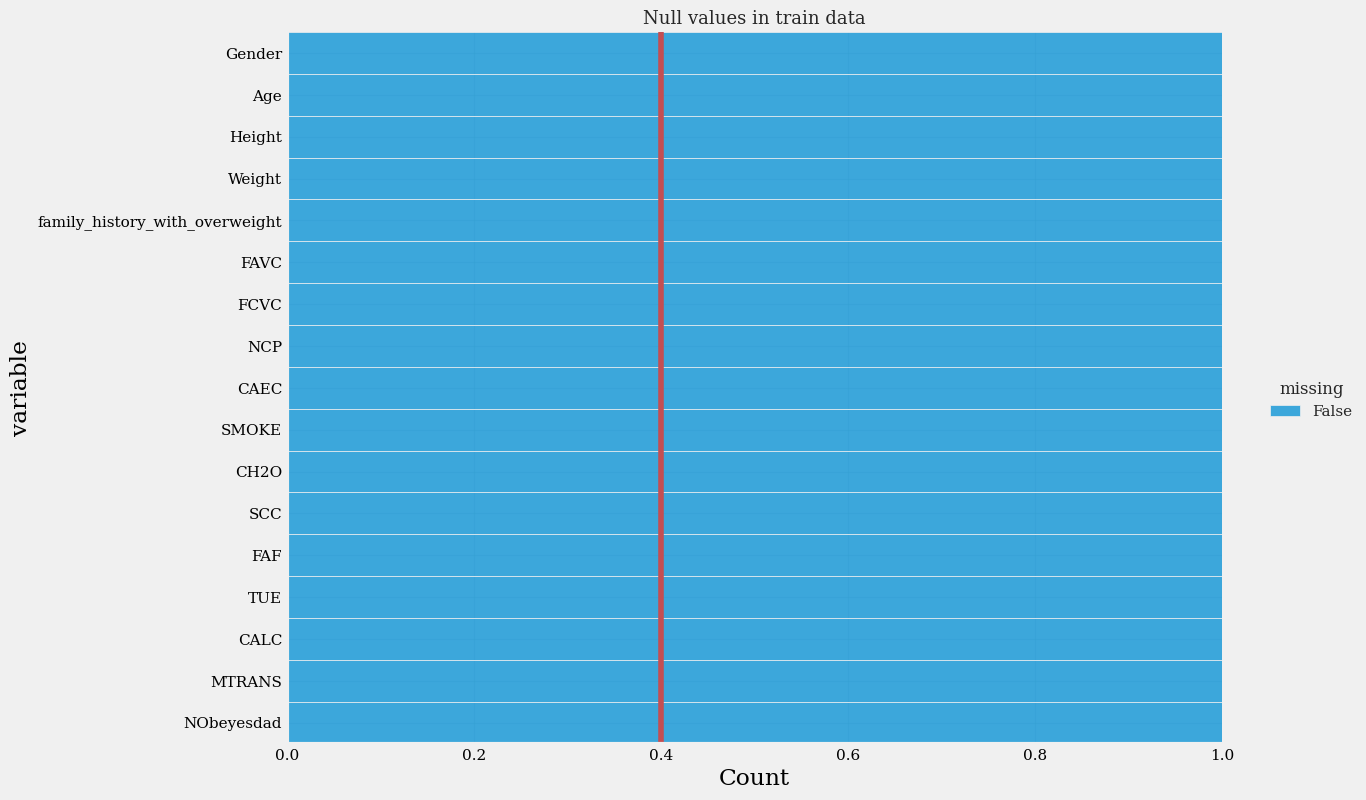

In [20]:
sns.displot(data=train.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

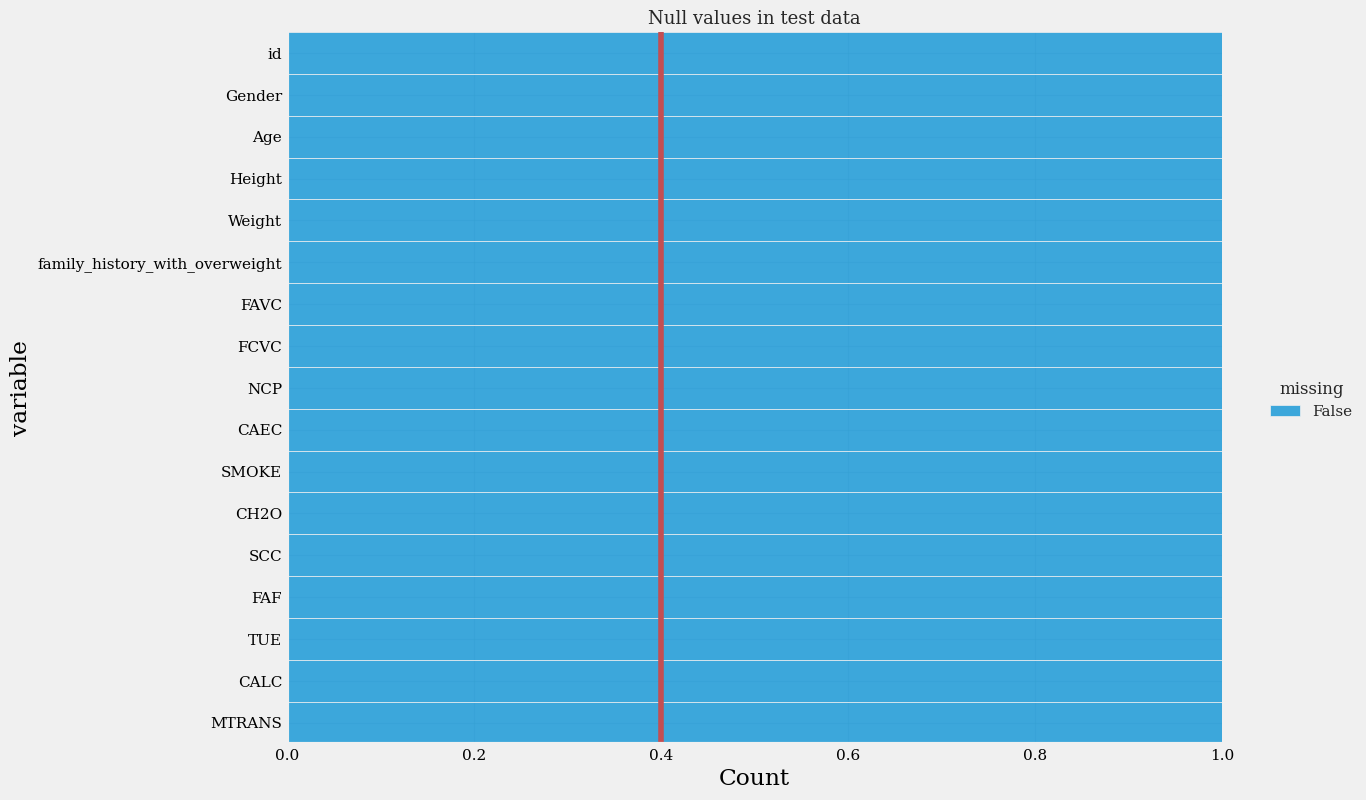

In [21]:
sns.displot(data = test.isnull().melt(value_name = 'missing'),y='variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color='r')
plt.title("Null values in test data",fontsize = 13)
plt.show()

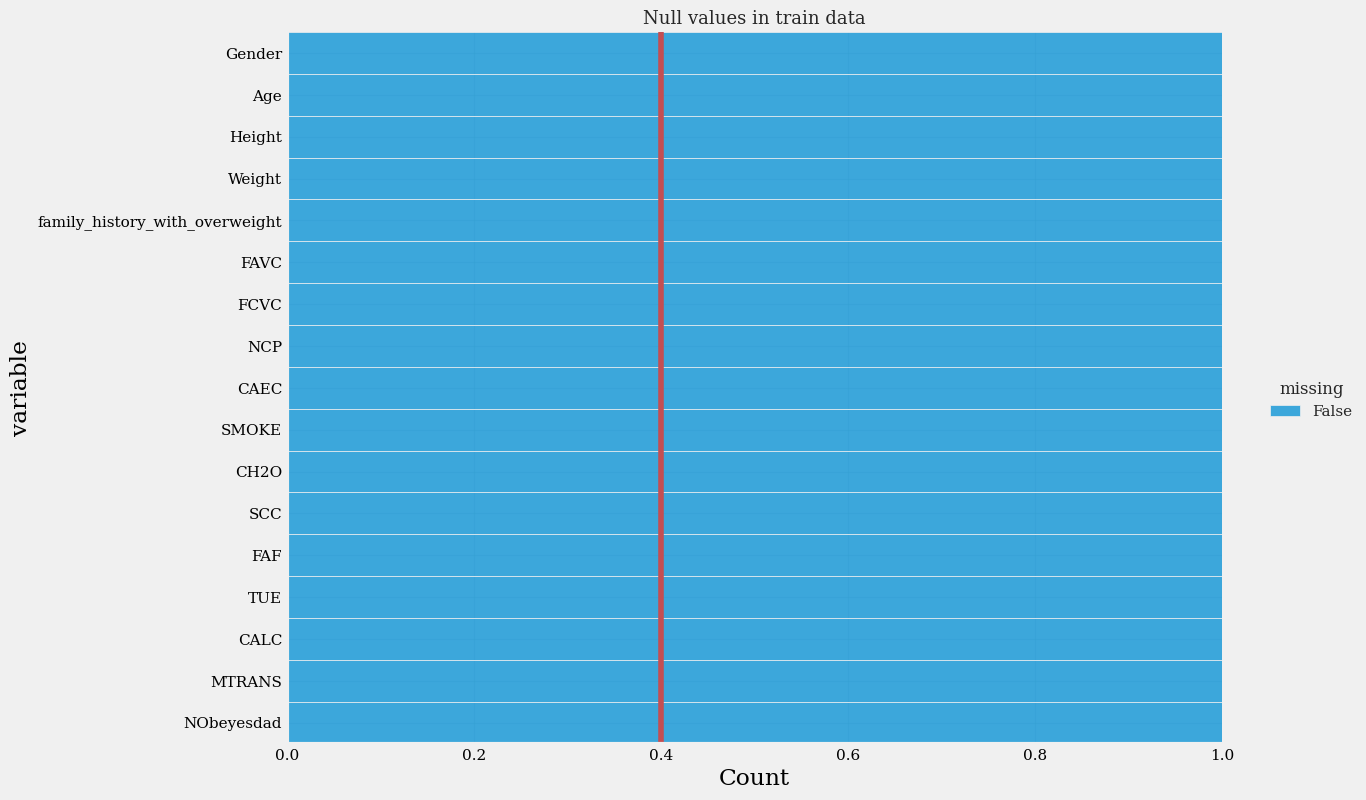

In [22]:
sns.displot(data=final_train.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> No null value present in train and test data
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    CHECKING FOR DUPLICATE  
</div>


In [23]:
final_train.duplicated().sum()

24

In [24]:
train.duplicated().sum()

0

In [25]:
final_train.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    TARGET COLUMN ANALYSIS  
</div>


In [26]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

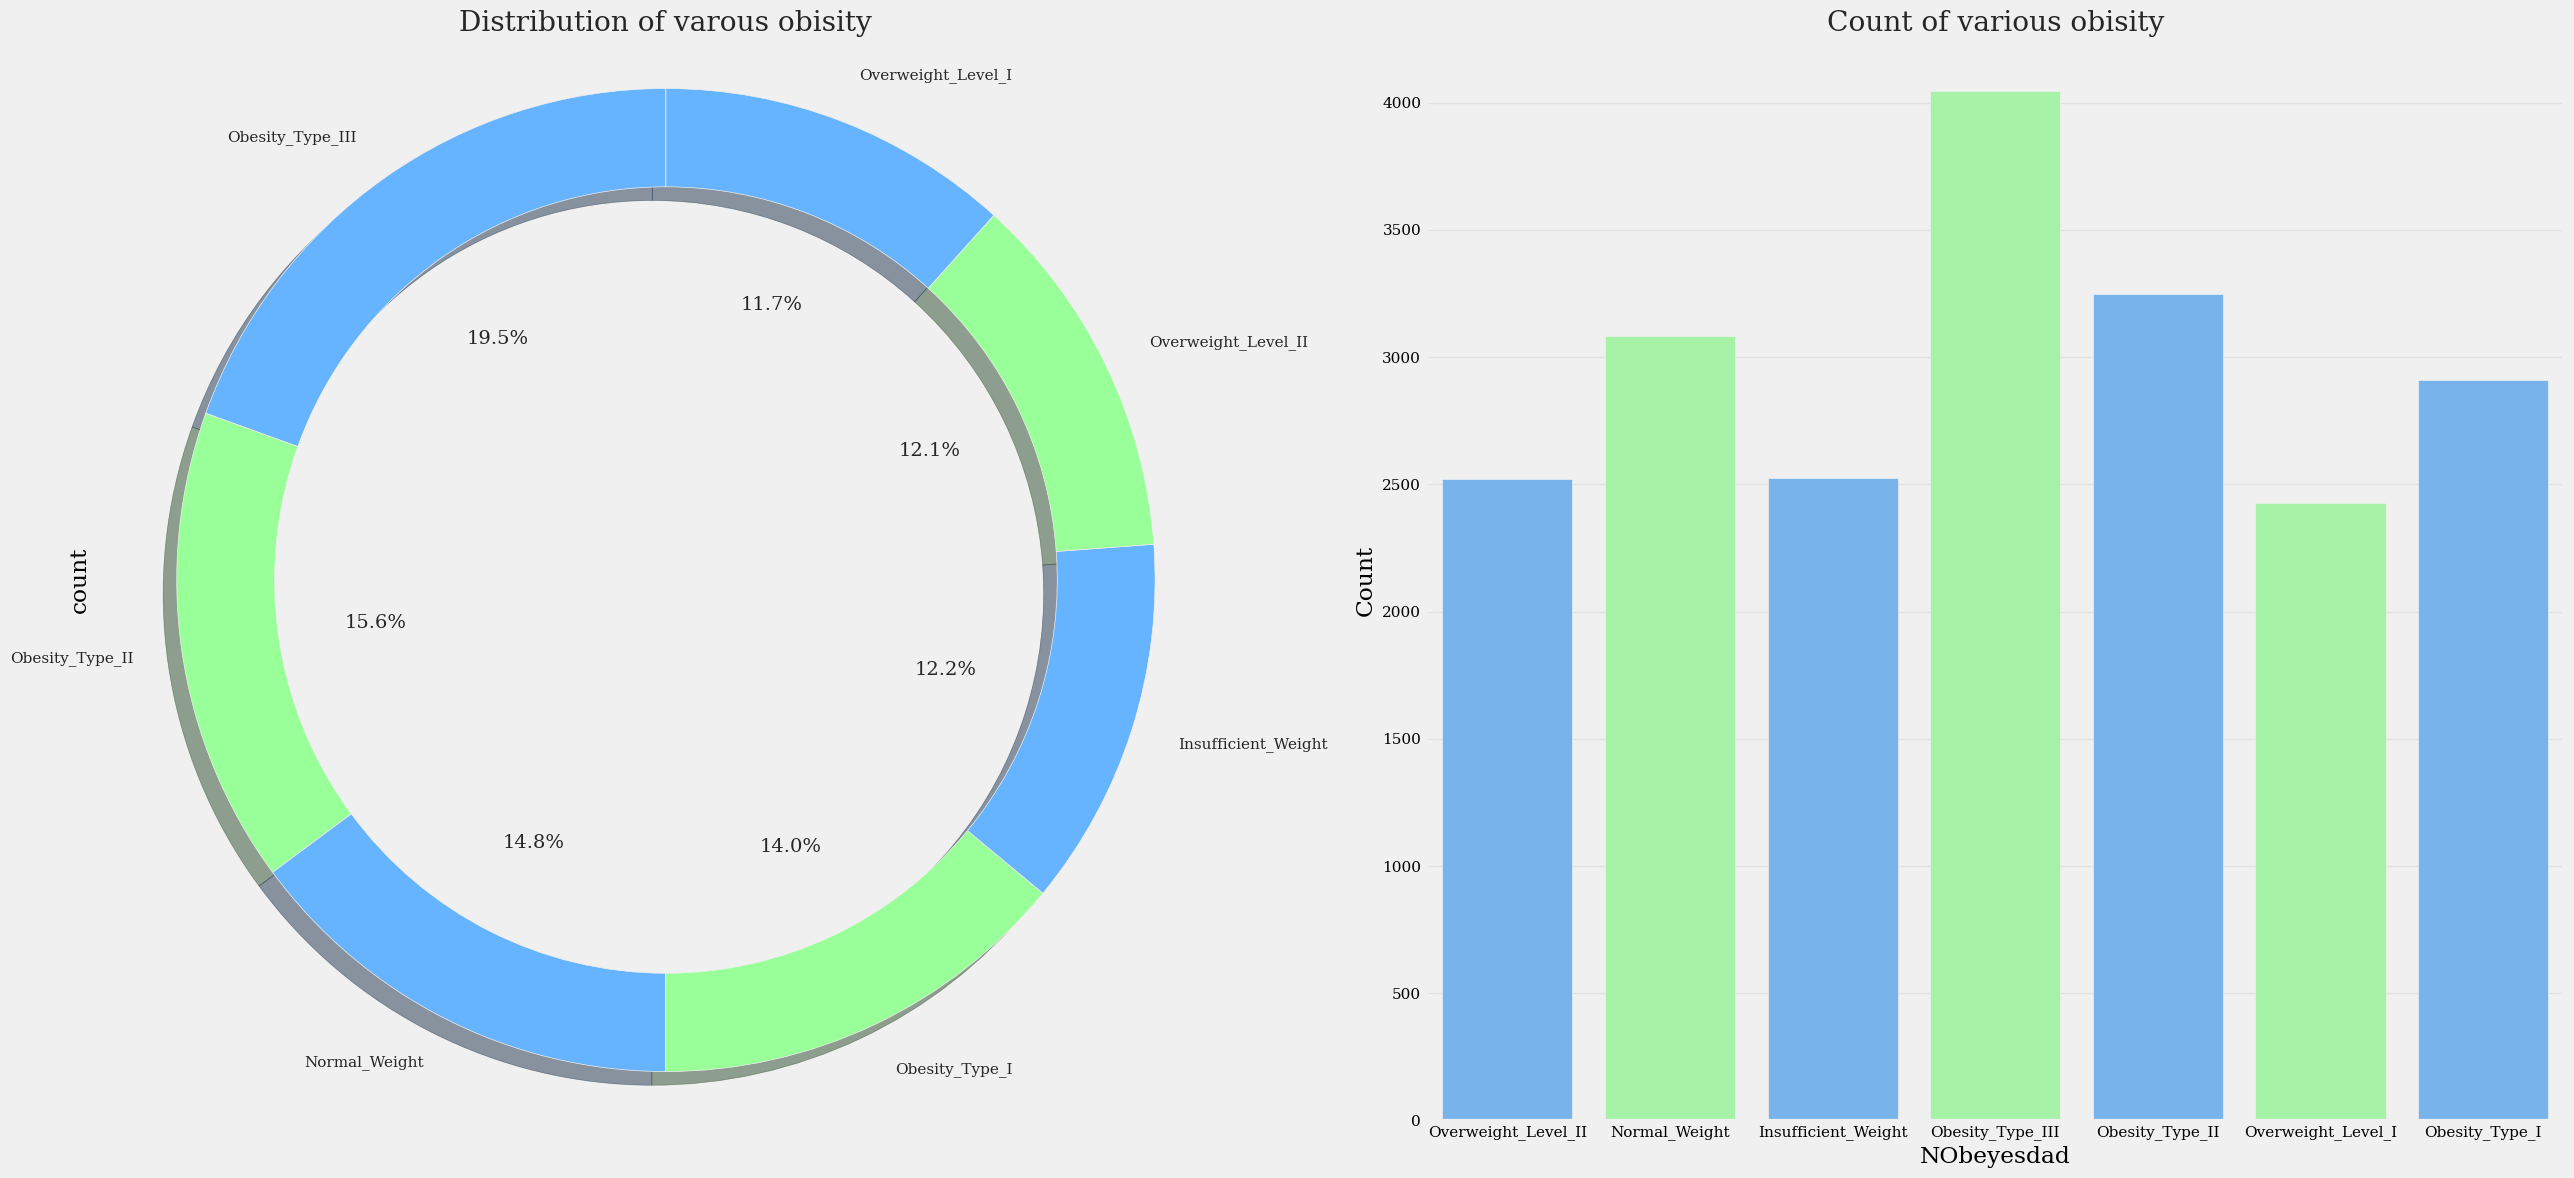

In [27]:
plt.figure(figsize=(26, 12))

# Pie chart
plt.subplot(1, 2, 1)
#explode = (0, 0.1)
colors = ['#66b3ff', '#99ff99']
labels = ['Obesity_Type_III','Obesity_Type_II','Normal_Weight','Obesity_Type_I','Insufficient_Weight','Overweight_Level_II','Overweight_Level_I']

train['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=labels,
                                        shadow=True, startangle=90, wedgeprops=dict(width=0.2))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Distribution of varous obisity")

# Count plot
plt.subplot(1, 2, 2)
colors = ['#66b3ff', '#99ff99']
sns.countplot(x='NObeyesdad', data=train, palette=colors)
plt.title("Count of various obisity")
plt.xlabel('NObeyesdad')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    TRANING DATA AND TESTING DATA ANALYSIS
</div>


In [28]:
#For training data

unique_counts = train.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

if 'NObeyesdad' in categorical_vars:
    categorical_vars.remove('NObeyesdad')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

In [29]:
#For test data

unique_counts = test.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars_test = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars_test = unique_counts[unique_counts <= threshold].index.tolist()

if 'outcome' in categorical_vars:
    categorical_vars.remove('outcomes')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    CATEGORICAL COLUMN ANALYSIS  
</div>


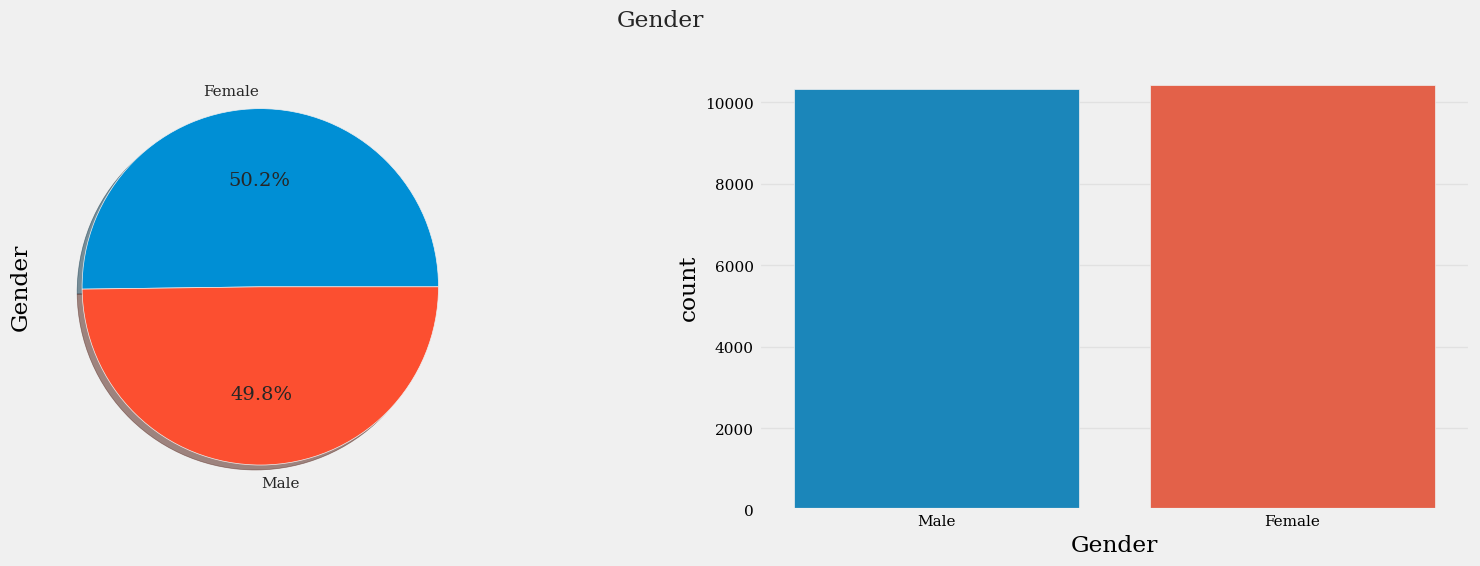

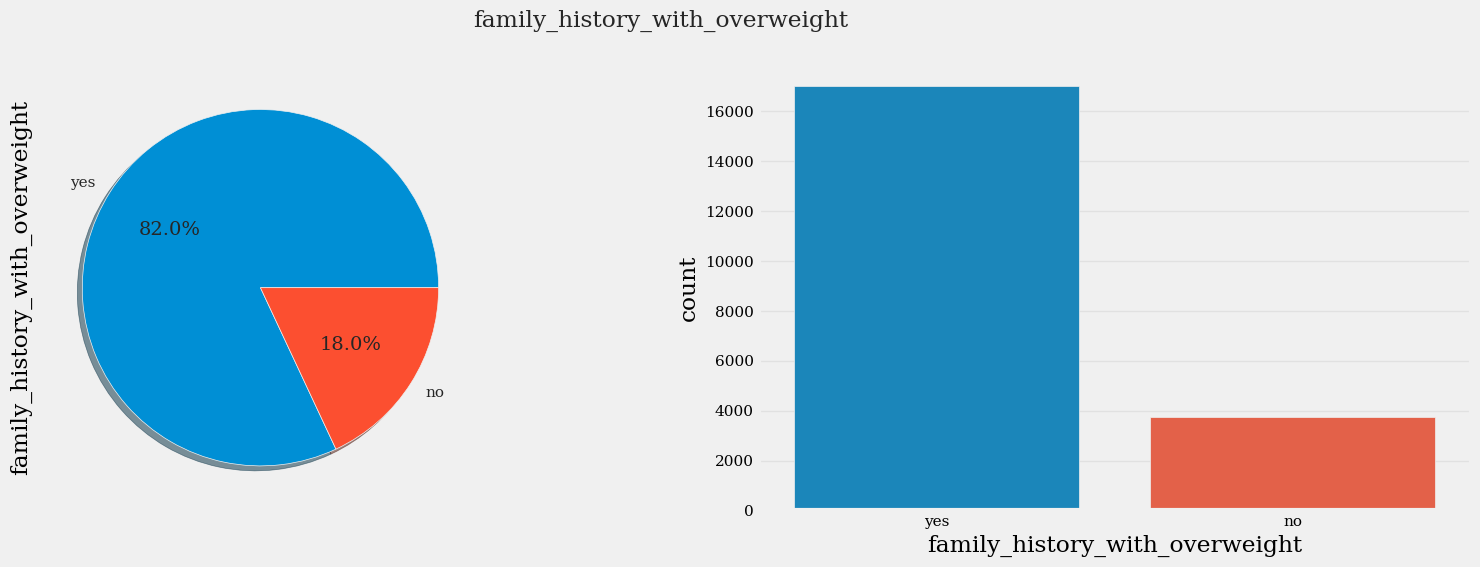

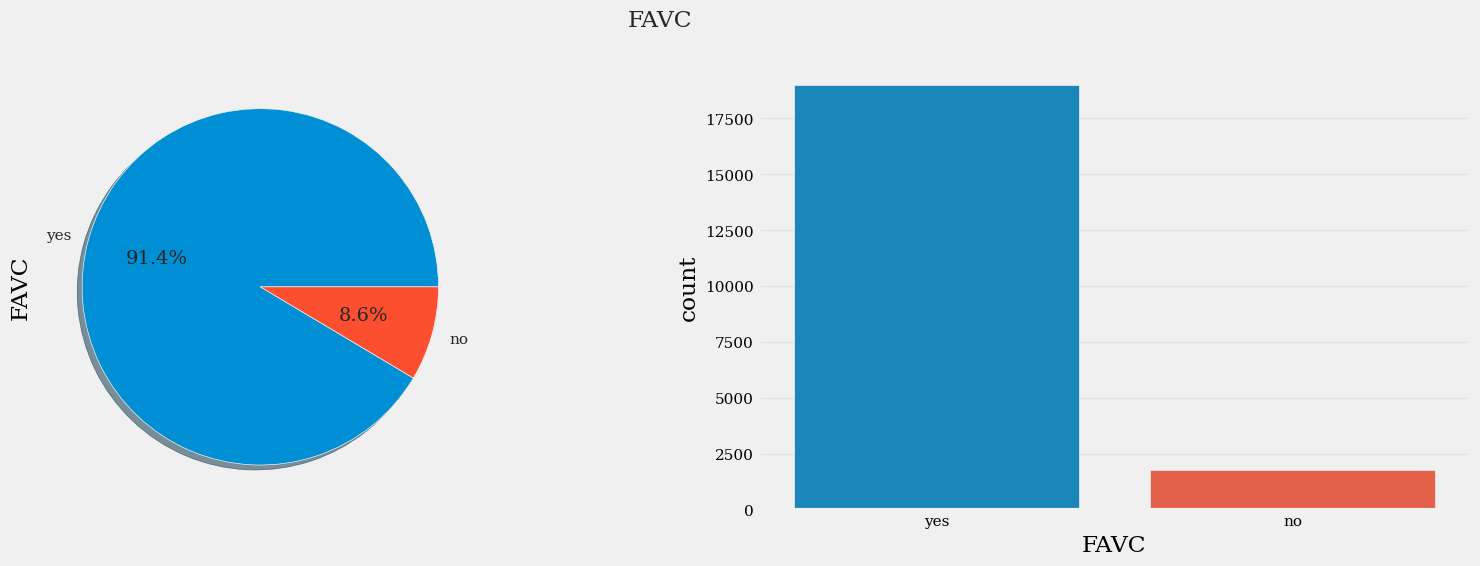

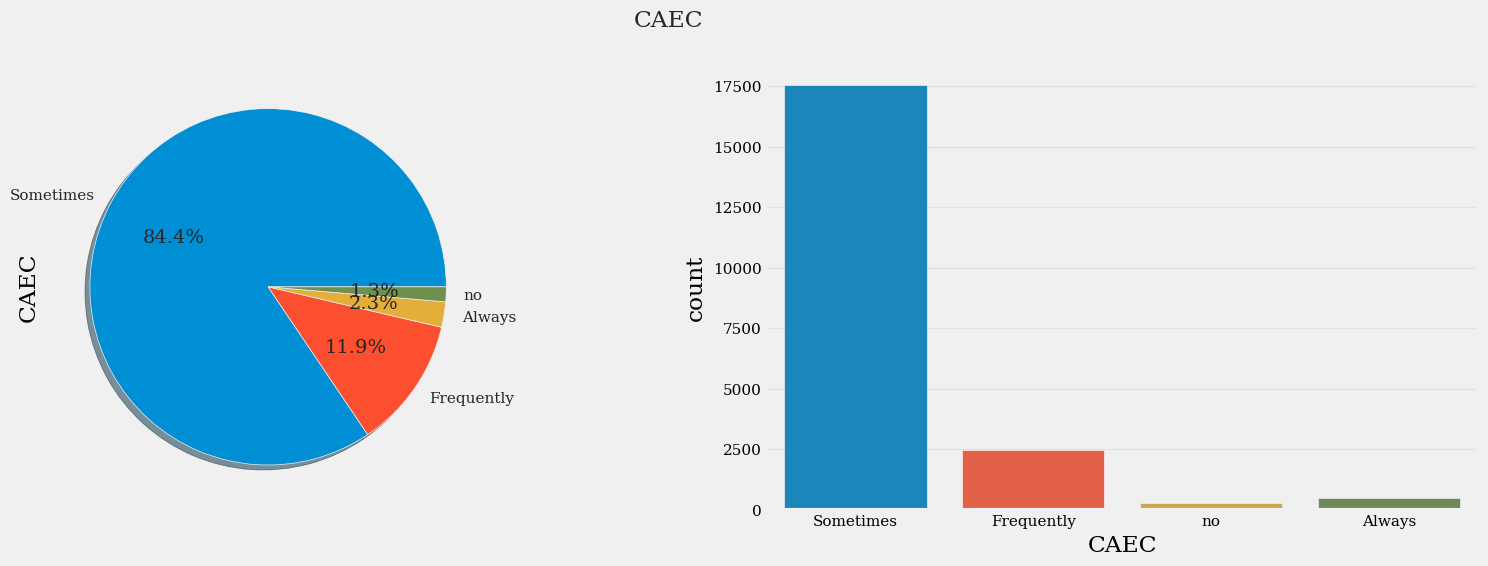

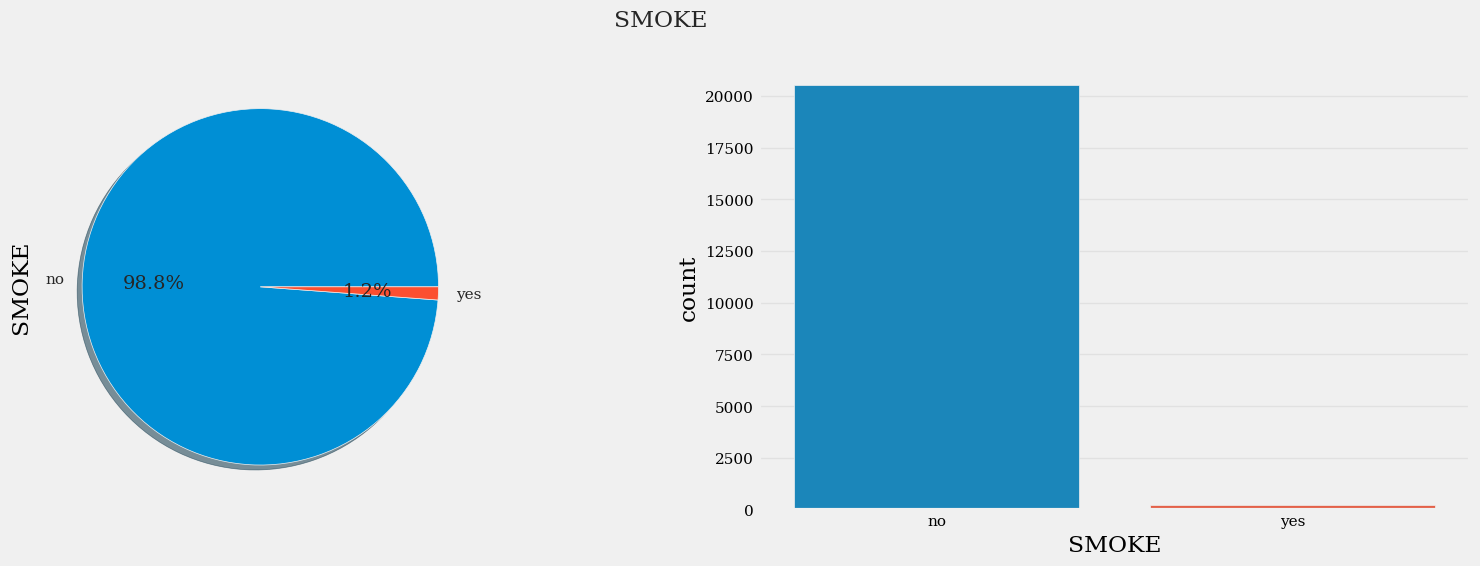

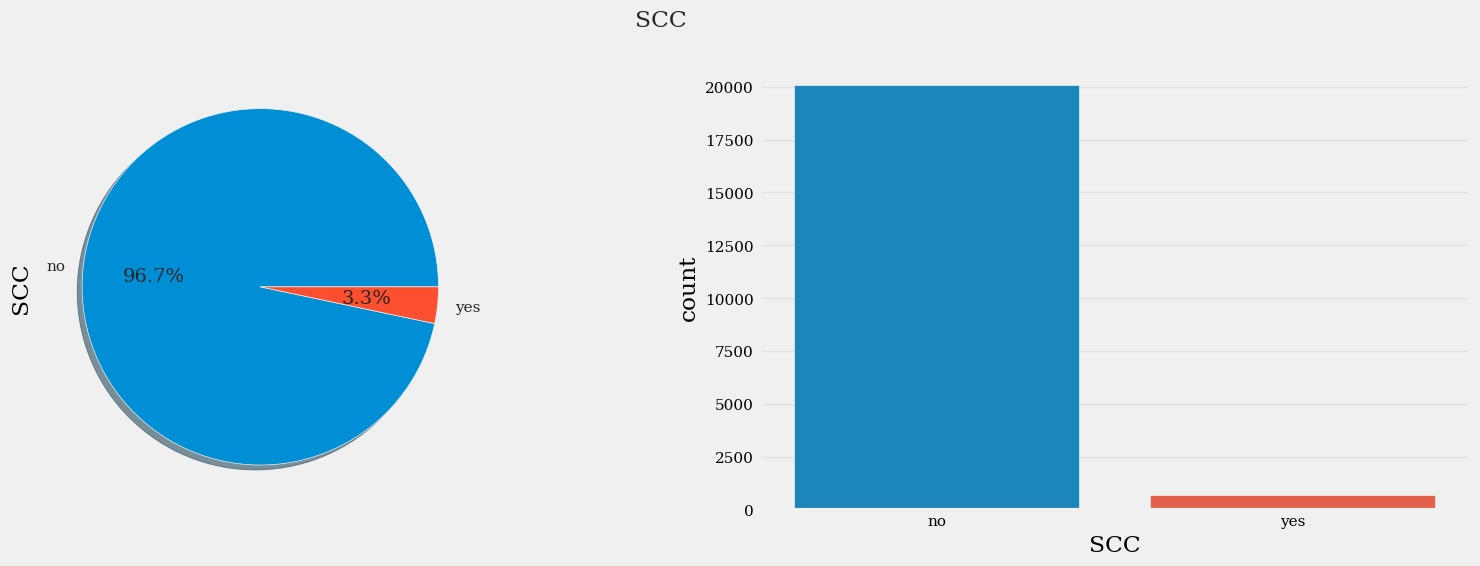

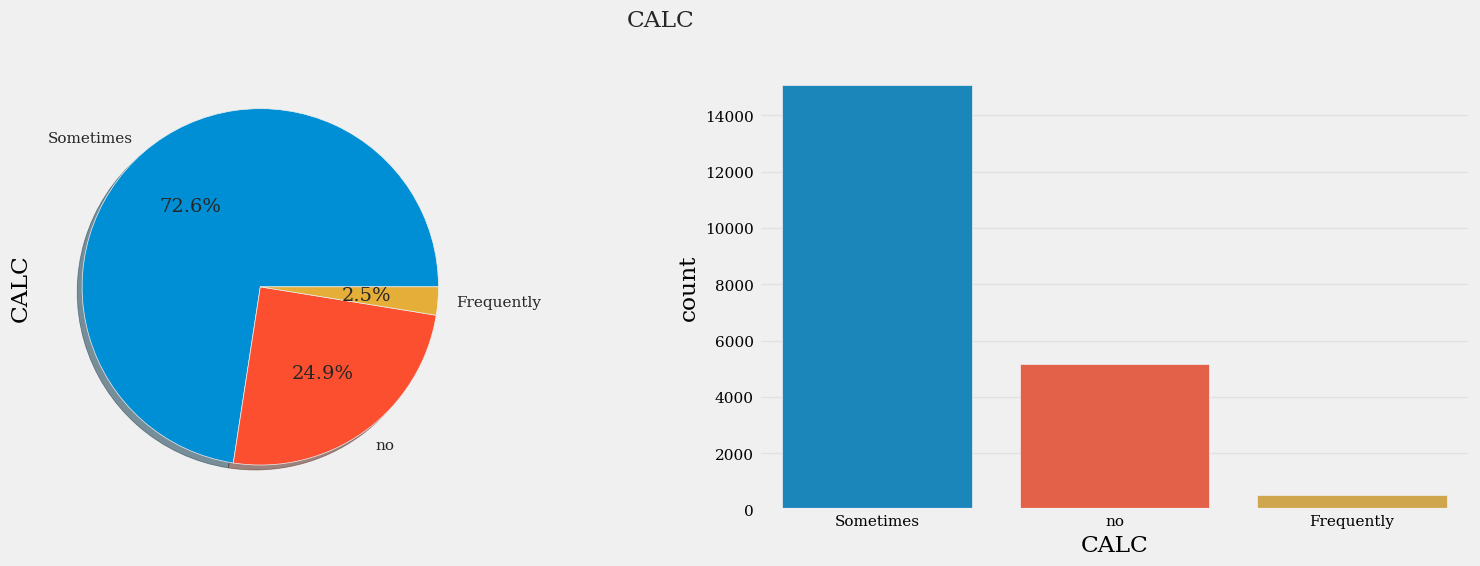

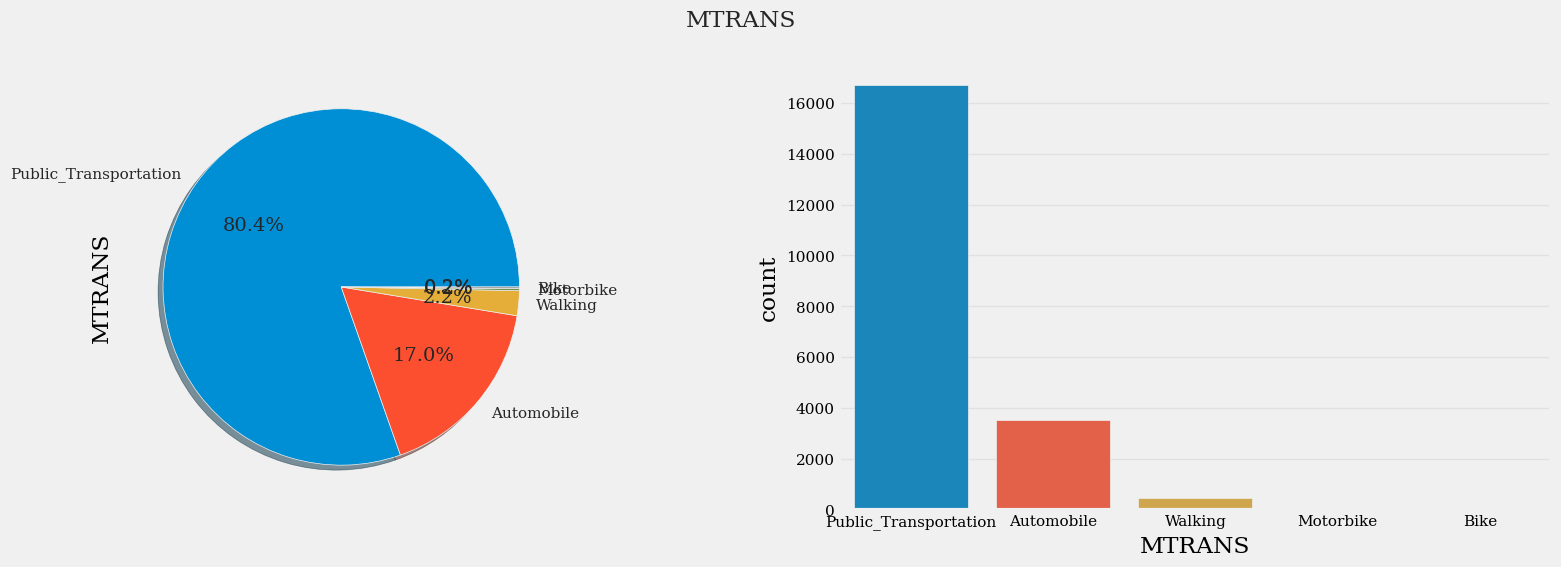

In [30]:
#Analysis of categorical data
#categorical_vars.remove('NObeyesdad')
for column in categorical_vars:
    f,ax = plt.subplots(1,2,figsize = (18,5.5))
    train[column].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0],shadow = True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x = column, data = train,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

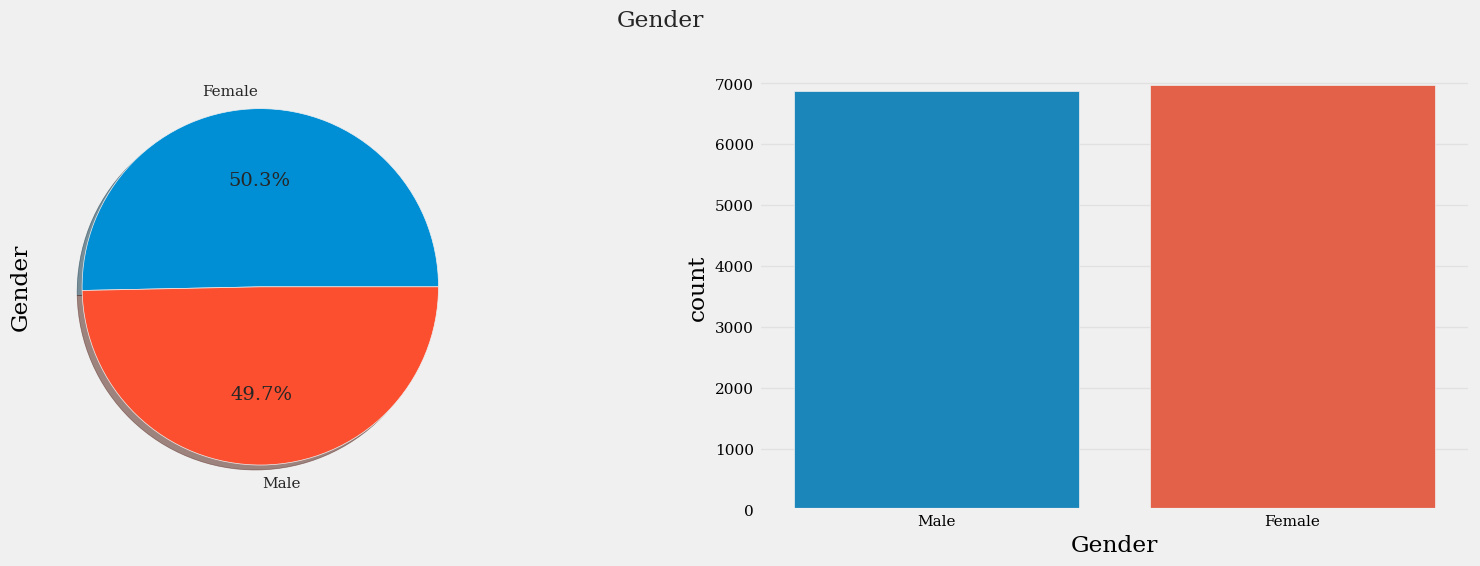

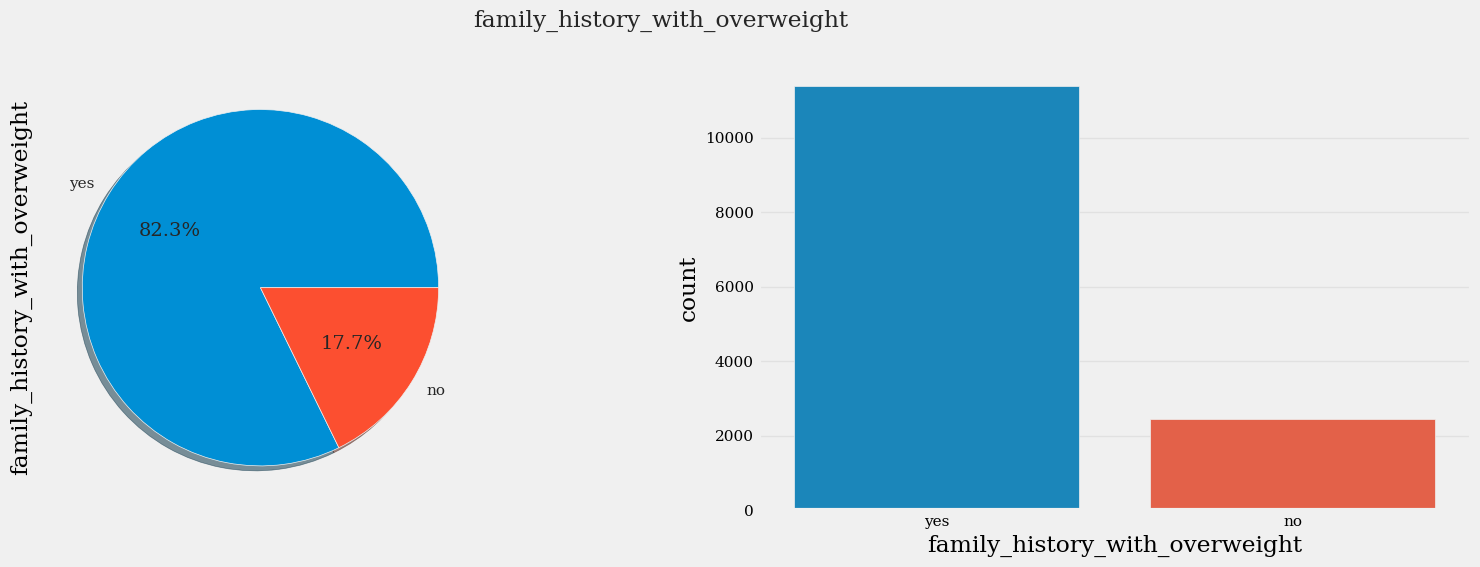

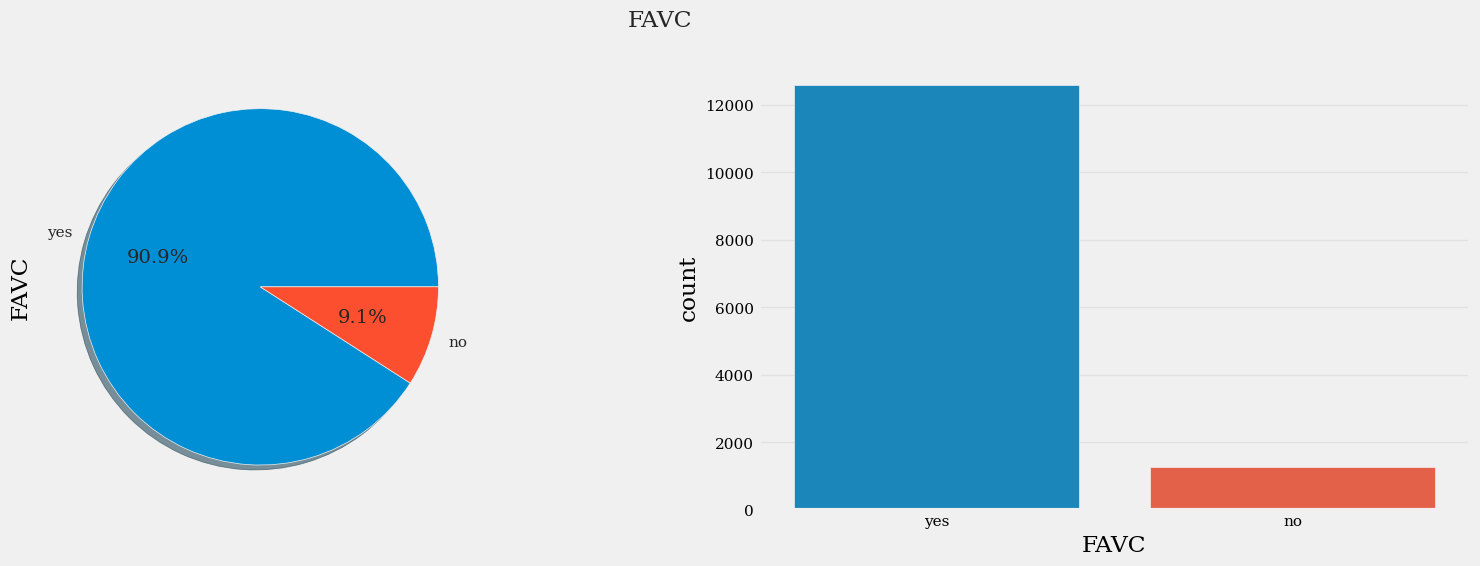

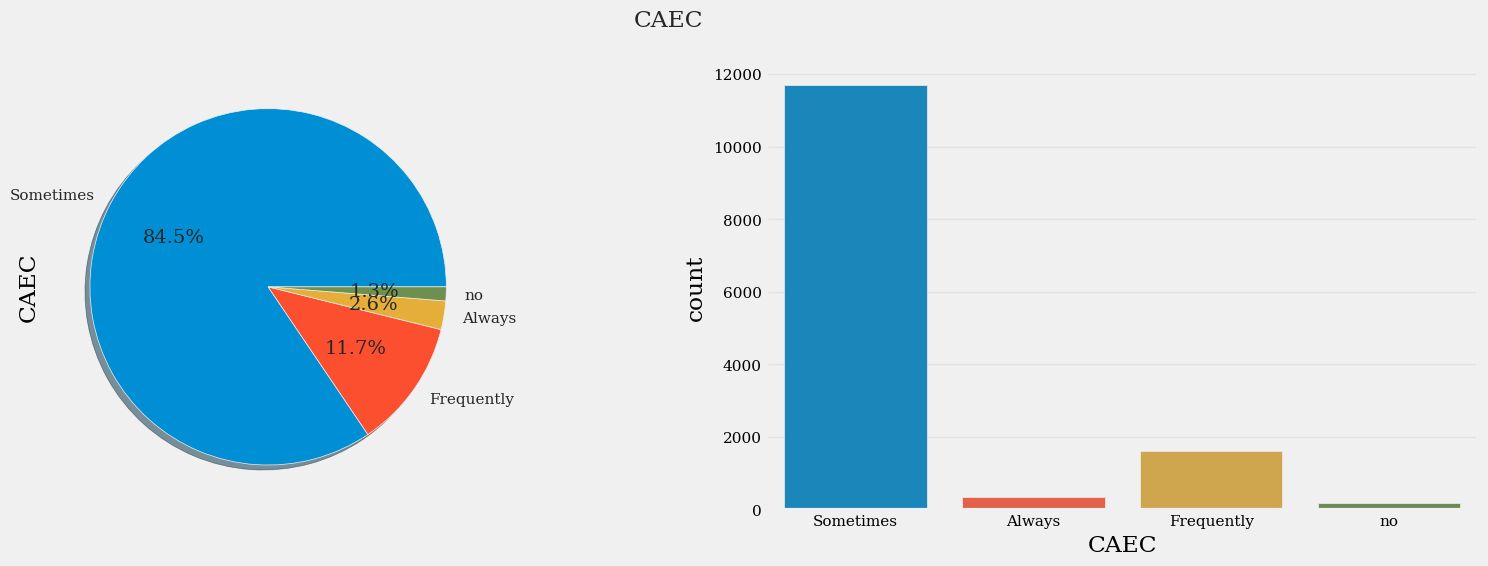

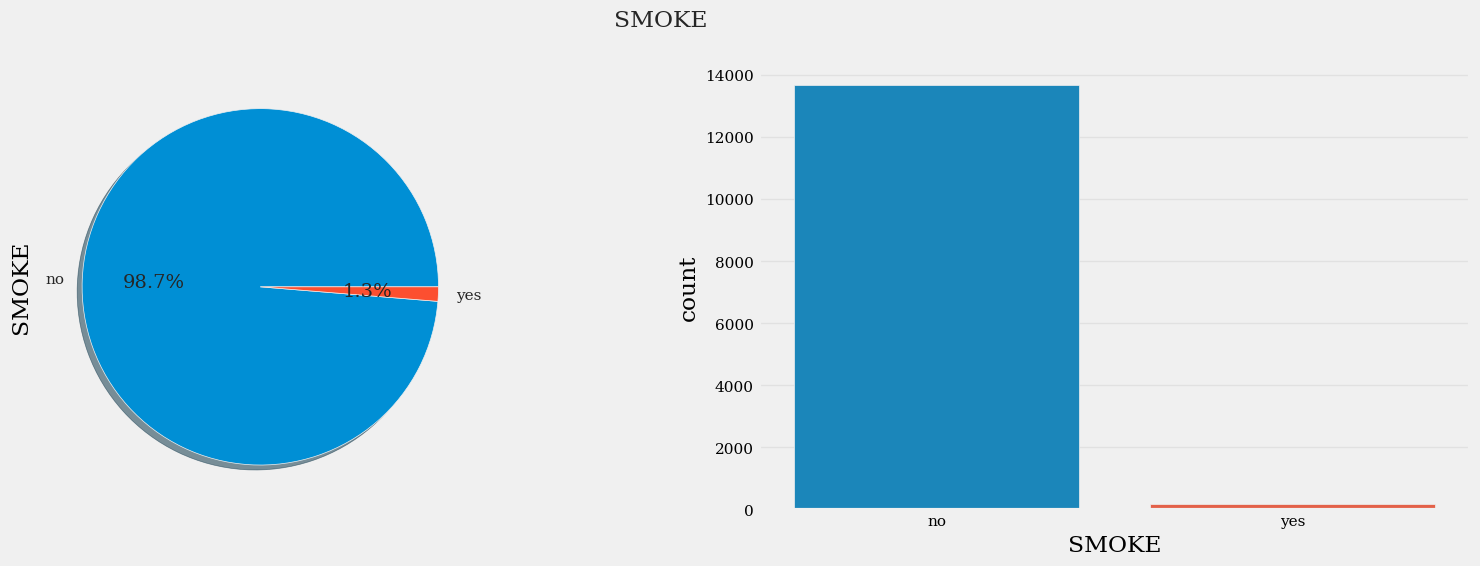

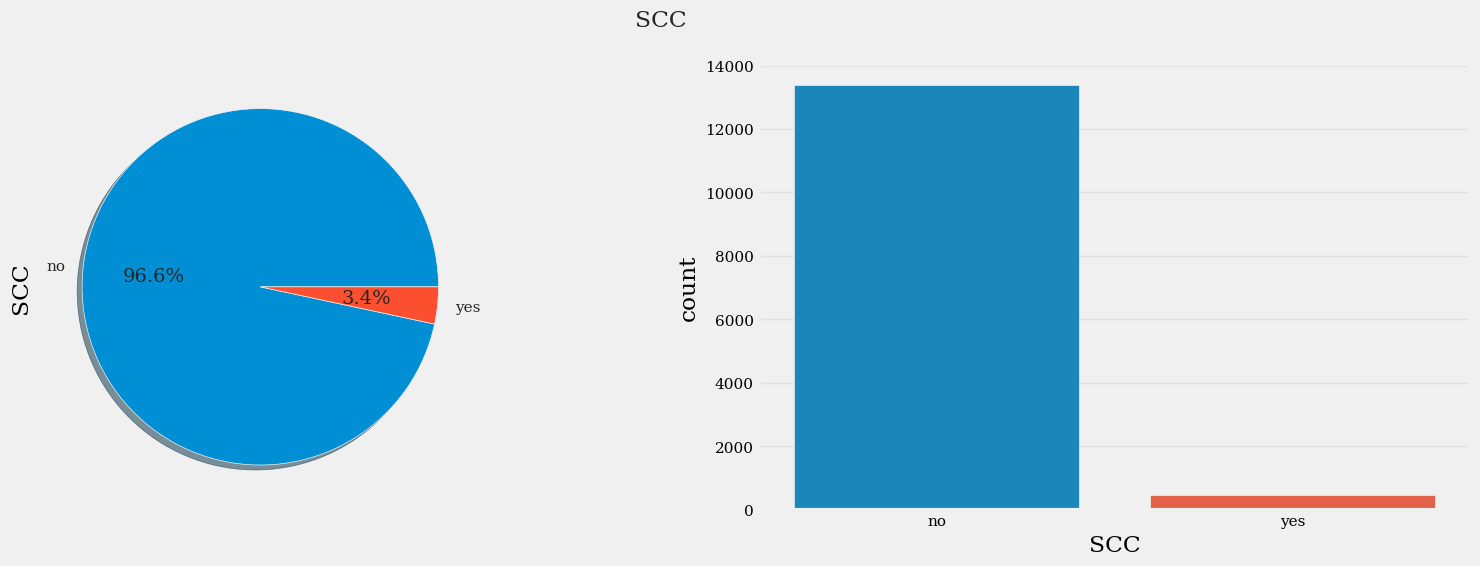

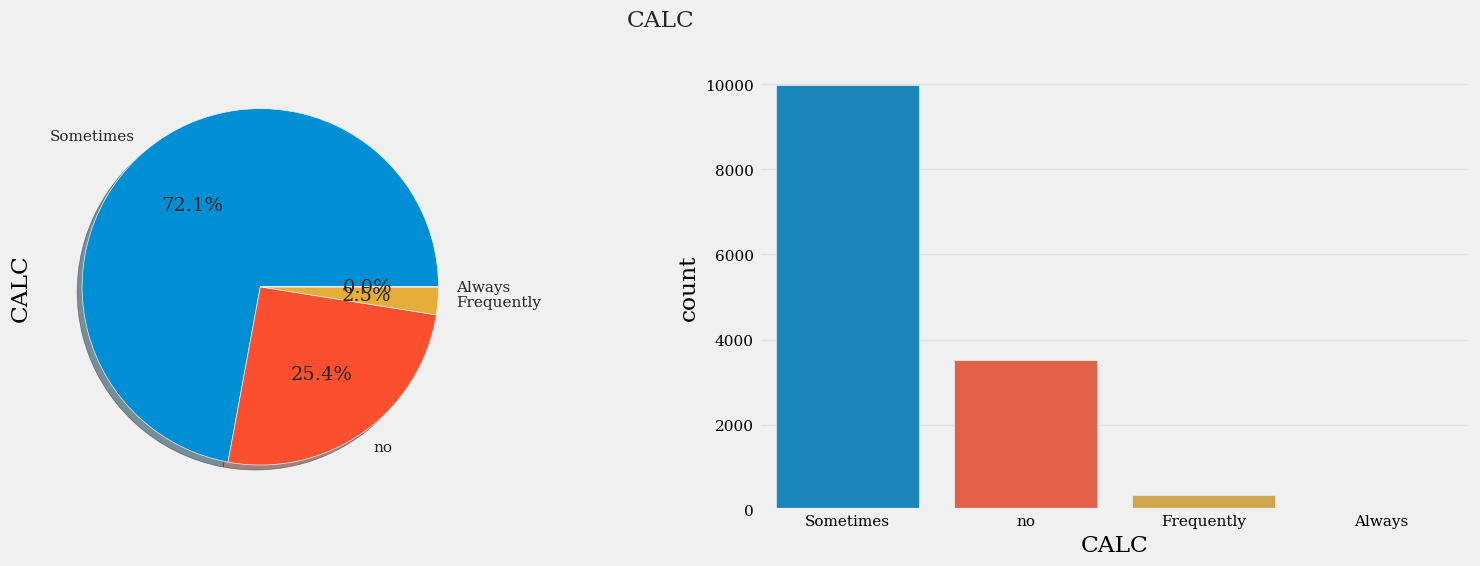

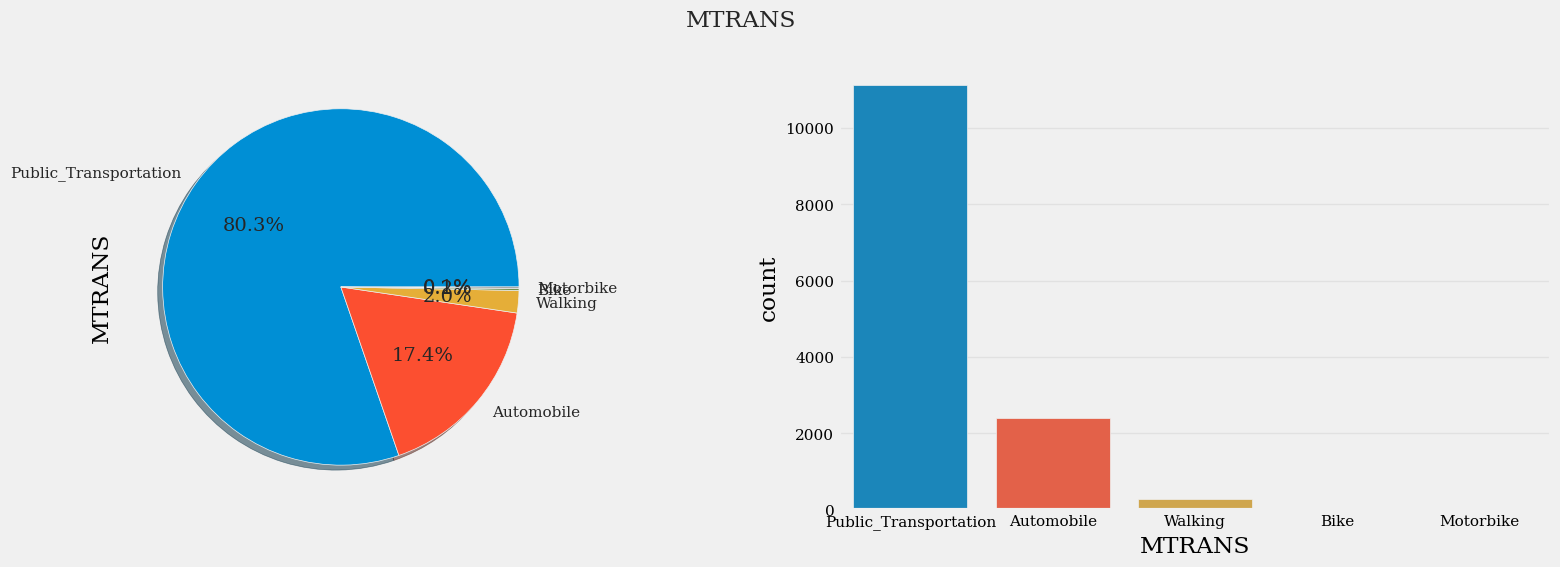

In [31]:
#Analysis of categorical data
for column in categorical_vars_test:
    f,ax = plt.subplots(1,2,figsize = (18,5.5))
    test[column].value_counts().plot.pie(autopct='%1.1f%%',ax = ax[0],
                                         shadow = True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x = column, data = test,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    CONTINUOUS COLUMN ANALYSIS  
</div>


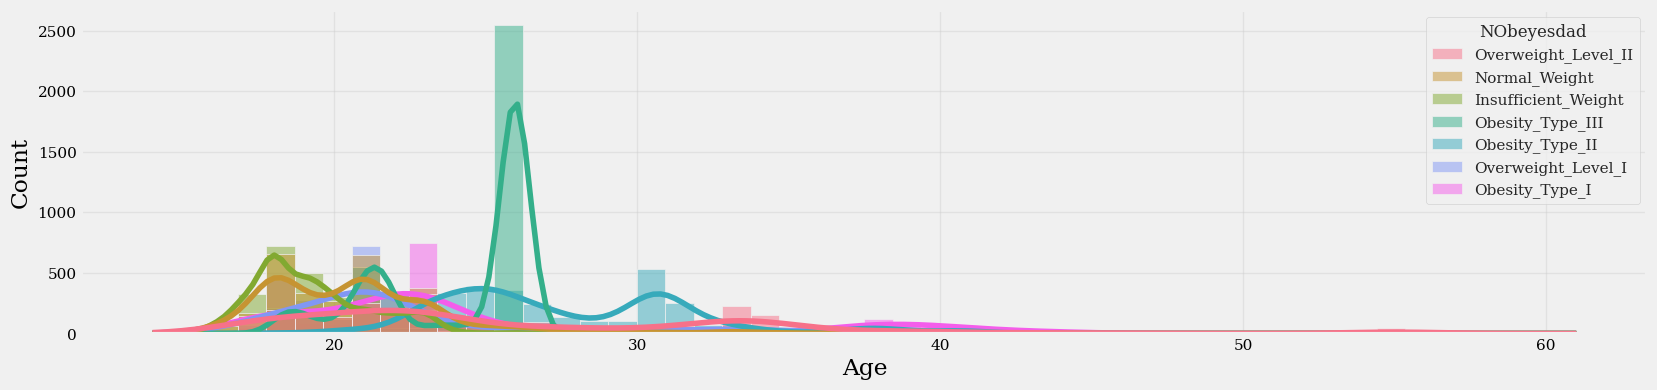

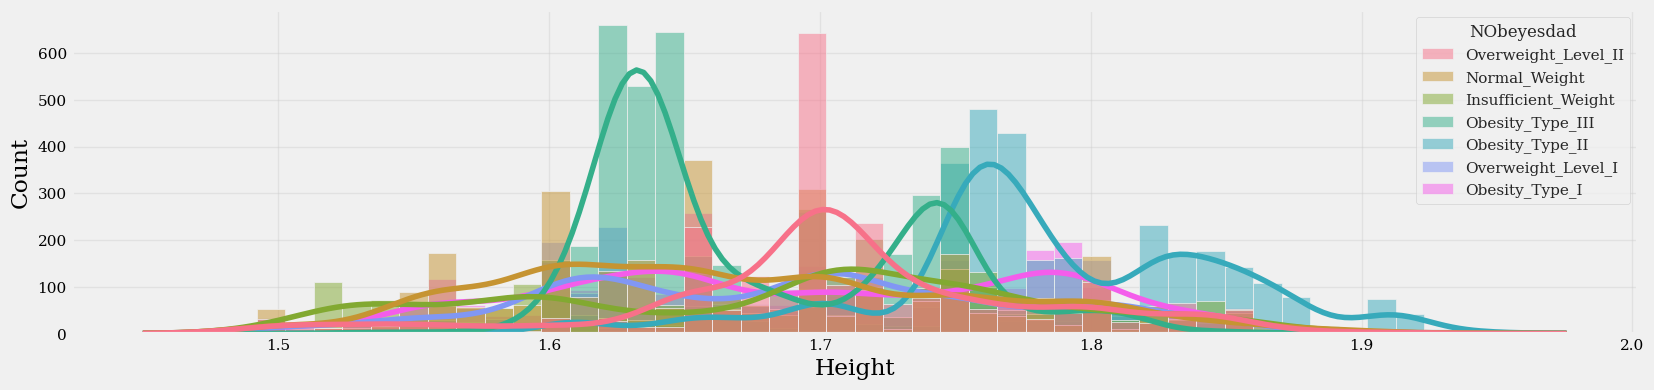

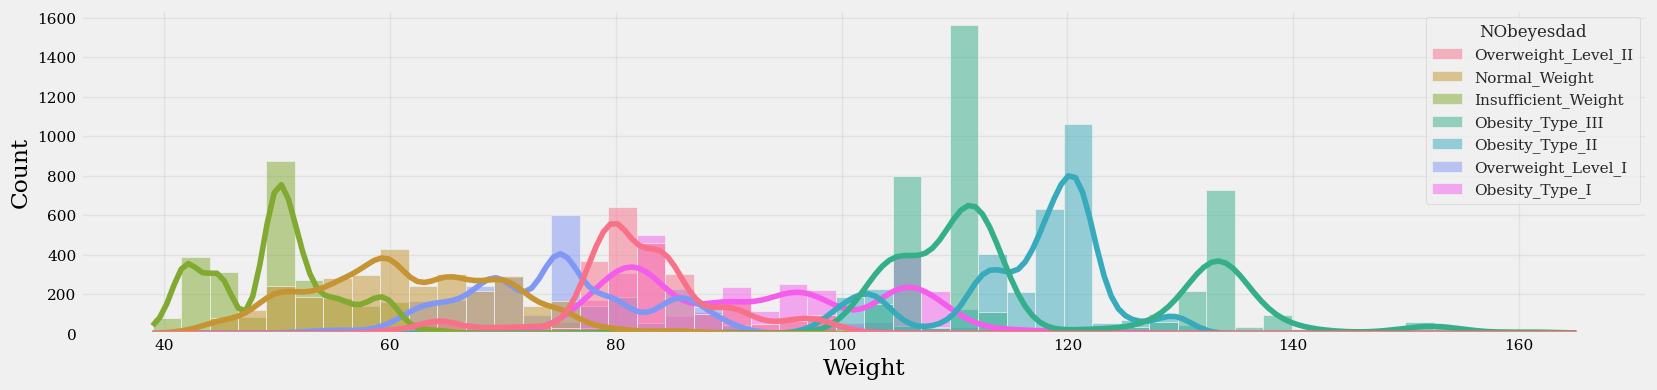

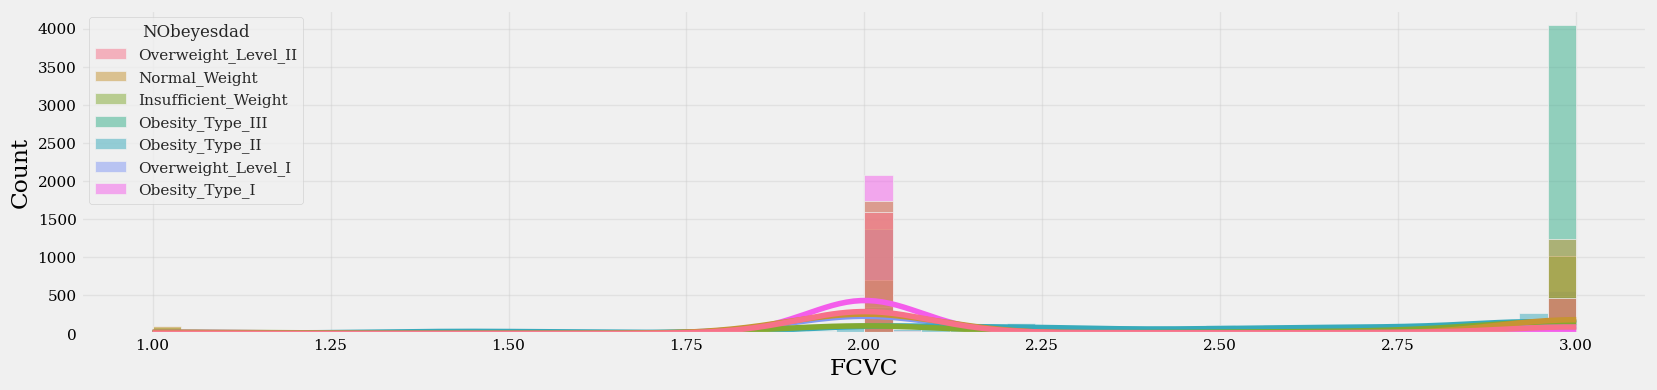

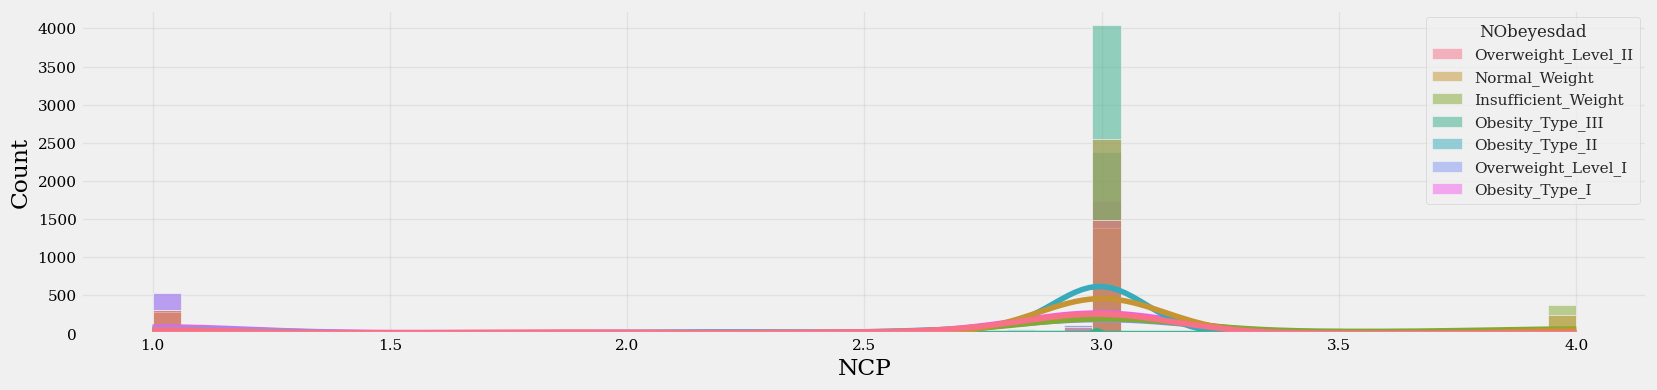

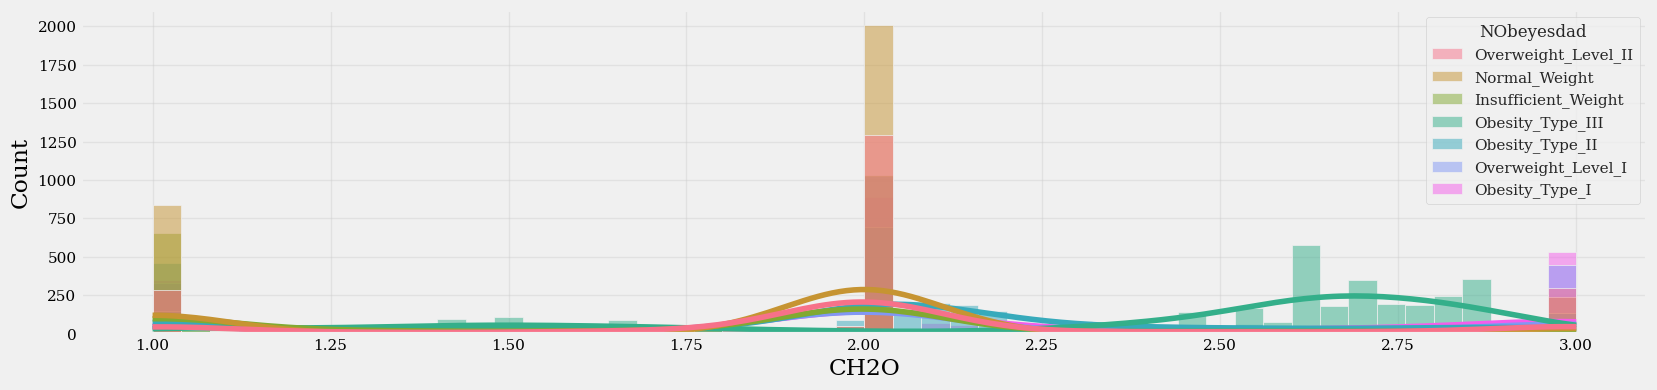

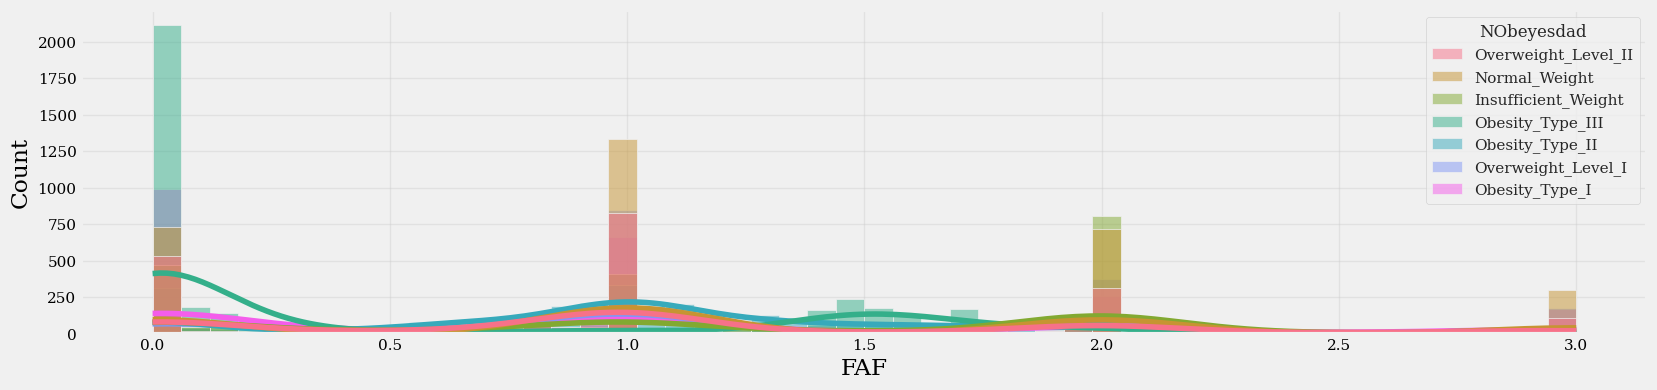

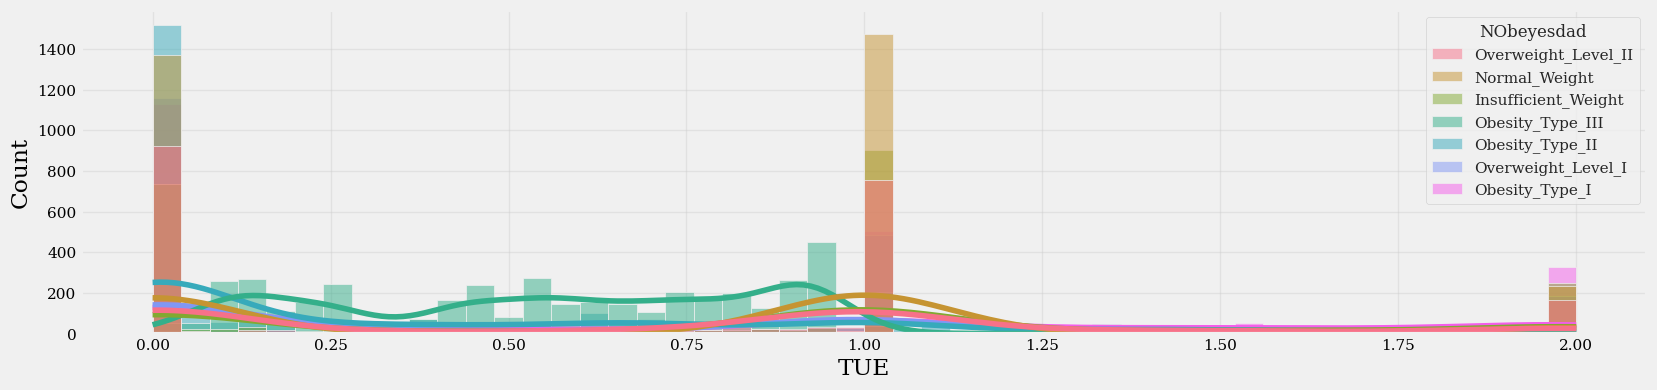

In [32]:
for column in continuous_vars:
    fig,ax = plt.subplots(figsize=(18,4))
    fig = sns.histplot(data = train,x=column,hue='NObeyesdad',bins=50,kde = True)
    plt.show()

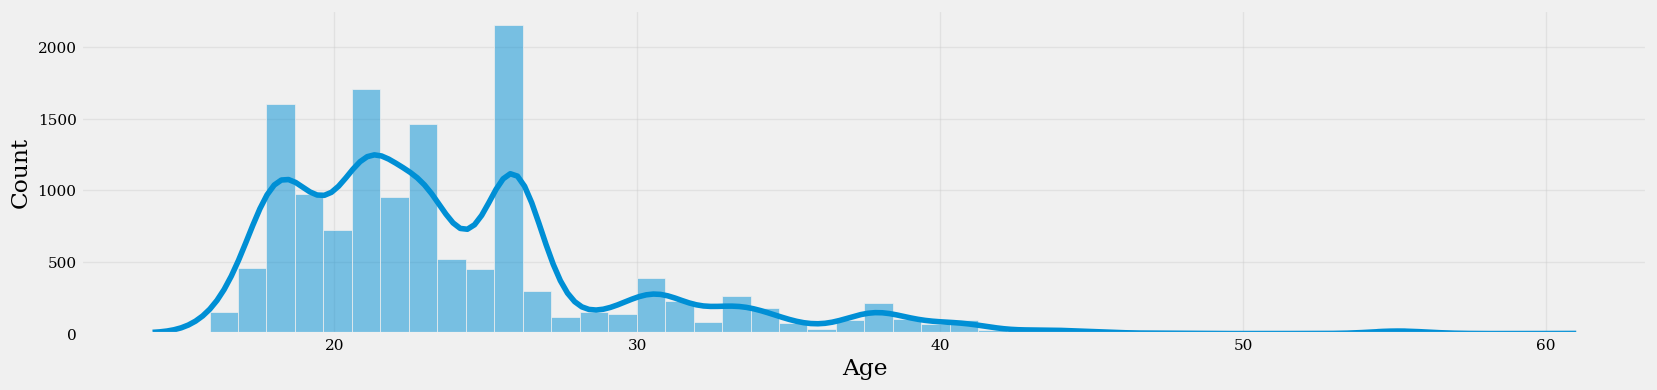

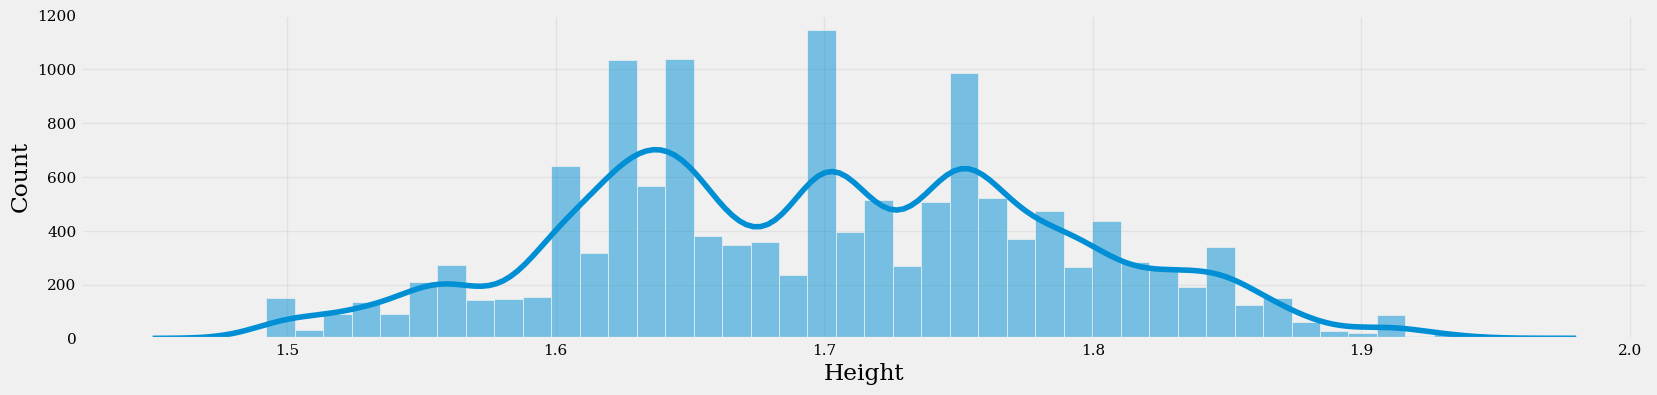

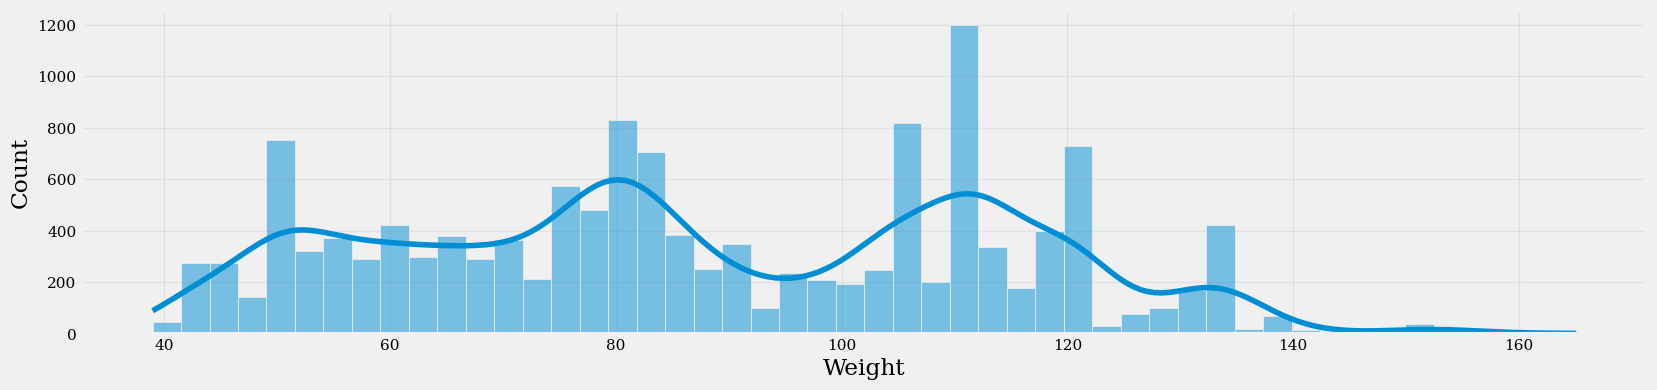

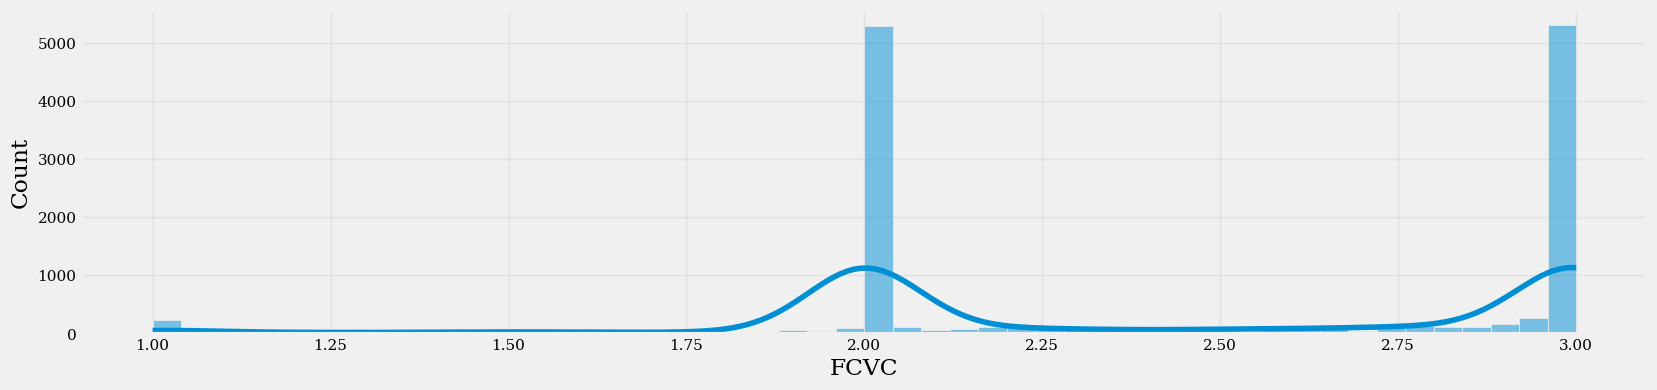

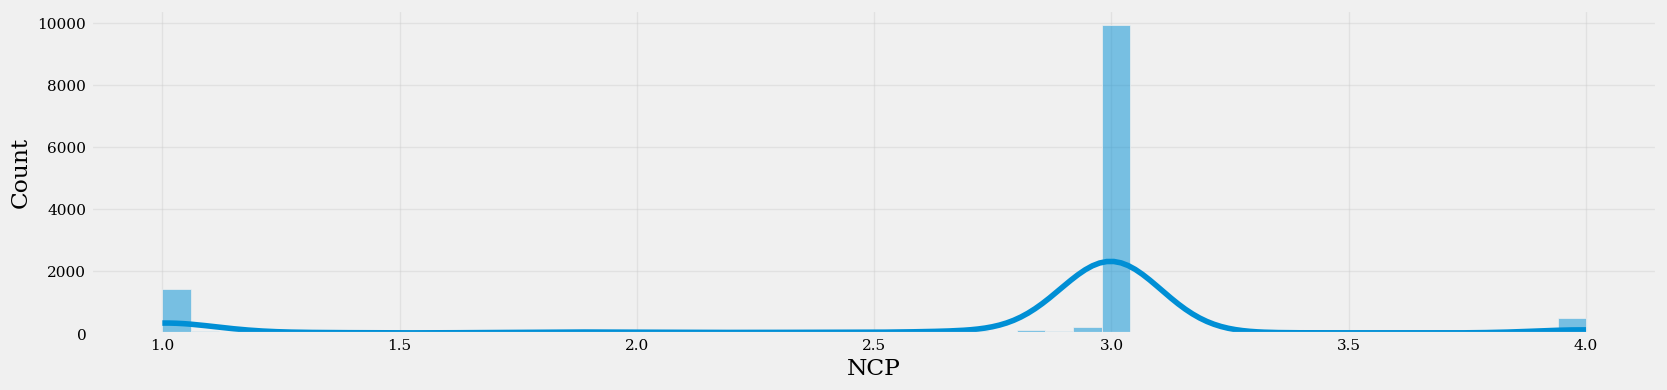

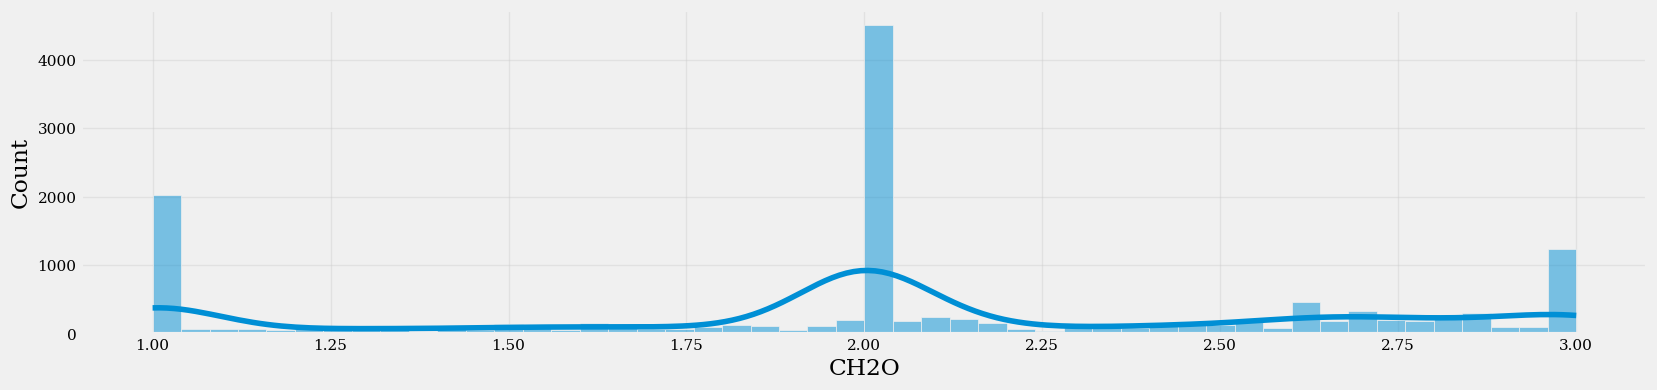

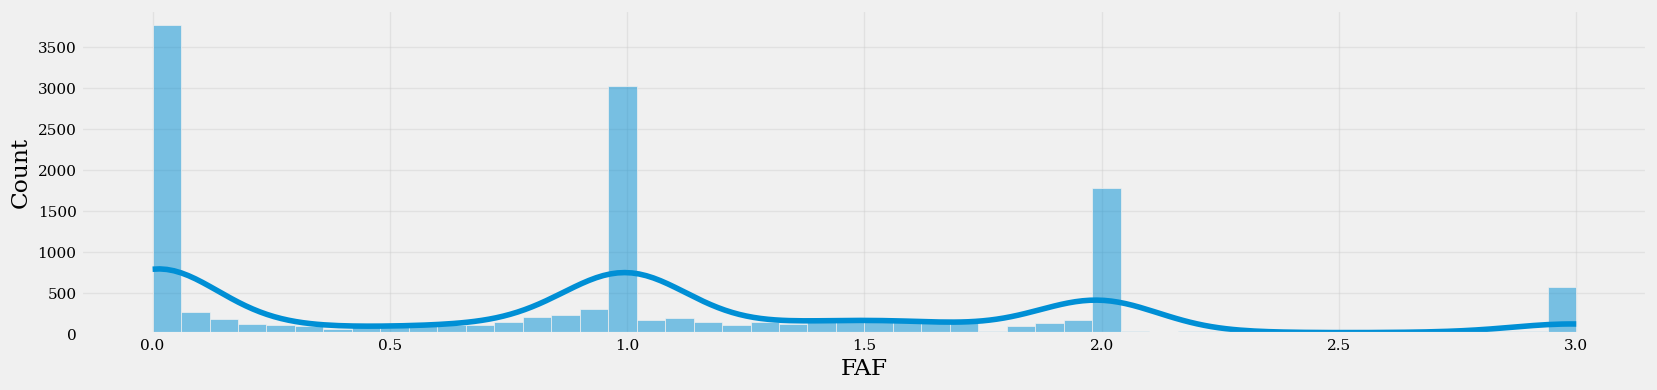

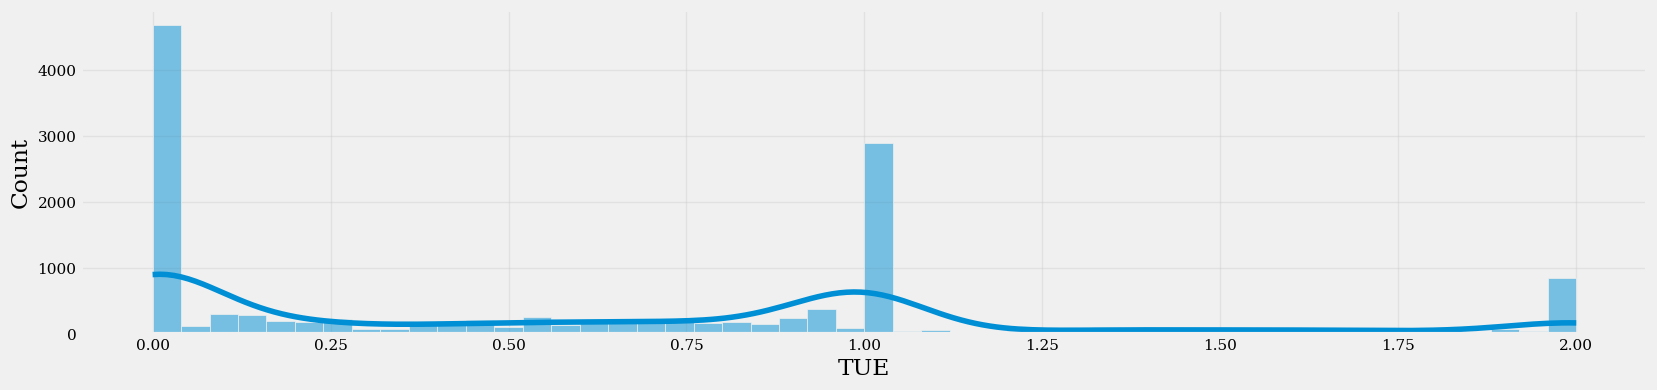

In [33]:
continuous_vars_test.remove('id')
for column in continuous_vars_test:
    fig,ax = plt.subplots(figsize=(18,4))
    fig = sns.histplot(data = test,x=column,bins=50,kde = True)
    plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    ANALYSIS BY QQ PLOT  
</div>


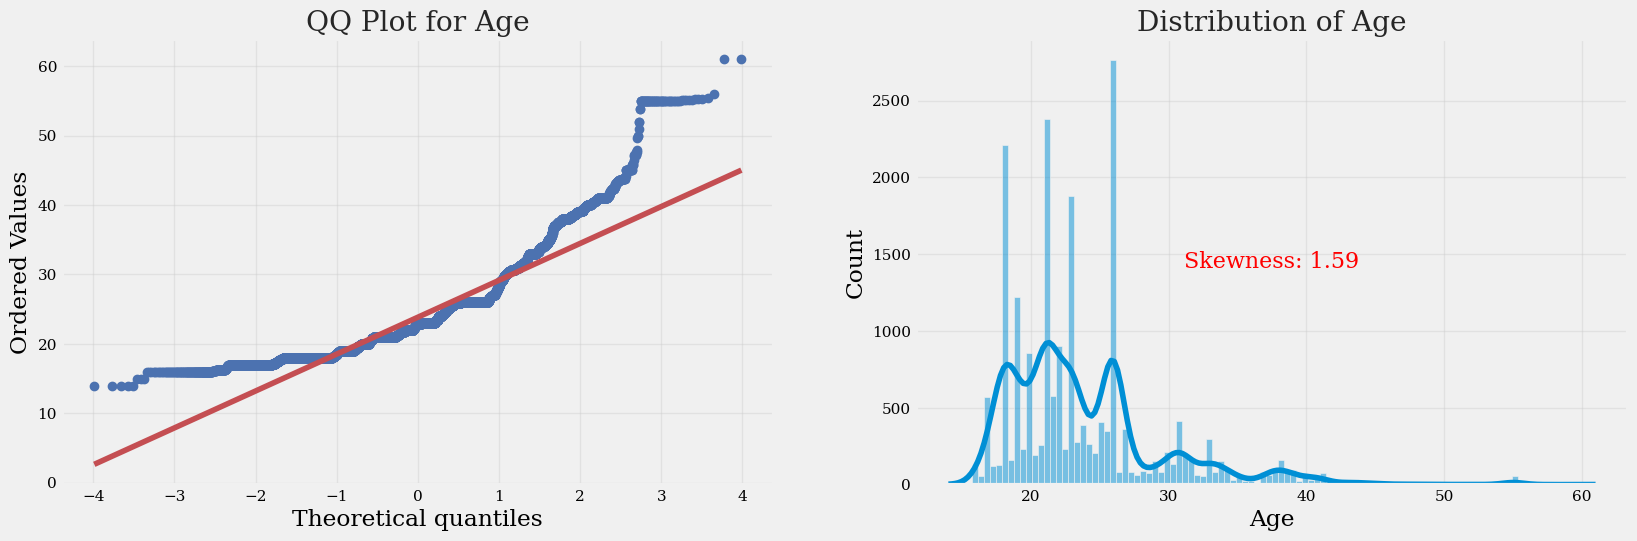

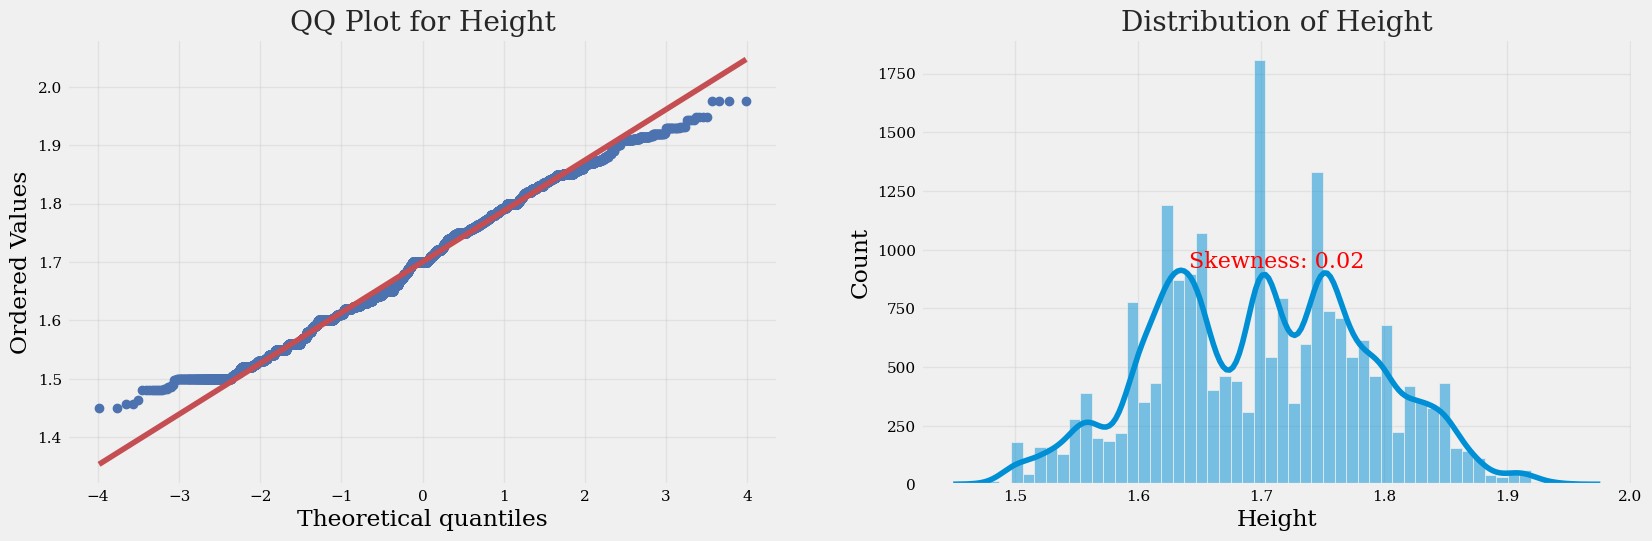

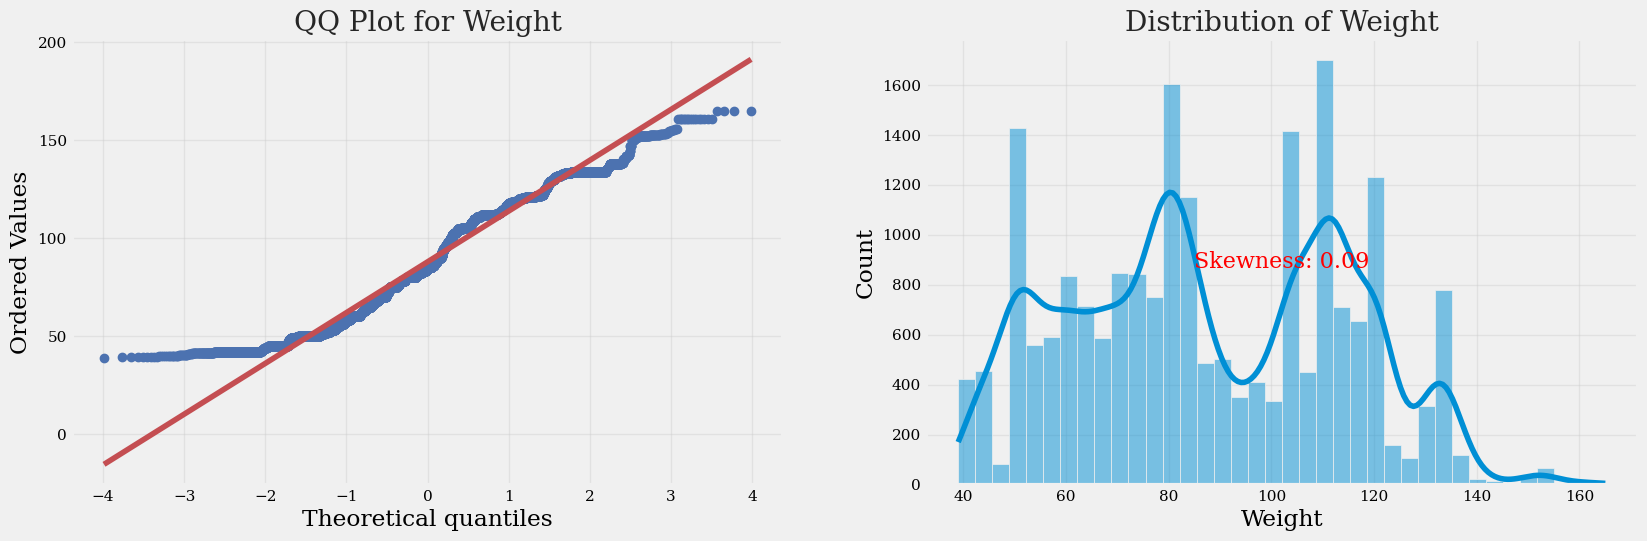

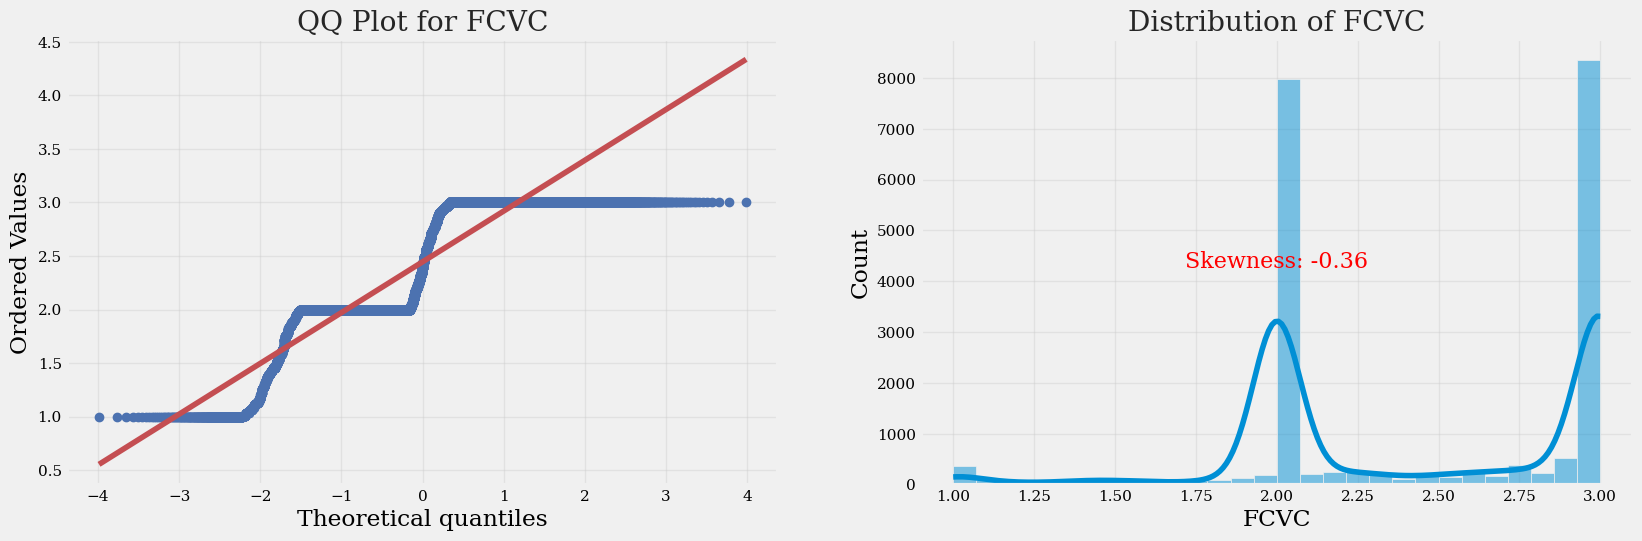

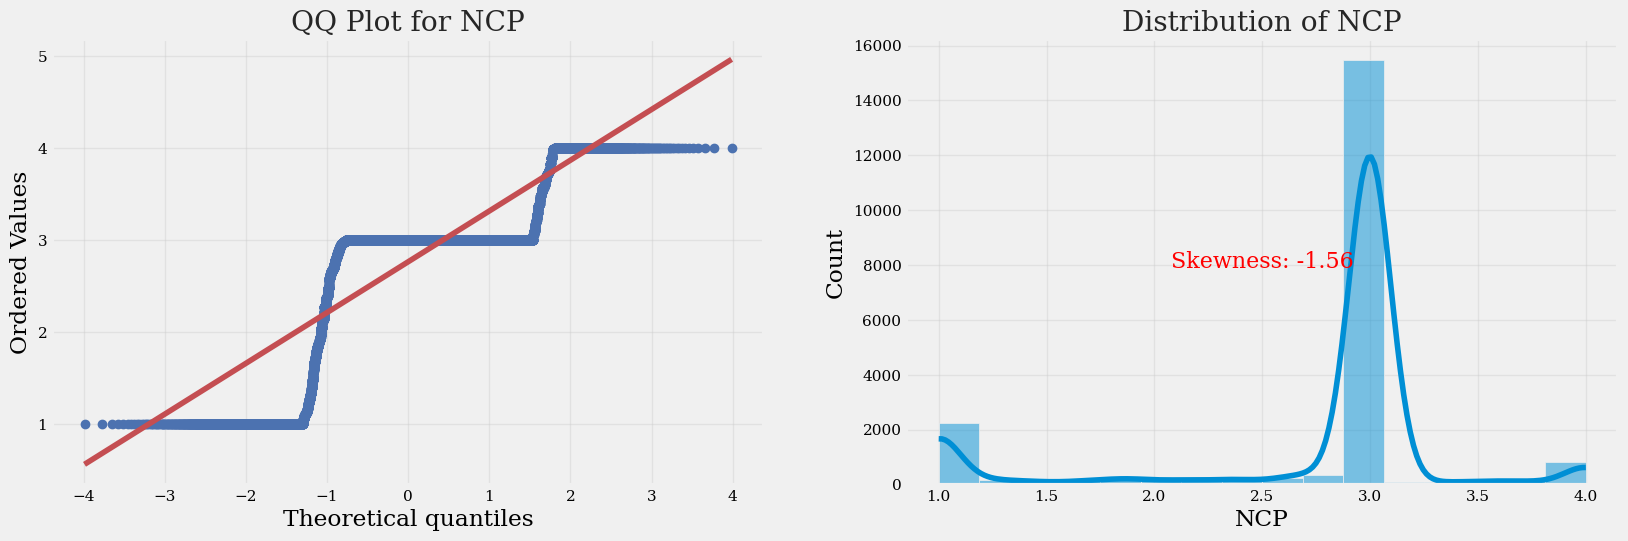

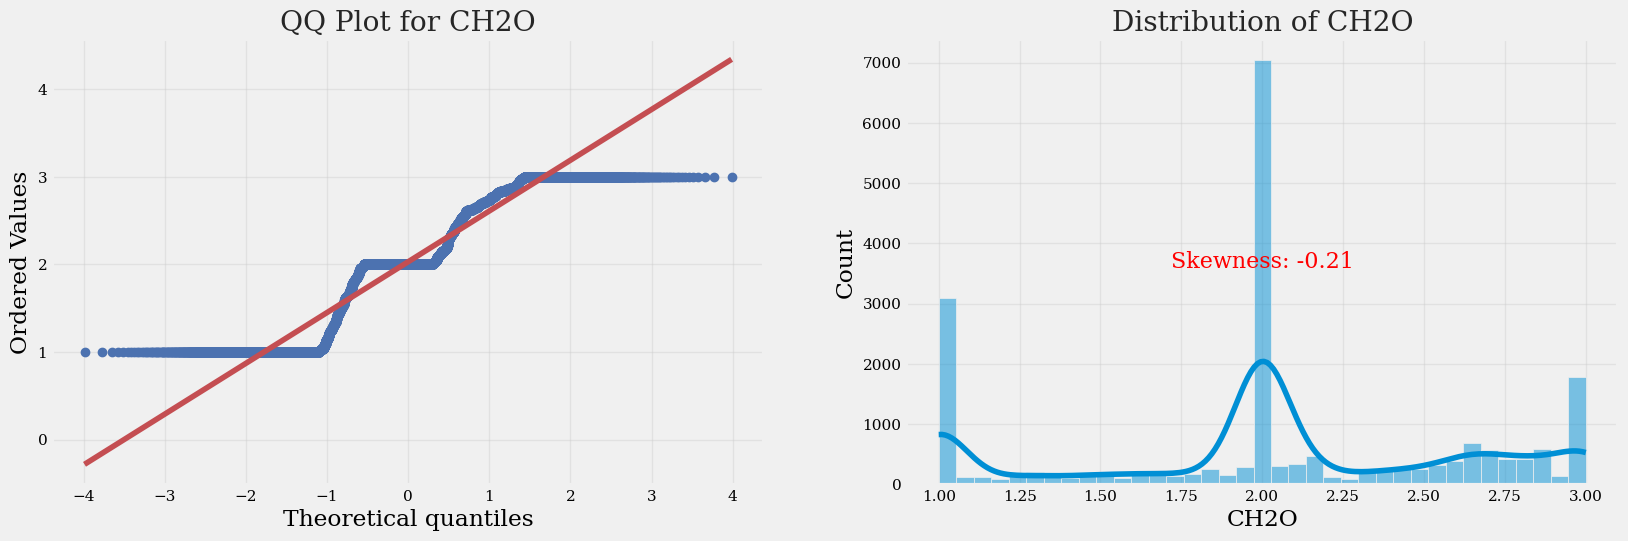

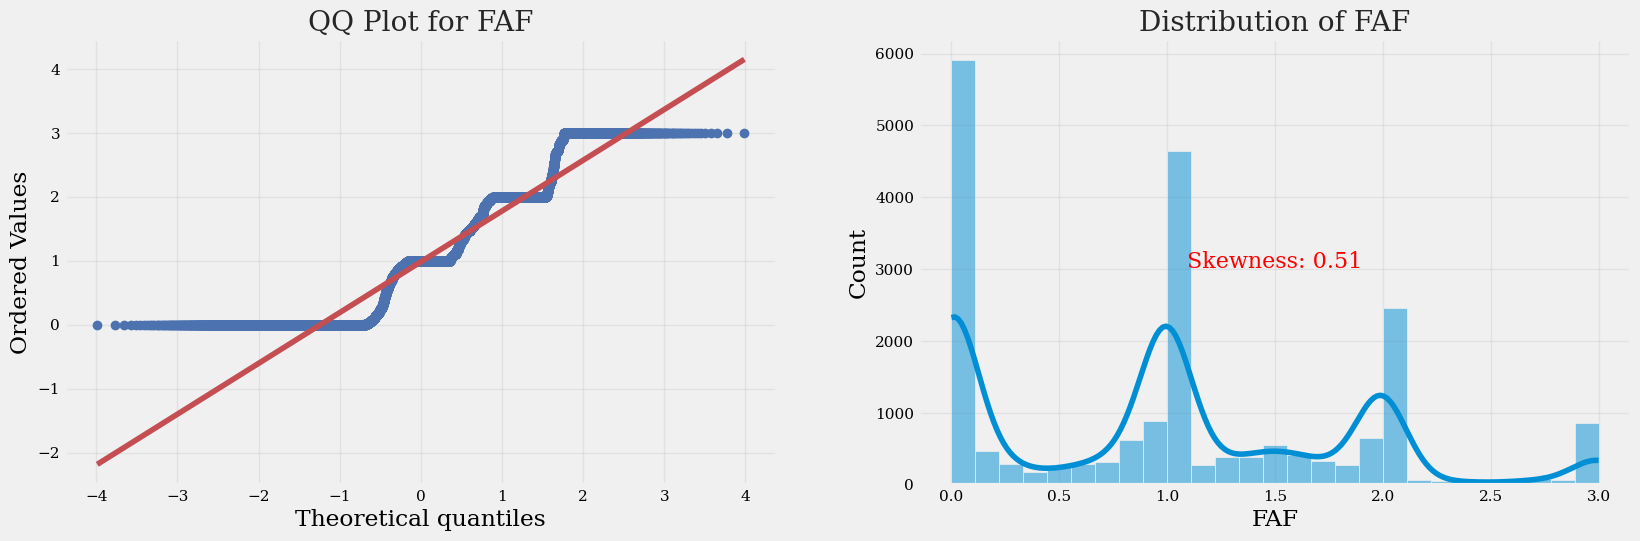

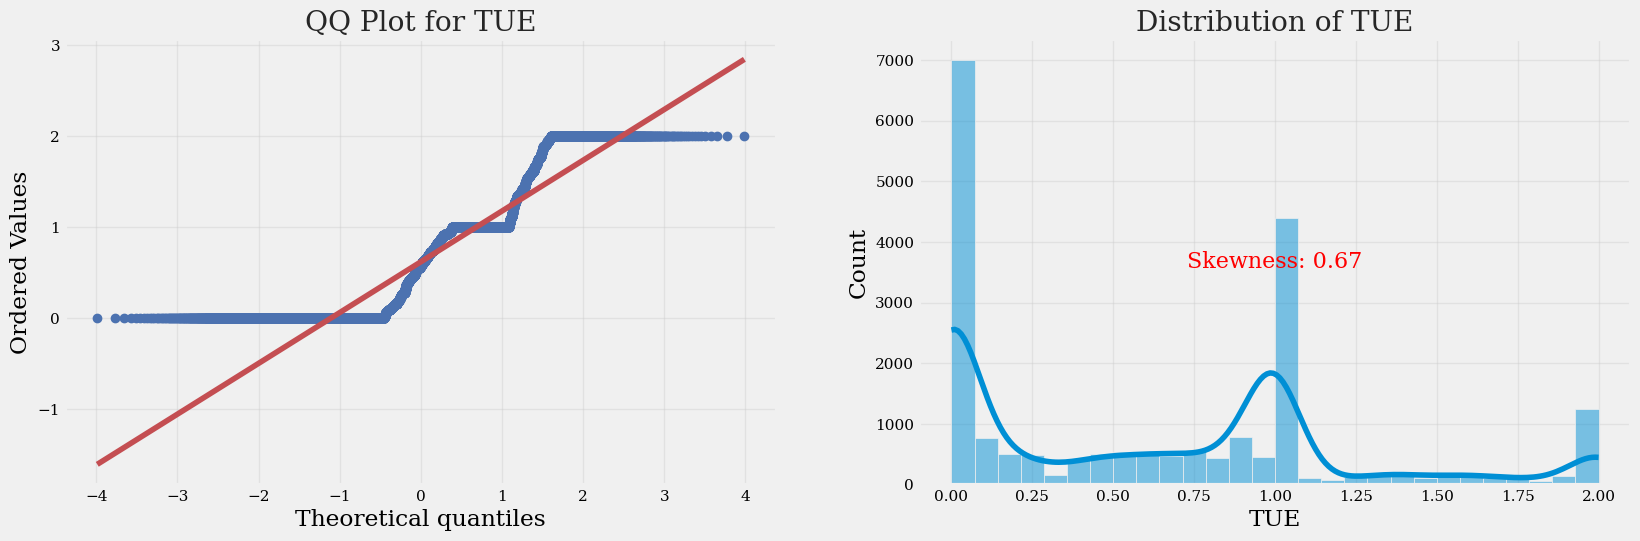

In [34]:
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()

for var in continuous_vars:
    qq_plot_with_skewness(train, var)

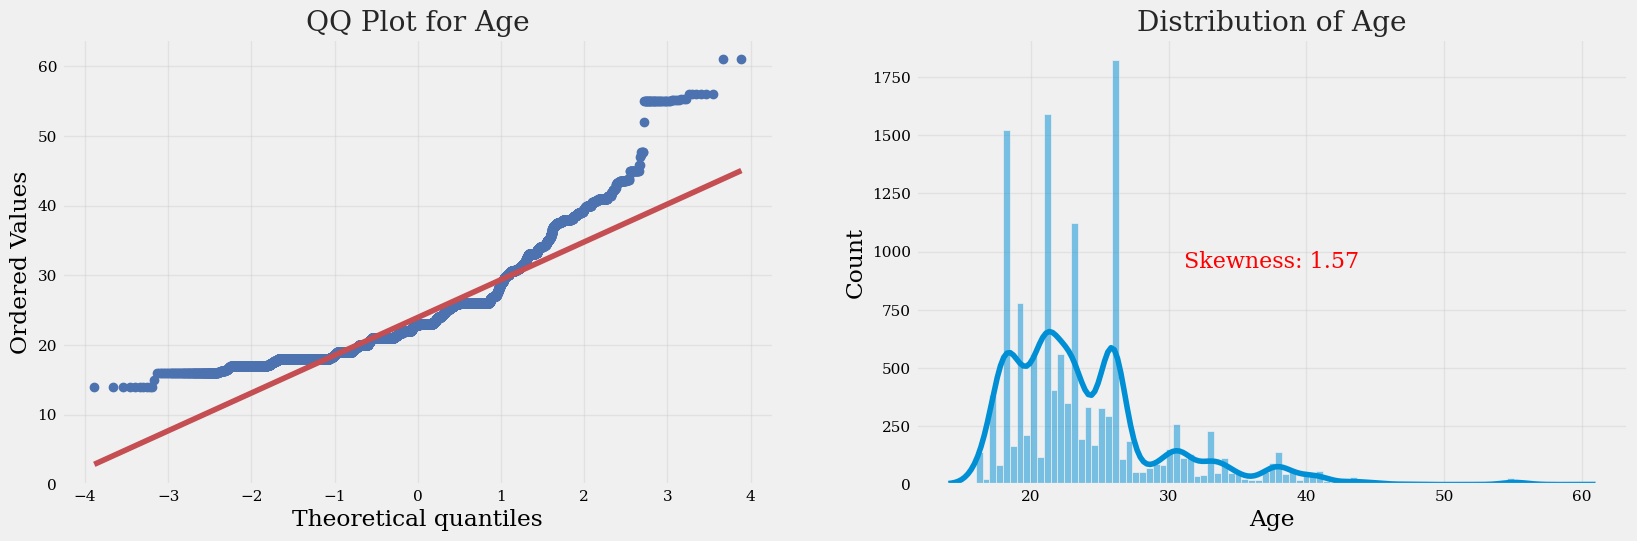

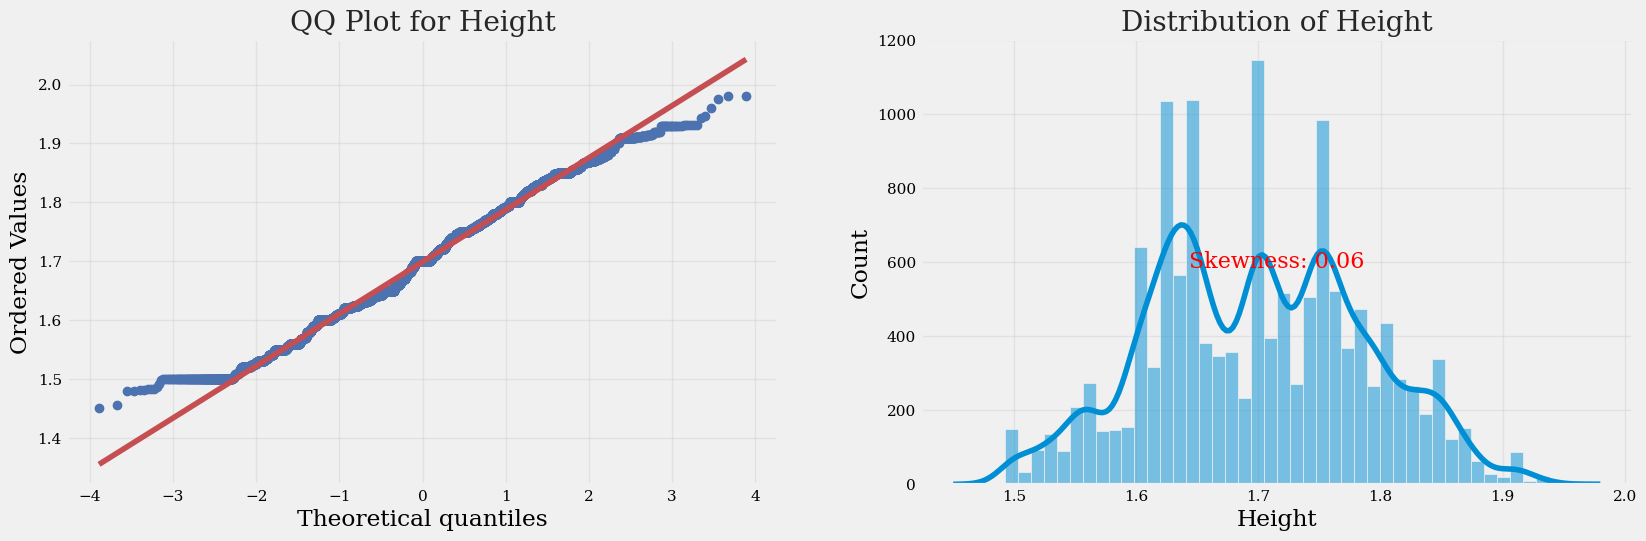

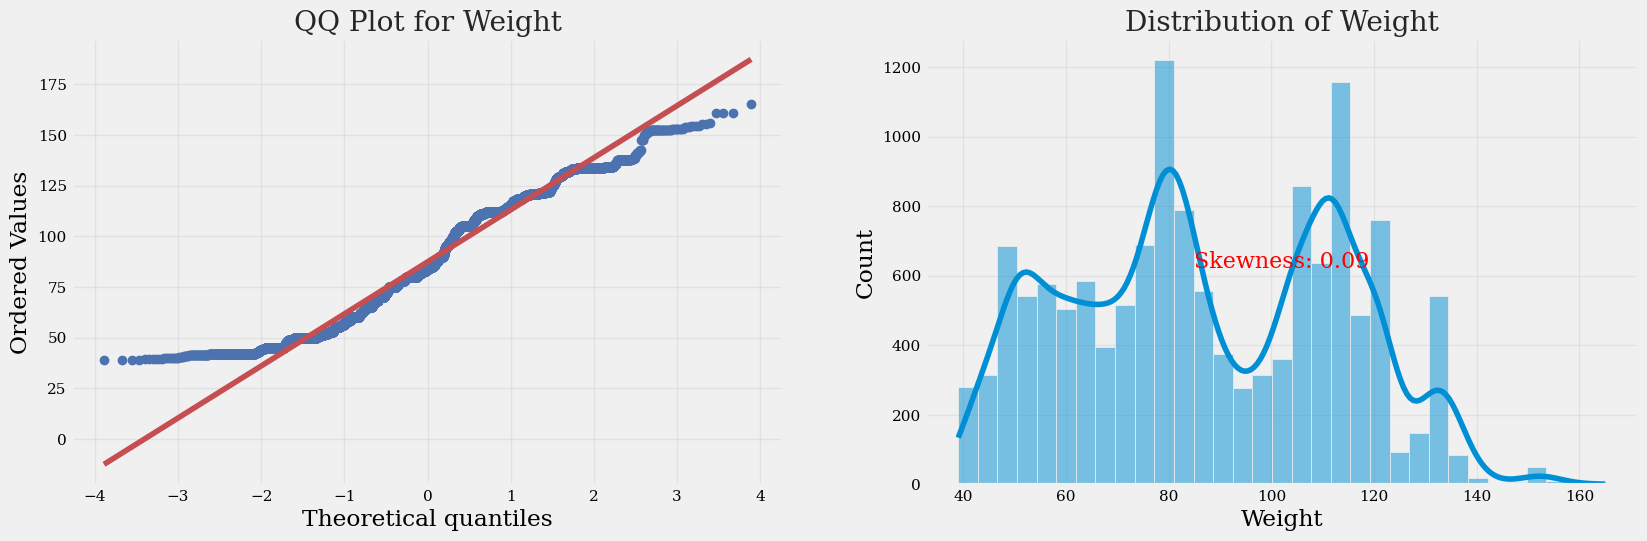

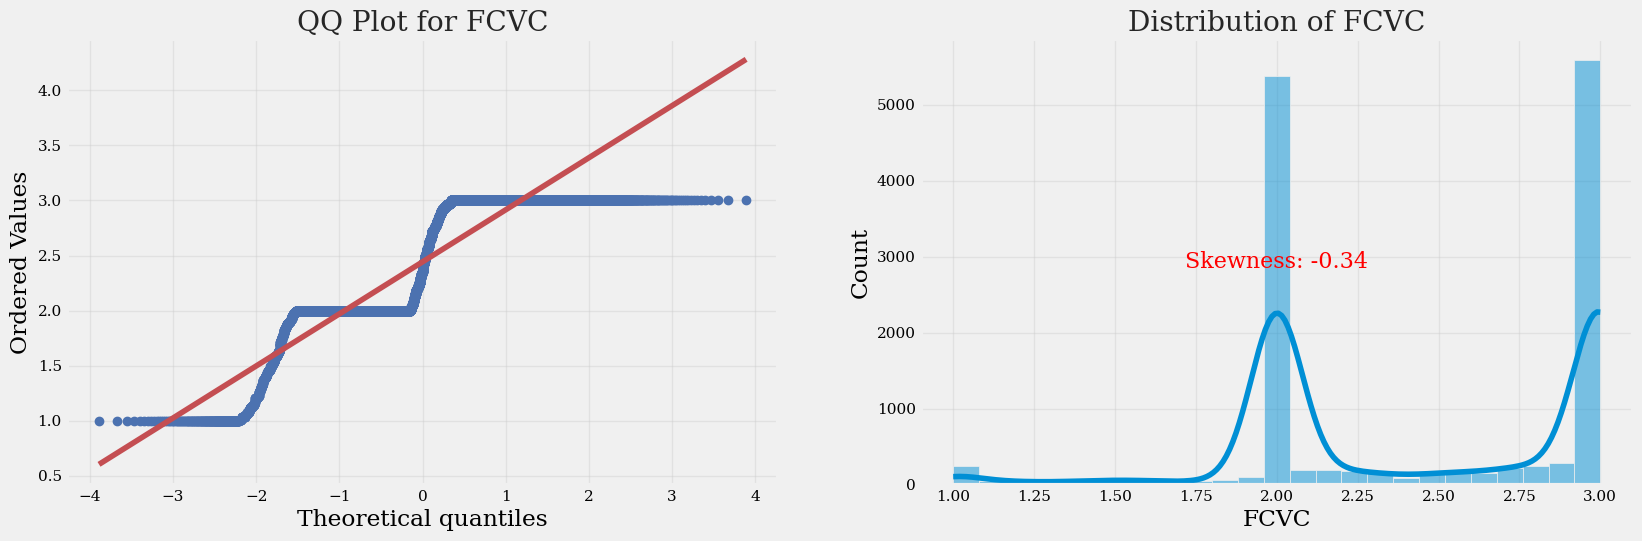

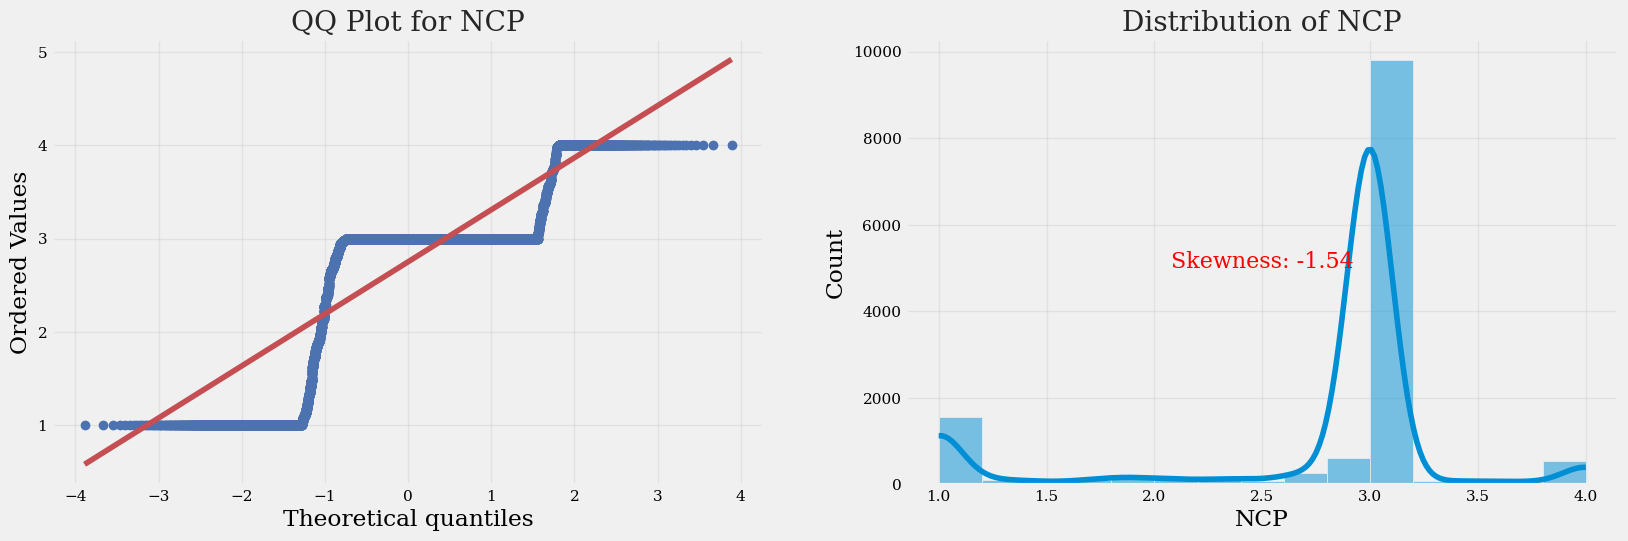

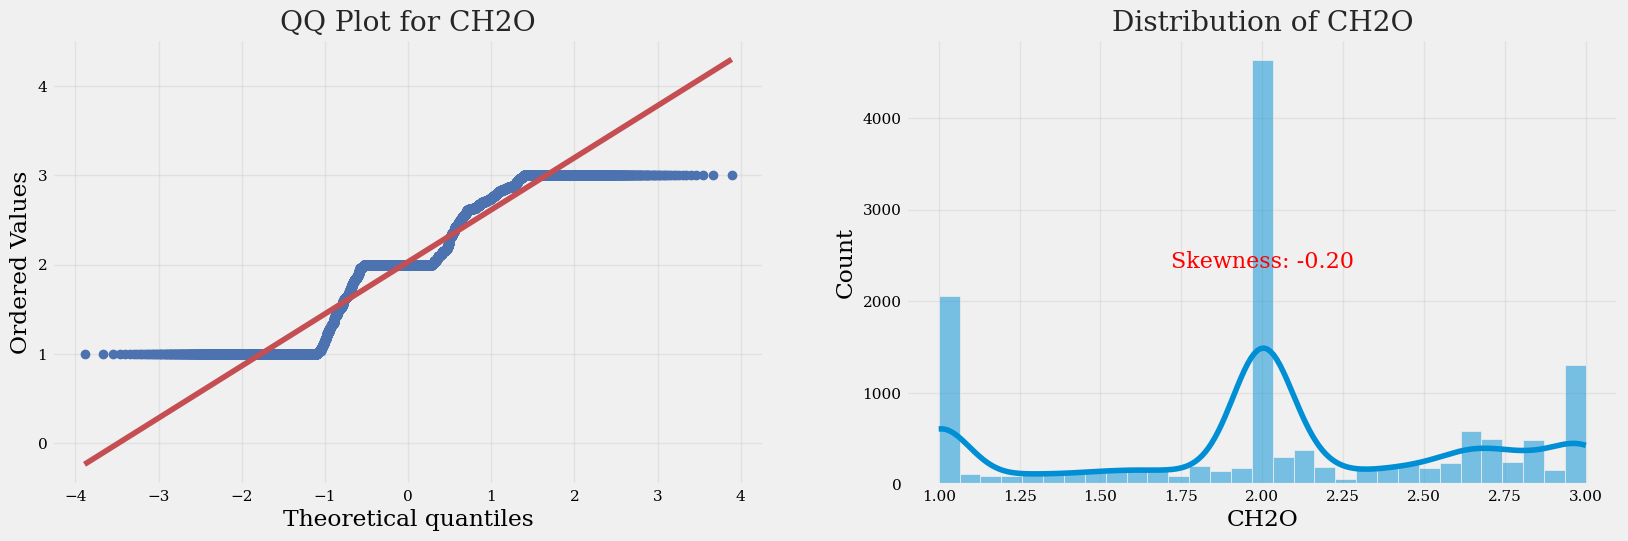

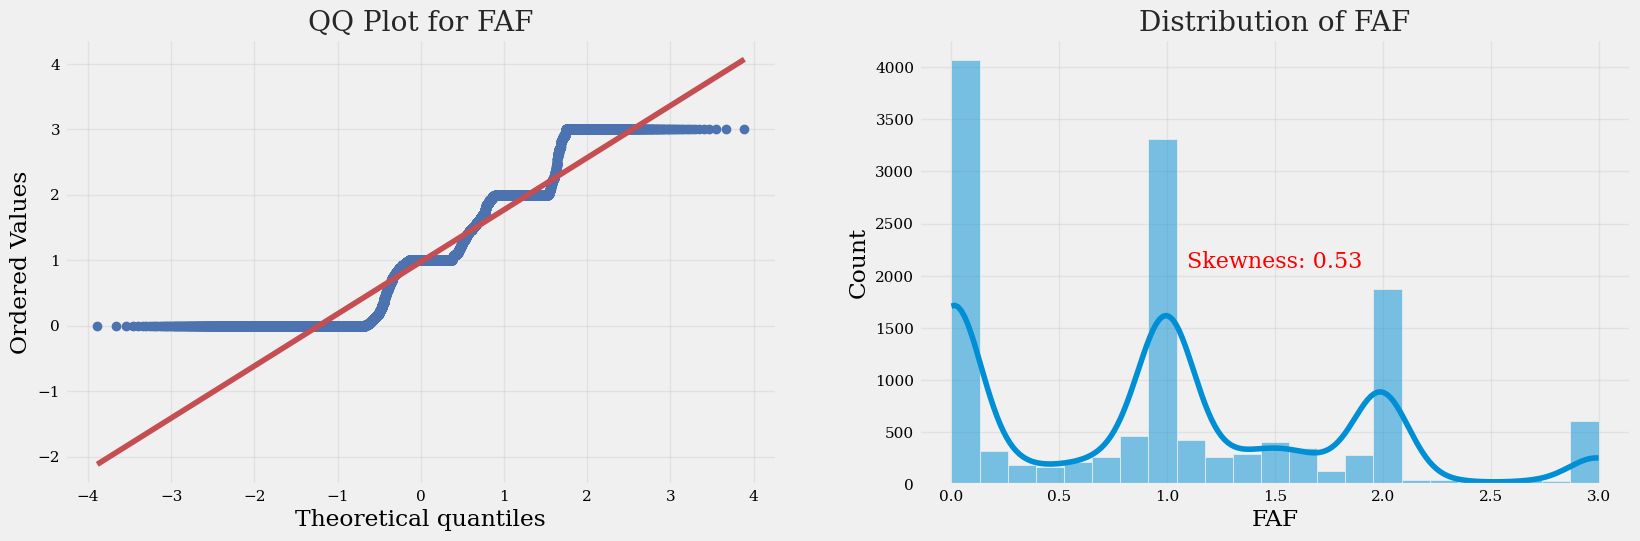

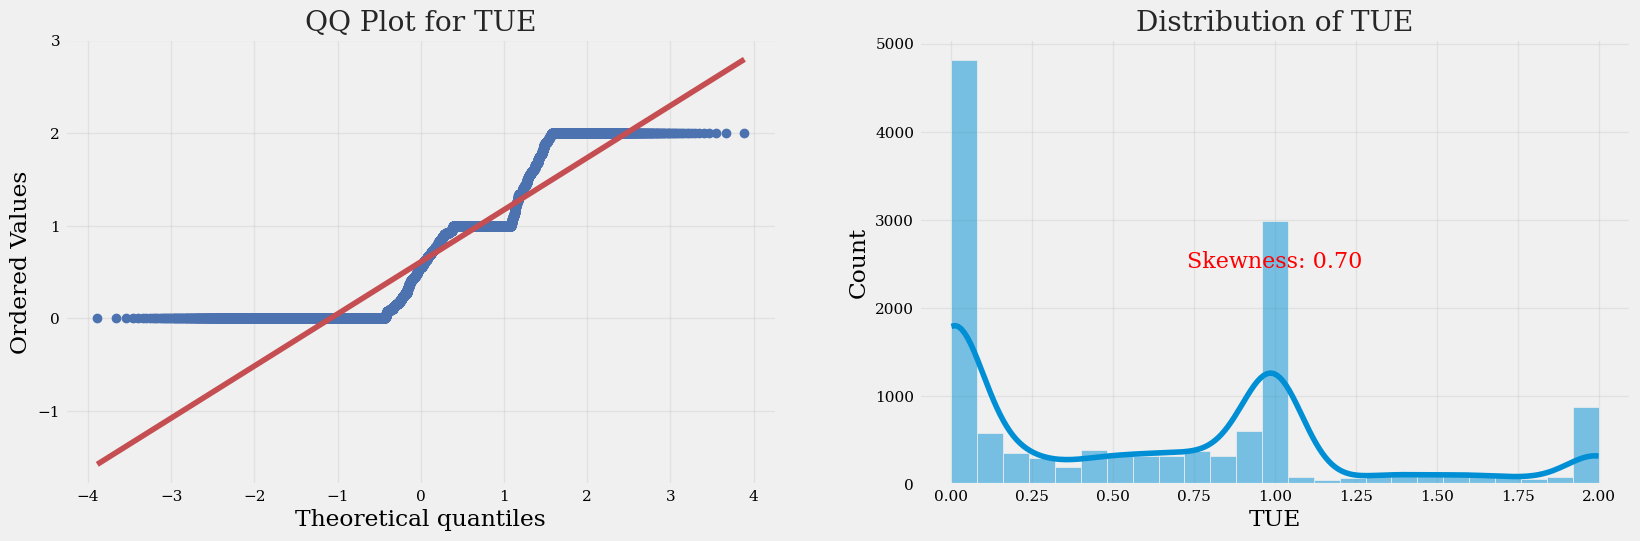

In [35]:
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()

for var in continuous_vars:
    qq_plot_with_skewness(test, var)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    FEATURE ENGENEERING  
</div>


In [36]:
train['BMI'] = train['Weight'] / ((train['Height'] / 100) ** 2)
test['BMI'] = test['Weight'] / ((test['Height'] / 100) ** 2)

In [37]:
train['Physical_Activity_Score'] = train['FCVC'] * train['FAF'] / train['TUE']
test['Physical_Activity_Score'] = test['FCVC'] * test['FAF'] / test['TUE']

In [38]:
train['Healthy_Habits_Score'] = train['CH2O'] * (train['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}))
test['Healthy_Habits_Score'] = test['CH2O'] * (test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}))

In [39]:
# I want to create three age groups: 'Young', 'Adult', 'Senior'
bins = [0, 30, 60, float('inf')]
labels = ['Young', 'Adult', 'Senior']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)


In [40]:
train['Gender_Family_History'] = train['Gender'] + '_' + train['family_history_with_overweight']

test['Gender_Family_History'] = test['Gender'] + '_' + test['family_history_with_overweight']


In [41]:
train['Physical_Activity_Intensity'] = train['FAF'] / train['TUE']
test['Physical_Activity_Intensity'] = test['FAF'] / test['TUE']



In [42]:
train['Meal_Regularity'] = train['NCP'] * (1 + train['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}))
test['Meal_Regularity'] = test['NCP'] * (1 + test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}))

In [43]:
train['Social_Circles_Binary'] = (train['SCC'] == 'yes').astype(int)
test['Social_Circles_Binary'] = (test['SCC'] == 'yes').astype(int)


In [44]:
train['Weight_Status'] = pd.cut(train['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])
test['Weight_Status'] = pd.cut(test['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])


In [45]:
train['Hydration_Status'] = train['CH2O'] / train['Weight']
test['Hydration_Status'] = test['CH2O'] / test['Weight']


In [46]:
train['Social_Habits'] = train['SMOKE'].map({'no': 0, 'yes': 1}) + train['SCC'].map({'no': 0, 'yes': 1})
test['Social_Habits'] = test['SMOKE'].map({'no': 0, 'yes': 1}) + test['SCC'].map({'no': 0, 'yes': 1})

In [47]:
bins = [0, 18.5, 25, 30, 35, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II']
train['BMI_Category'] = pd.cut(train['BMI'], bins=bins, labels=labels, right=False)
test['BMI_Category'] = pd.cut(test['BMI'], bins=bins, labels=labels, right=False)


In [48]:
# Assuming 'MTRANS' is a categorical variable
# Assign numerical values to 'MTRANS' (e.g., 0 for 'Automobile', 1 for 'Bike', 2 for 'Public_Transportation', 3 for 'Walking', 4 for 'Motorbike')
train['Physical_Activity_Diversity'] = train['FAF'] * (1 + train['MTRANS'].map({'Automobile': 0, 'Bike': 1, 'Public_Transportation': 2, 'Walking': 3, 'Motorbike': 4}))
test['Physical_Activity_Diversity'] = test['FAF'] * (1 + test['MTRANS'].map({'Automobile': 0, 'Bike': 1, 'Public_Transportation': 2, 'Walking': 3, 'Motorbike': 4}))


In [49]:
train['Meal_Timing'] = train['NCP'] * (1 + train['TUE'])
test['Meal_Timing'] = test['NCP'] * (1 + test['TUE'])


In [50]:
#train['Total_Caloric_Intake'] = train['FCVC'] + train['CH2O'] + train['CALC']
#test['Total_Caloric_Intake'] = test['FCVC'] + test['CH2O'] + test['CALC']


In [51]:
train.sample(5).style.background_gradient()

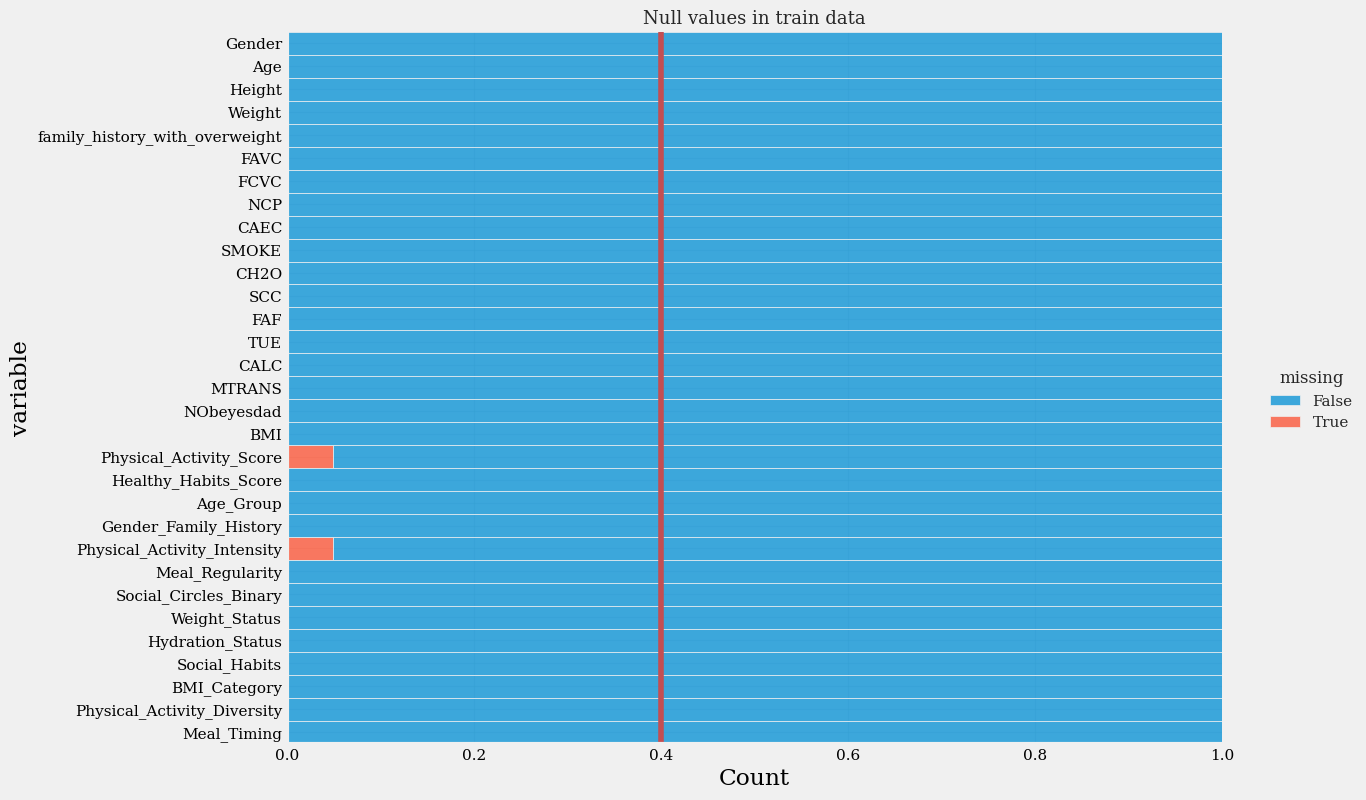

In [52]:
sns.displot(data=train.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> Null value present in train data columns after feature extraction
</div>


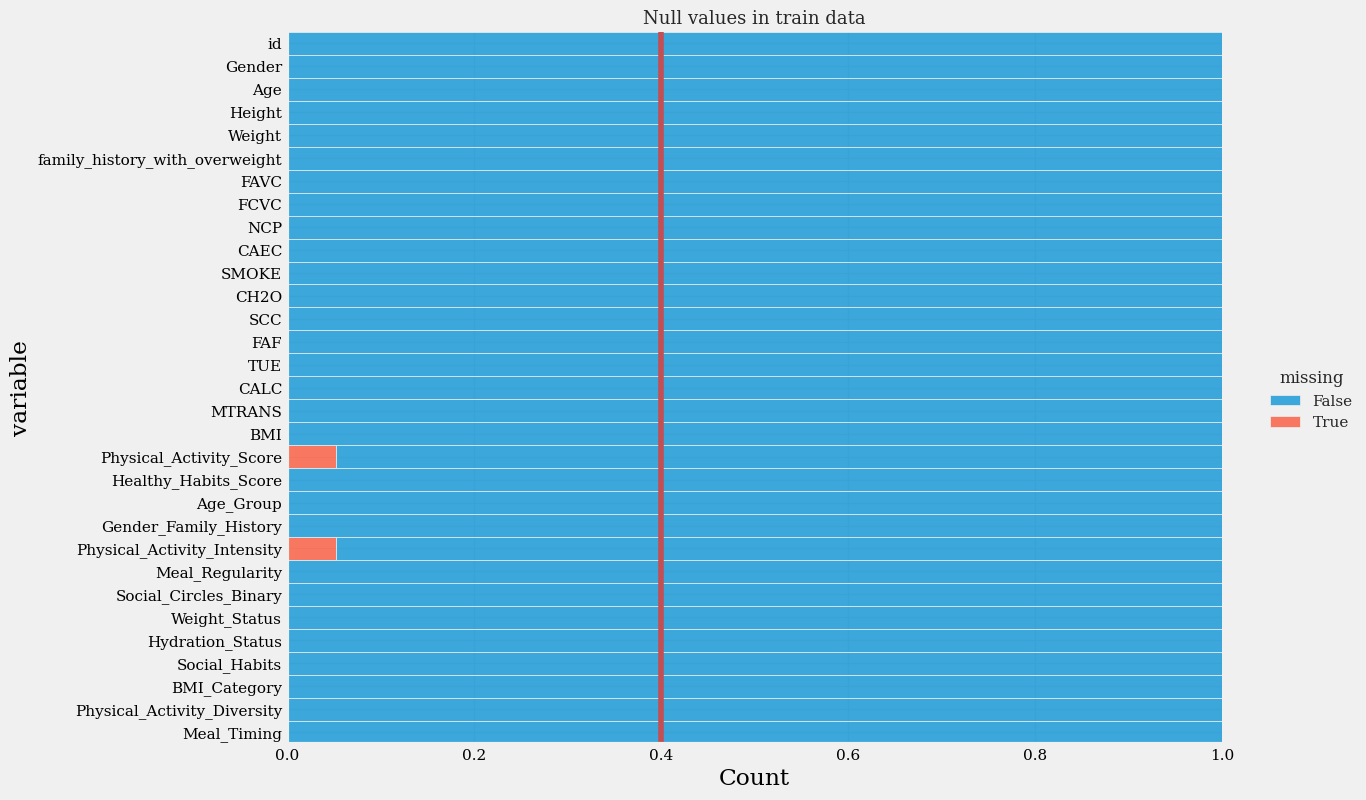

In [53]:
sns.displot(data=test.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information:</b> Null value present in test data columns after feature extraction
</div>


In [54]:
# Dropping those columns which have 100% null data 
#columns_to_drop = ['Total_Caloric_Intake', 'Overall_Caloric_Intake', 'CALC']
#train.drop(columns=columns_to_drop, axis=1, inplace=True)
#test.drop(columns=columns_to_drop, axis=1, inplace=True)


In [55]:
#Handle those which have null value less than 5%
mean1 = train['Physical_Activity_Score'].mean()
mean2 = train['Physical_Activity_Intensity'].mean()

train['Physical_Activity_Score'].fillna(mean1,inplace = True)
test['Physical_Activity_Score'].fillna(mean1,inplace = True)

train['Physical_Activity_Intensity'].fillna(mean2,inplace = True)
test['Physical_Activity_Intensity'].fillna(mean2,inplace = True)

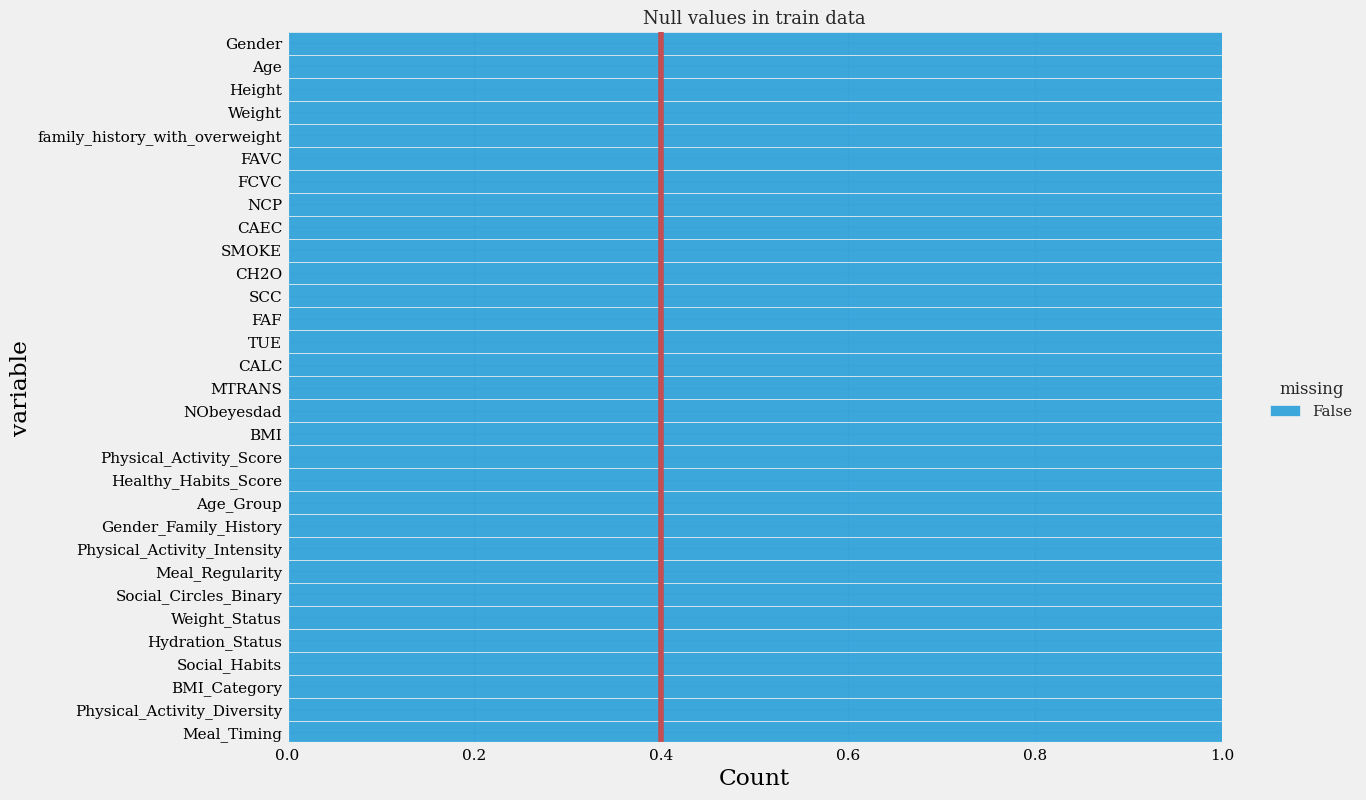

In [56]:
sns.displot(data=train.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          20758 non-null  object  
 1   Age                             20758 non-null  float64 
 2   Height                          20758 non-null  float64 
 3   Weight                          20758 non-null  float64 
 4   family_history_with_overweight  20758 non-null  object  
 5   FAVC                            20758 non-null  object  
 6   FCVC                            20758 non-null  float64 
 7   NCP                             20758 non-null  float64 
 8   CAEC                            20758 non-null  object  
 9   SMOKE                           20758 non-null  object  
 10  CH2O                            20758 non-null  float64 
 11  SCC                             20758 non-null  object  
 12  FAF                    

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information about test data after feature engeneering :</b> 
    
1. 32 columns in train data after feature engeneering.
    
2. Many of them are int data type, many are float datatype, and many are object datatype
</div>

In [58]:
#train.drop(columns=['id'],axis=1,inplace=True)
test.drop(columns=['id'],axis=1,inplace=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    OUTLIERS CHECK BY BOX PLOT
</div>


In [59]:
numerical_columns = train.select_dtypes(include='number').columns


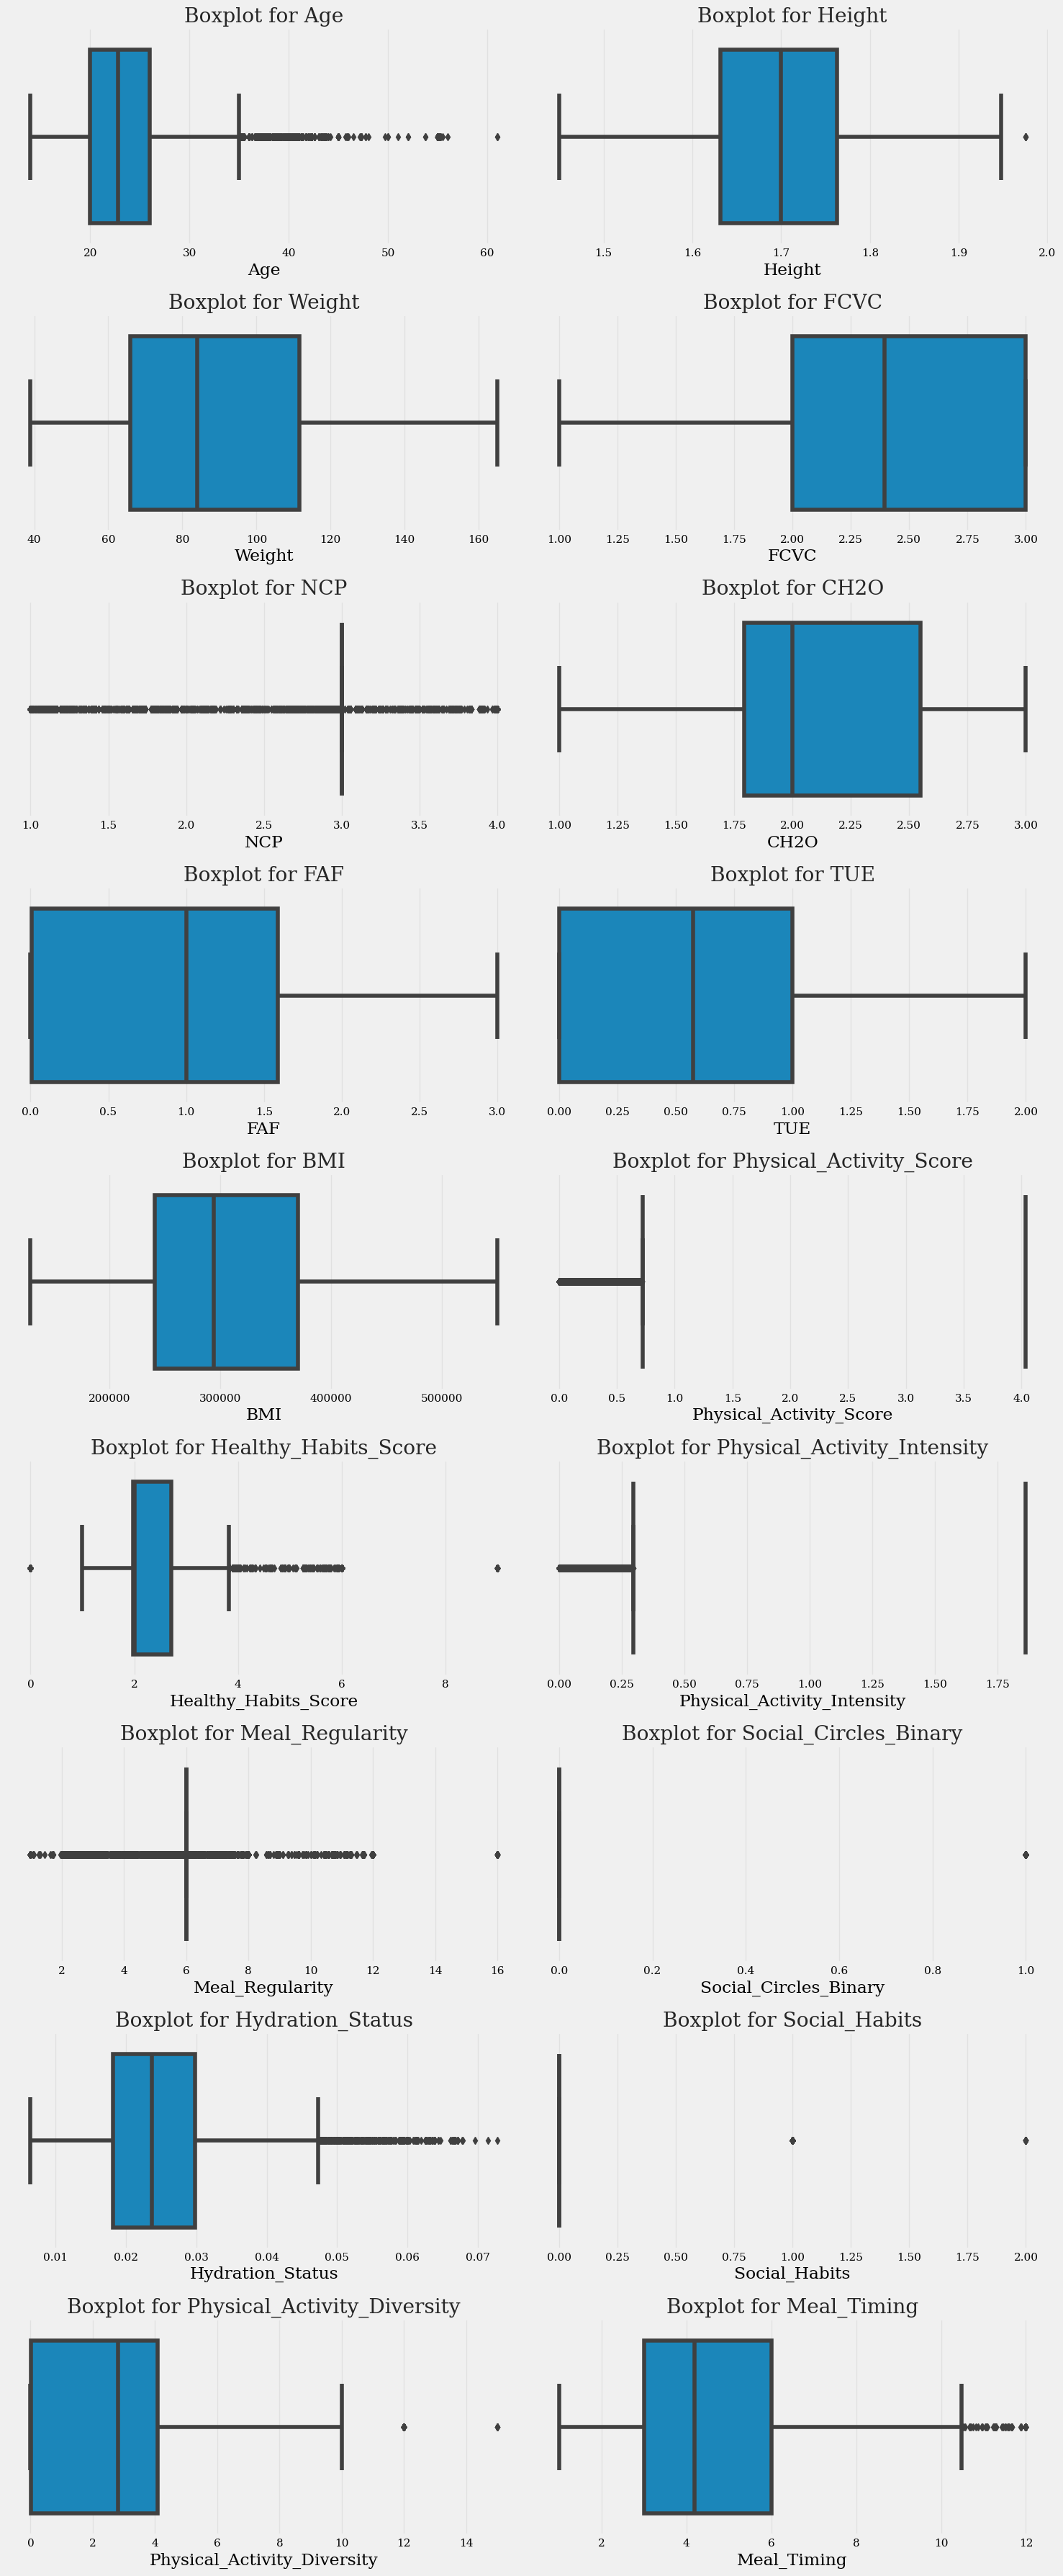

In [60]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()
#columns_to_check_outliers = [
 #      'Age_scaled', 'CreditScore_scaled', 'Balance_scaled',
 #      'EstimatedSalary_scaled']
plot_boxplots(train, numerical_columns)

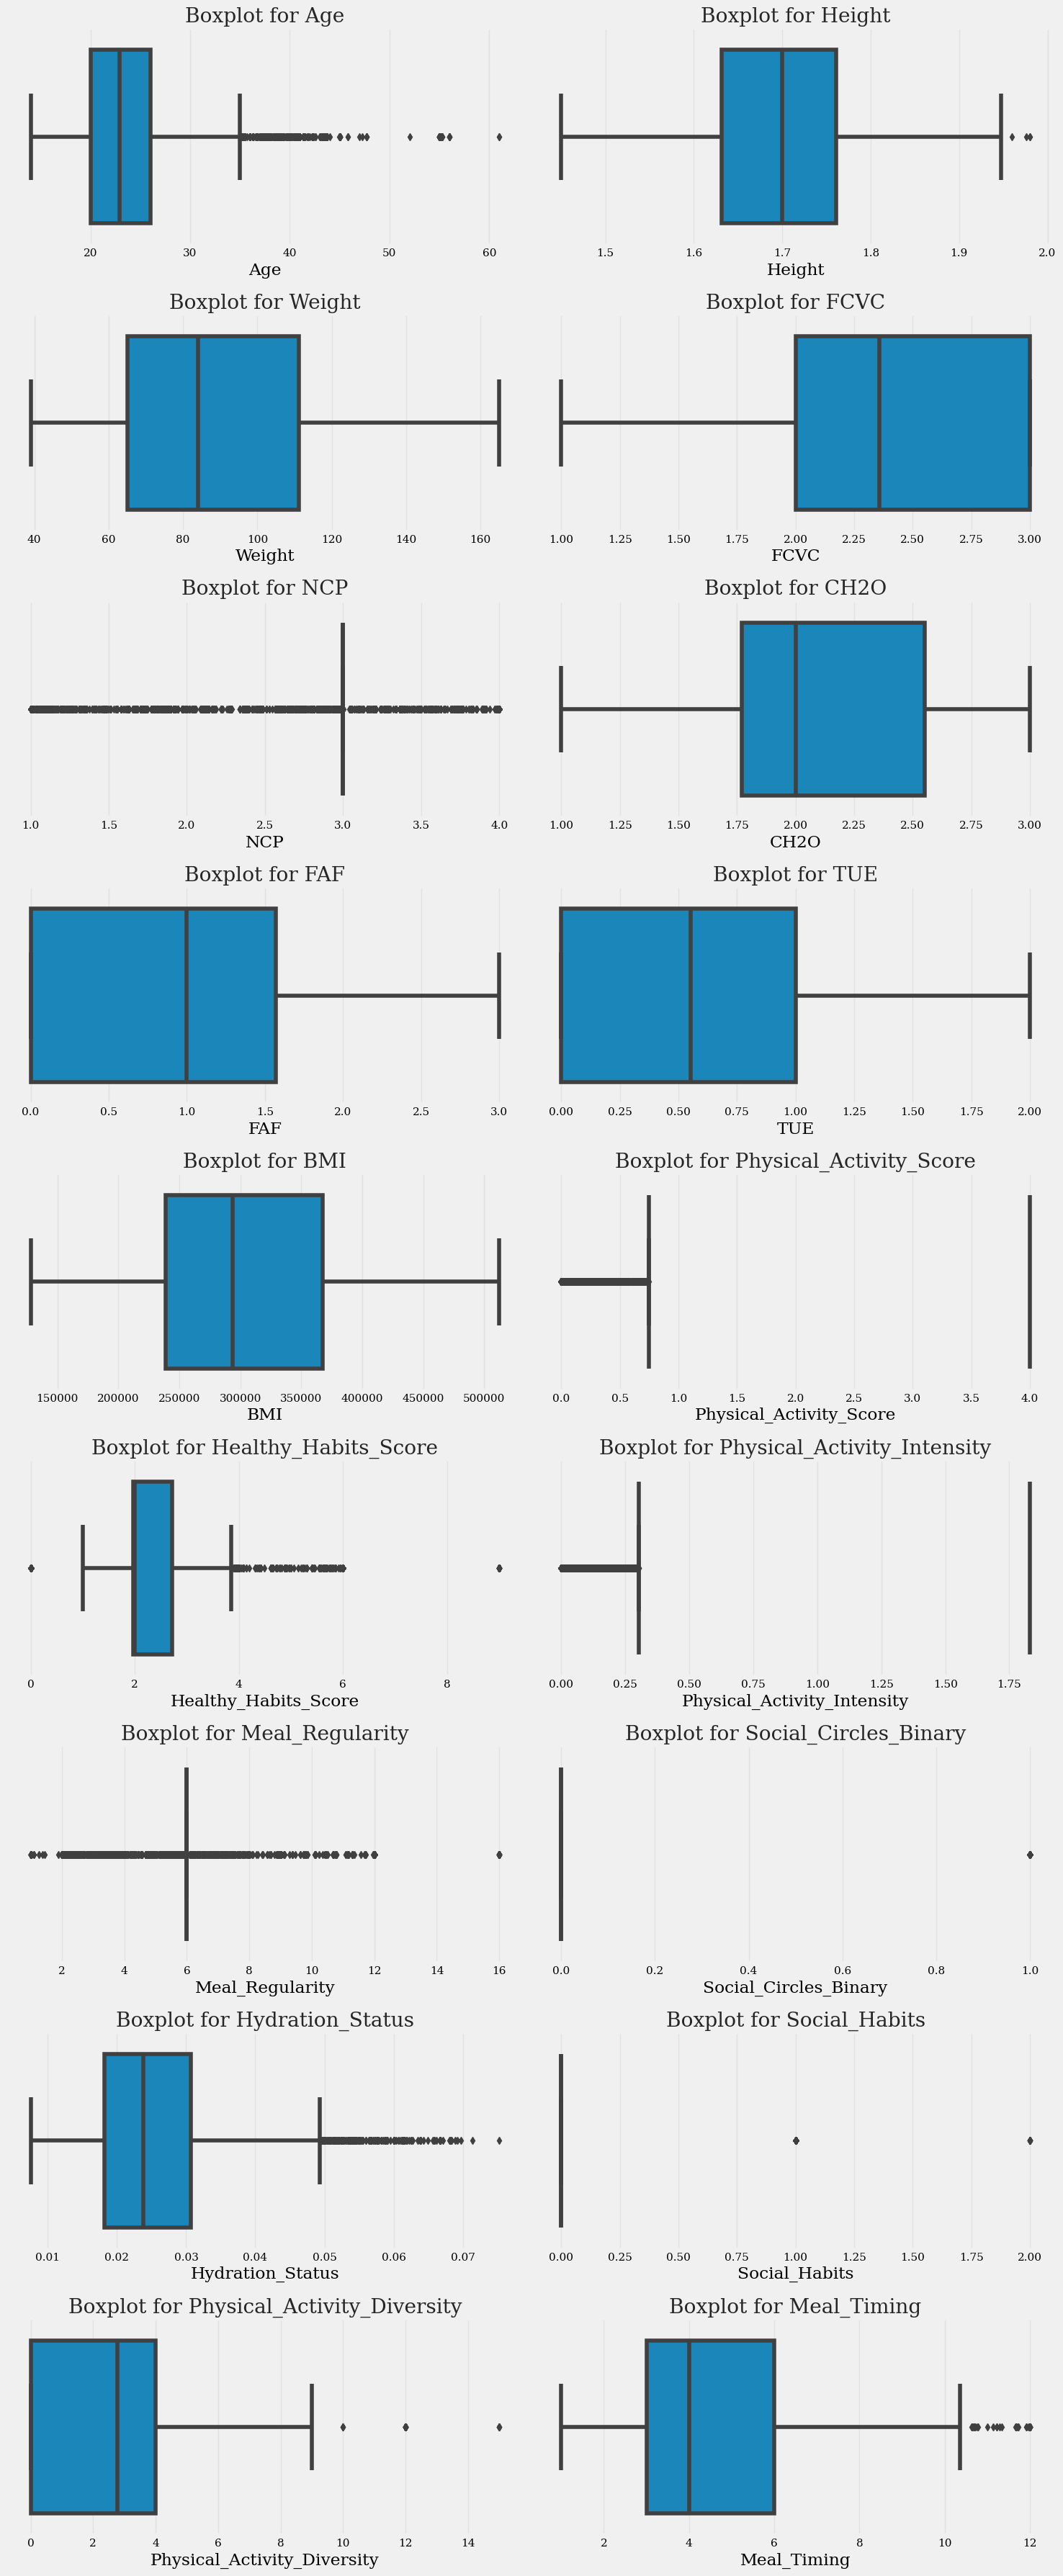

In [61]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()
#columns_to_check_outliers = [
 #      'Age_scaled', 'CreditScore_scaled', 'Balance_scaled',
 #      'EstimatedSalary_scaled']
plot_boxplots(test, numerical_columns)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    REMOVING THE OUTLIERS
</div>


In [62]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

columns_to_remove_outliers_replace = ['Age', 'Hydration_Status','Meal_Timing']
train = remove_outliers_replace(train, columns_to_remove_outliers_replace)
test = remove_outliers_replace(test, columns_to_remove_outliers_replace)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #FFCCCC;">
    <b>☠ Danger:</b> Before train the model just just convert all the categorical columns 
</div>


In [63]:
train.sample(5).style.background_gradient()

In [64]:
df = train.copy()

In [65]:
test['CALC'] = test['CALC'].replace({'Always': 'Frequently'})


In [66]:
df_unique_counts = df.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars_df = df_unique_counts[df_unique_counts > threshold].index.tolist()

if 'id' in continuous_vars_df:
    continuous_vars_df.remove('id')

In [67]:
"""df_y = df.NObeyesdad
mutual_df = df[continuous_vars_df]

mutual_info = mutual_info_classif(mutual_df,df_y, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient()"""

'df_y = df.NObeyesdad\nmutual_df = df[continuous_vars_df]\n\nmutual_info = mutual_info_classif(mutual_df,df_y, random_state=42)\n\nmutual_info = pd.Series(mutual_info)\nmutual_info.index = mutual_df.columns\nmutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )\nmutual_info.style.background_gradient()'

In [68]:
categorical_columns = ['FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
train = pd.get_dummies(train, columns=categorical_columns,dtype='int',prefix=categorical_columns, drop_first=True)

In [69]:
test = pd.get_dummies(test, columns=categorical_columns,dtype='int',prefix=categorical_columns, drop_first=True)

In [70]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Gender_Family_History'])
train = encoder.fit_transform(train)


In [71]:
test = encoder.fit_transform(test)


In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['family_history_with_overweight'] = label_encoder.fit_transform(train['family_history_with_overweight'])

# One-Hot Encoding
train = pd.get_dummies(train, columns=[ 'Age_Group', 'Weight_Status', 'BMI_Category'],dtype='int', prefix=[ 'Age', 'Weight', 'BMI'])

In [73]:
test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['family_history_with_overweight'] = label_encoder.fit_transform(test['family_history_with_overweight'])

# One-Hot Encoding
test = pd.get_dummies(test, columns=[ 'Age_Group', 'Weight_Status', 'BMI_Category'],dtype='int', prefix=['Age', 'Weight', 'BMI'])

In [74]:
label_encoder = LabelEncoder()
train['NObeyesdad_encoded'] = label_encoder.fit_transform(train['NObeyesdad'])


In [75]:
train.drop(columns=['NObeyesdad'],axis=1,inplace = True)

In [76]:
train.rename(columns={'NObeyesdad_encoded': 'NObeyesdad'}, inplace=True)


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FCVC                            20758 non-null  float64
 6   NCP                             20758 non-null  float64
 7   CH2O                            20758 non-null  float64
 8   FAF                             20758 non-null  float64
 9   TUE                             20758 non-null  float64
 10  BMI                             20758 non-null  float64
 11  Physical_Activity_Score         20758 non-null  float64
 12  Healthy_Habits_Score            20758

In [78]:
df_unique_counts = train.nunique()
categorical_vars_df = df_unique_counts[df_unique_counts <= threshold].index.tolist()

if 'NObeyesdad' in categorical_vars_df:
    categorical_vars_df.remove('NObeyesdad')
df_y = train.NObeyesdad
mutual_df = train[categorical_vars_df]

mutual_info = mutual_info_classif(mutual_df,df_y, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient()

In [79]:
feature_list = [feature for feature in final_train.columns if not feature  == "NObeyesdad"]

categorical_features = [feature for feature in final_train.columns if 
                        final_train[feature].dtype == "object" and feature  != "NObeyesdad"] 
numerical_features = [feature for feature in final_train.columns if 
                      feature not in categorical_features + ['NObeyesdad']]



#make sure no little feature left behind
assert feature_list.sort() == (categorical_features + numerical_features).sort()

In [80]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):
        self.add_attributes = add_attributes
        self.feature_names = []  
        self.original_features = []
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.add_attributes:
            X_copy = X.copy()
            self.original_features = X.columns

            X_copy["BMI"] = X_copy["Weight"]  / X_copy["Height"]**2
            self.feature_names = X_copy.columns

            return X_copy[self.feature_names]
        else:
            return X

    def get_feature_names_out(self, input_features=None):
        if self.add_attributes:
            return self.feature_names
        else:
            return self.original_features

In [81]:
creator = FeatureCreator()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Dividing the independent and dependent columns seperately  
</div>


In [82]:
X = train.drop(columns=['NObeyesdad'],axis=1)
Y = train.iloc[:,47]

In [83]:
X_xg = Another_train.drop(columns=['NObeyesdad'],axis=1)
Y_xg = Another_train['NObeyesdad']

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    CORRELATION  
</div>


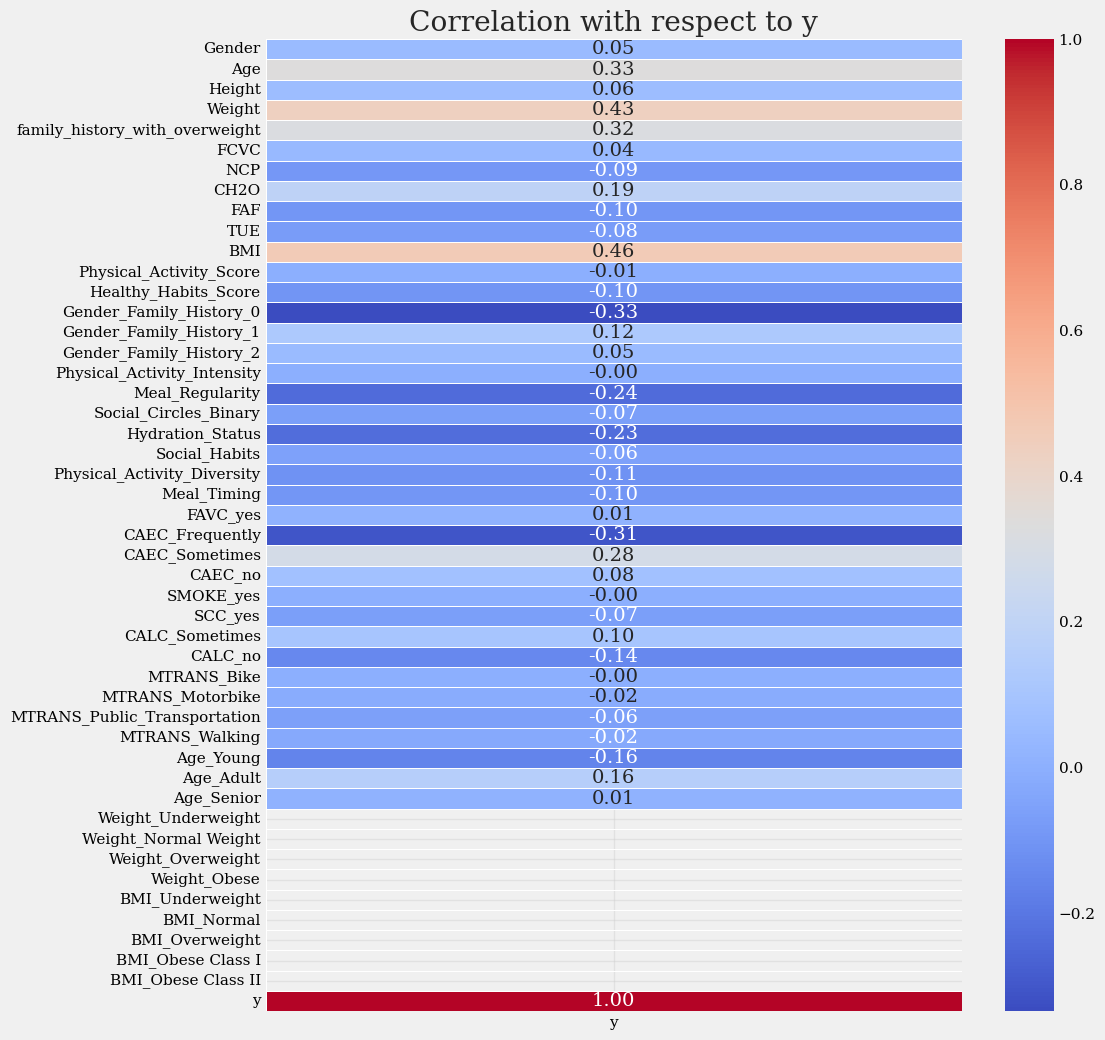

In [84]:
#Using smote variable with respect to target column
correlation_matrix = X.assign(y=Y).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 12))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix[['y']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize plot
plt.title('Correlation with respect to y')
plt.show()

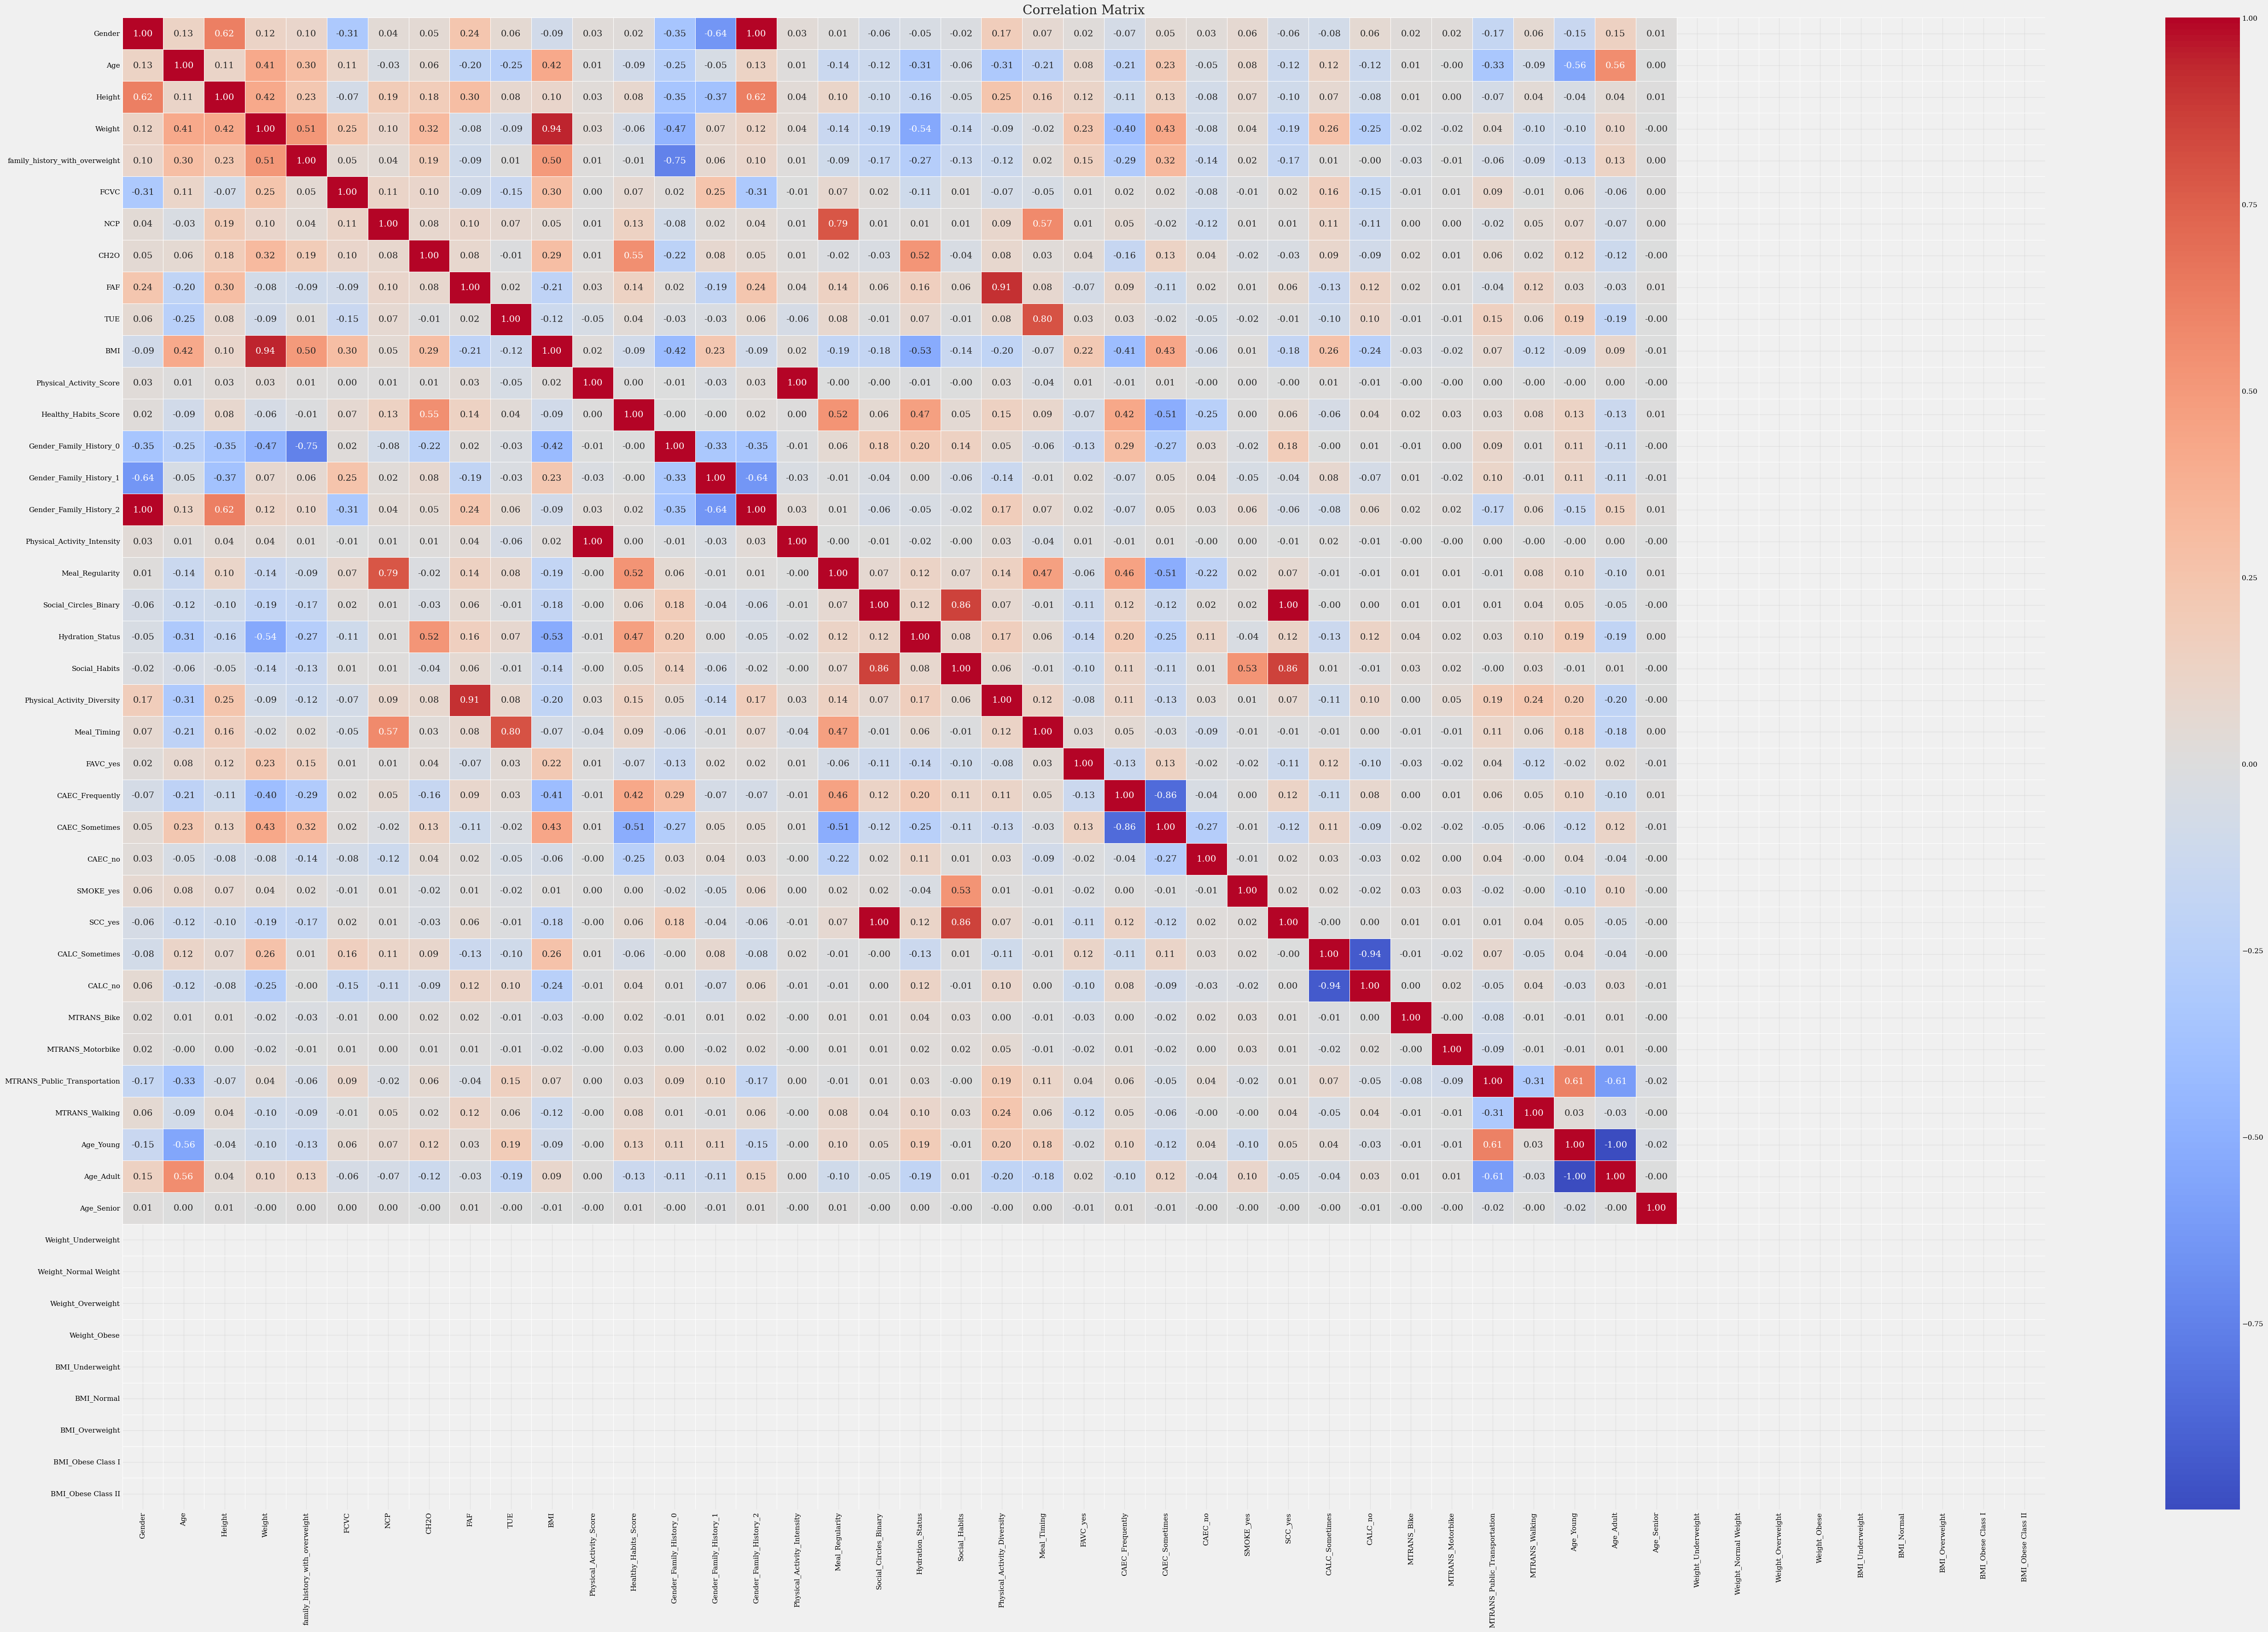

In [85]:
correlation_matrix = X.corr() 

# Set up the matplotlib figure
plt.figure(figsize=(60, 40))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize plot
plt.title('Correlation Matrix')
plt.show()

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FCVC                            20758 non-null  float64
 6   NCP                             20758 non-null  float64
 7   CH2O                            20758 non-null  float64
 8   FAF                             20758 non-null  float64
 9   TUE                             20758 non-null  float64
 10  BMI                             20758 non-null  float64
 11  Physical_Activity_Score         20758 non-null  float64
 12  Healthy_Habits_Score            20758

In [87]:
X.drop(columns=['Weight_Underweight','Weight_Normal Weight','Weight_Overweight','BMI_Obese Class II','BMI_Obese Class I','BMI_Overweight','BMI_Normal','BMI_Underweight','Weight_Obese','Physical_Activity_Score','Physical_Activity_Intensity'],axis=1,inplace=True)
train.drop(columns=['Weight_Underweight','Weight_Normal Weight','Weight_Overweight','BMI_Obese Class II','BMI_Obese Class I','BMI_Overweight','BMI_Normal','BMI_Underweight','Weight_Obese','Physical_Activity_Score','Physical_Activity_Intensity'],axis=1,inplace=True)
test.drop(columns=['Weight_Underweight','Weight_Normal Weight','Weight_Overweight','BMI_Obese Class II','BMI_Obese Class I','BMI_Overweight','BMI_Normal','BMI_Underweight','Weight_Obese','Physical_Activity_Score','Physical_Activity_Intensity'],axis=1,inplace=True)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Scaling the Data   
</div>


In [88]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    HYPOTHESIS TESTING CLASS FOR AUTO SELECT THE COLUMNS
</div>


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information about Hypothesis Testing :</b> 
    
1. t-test abd chi2 are used.
    
2. Divide the categorical column and integer column for appliying t-test and chi2 test
</div>

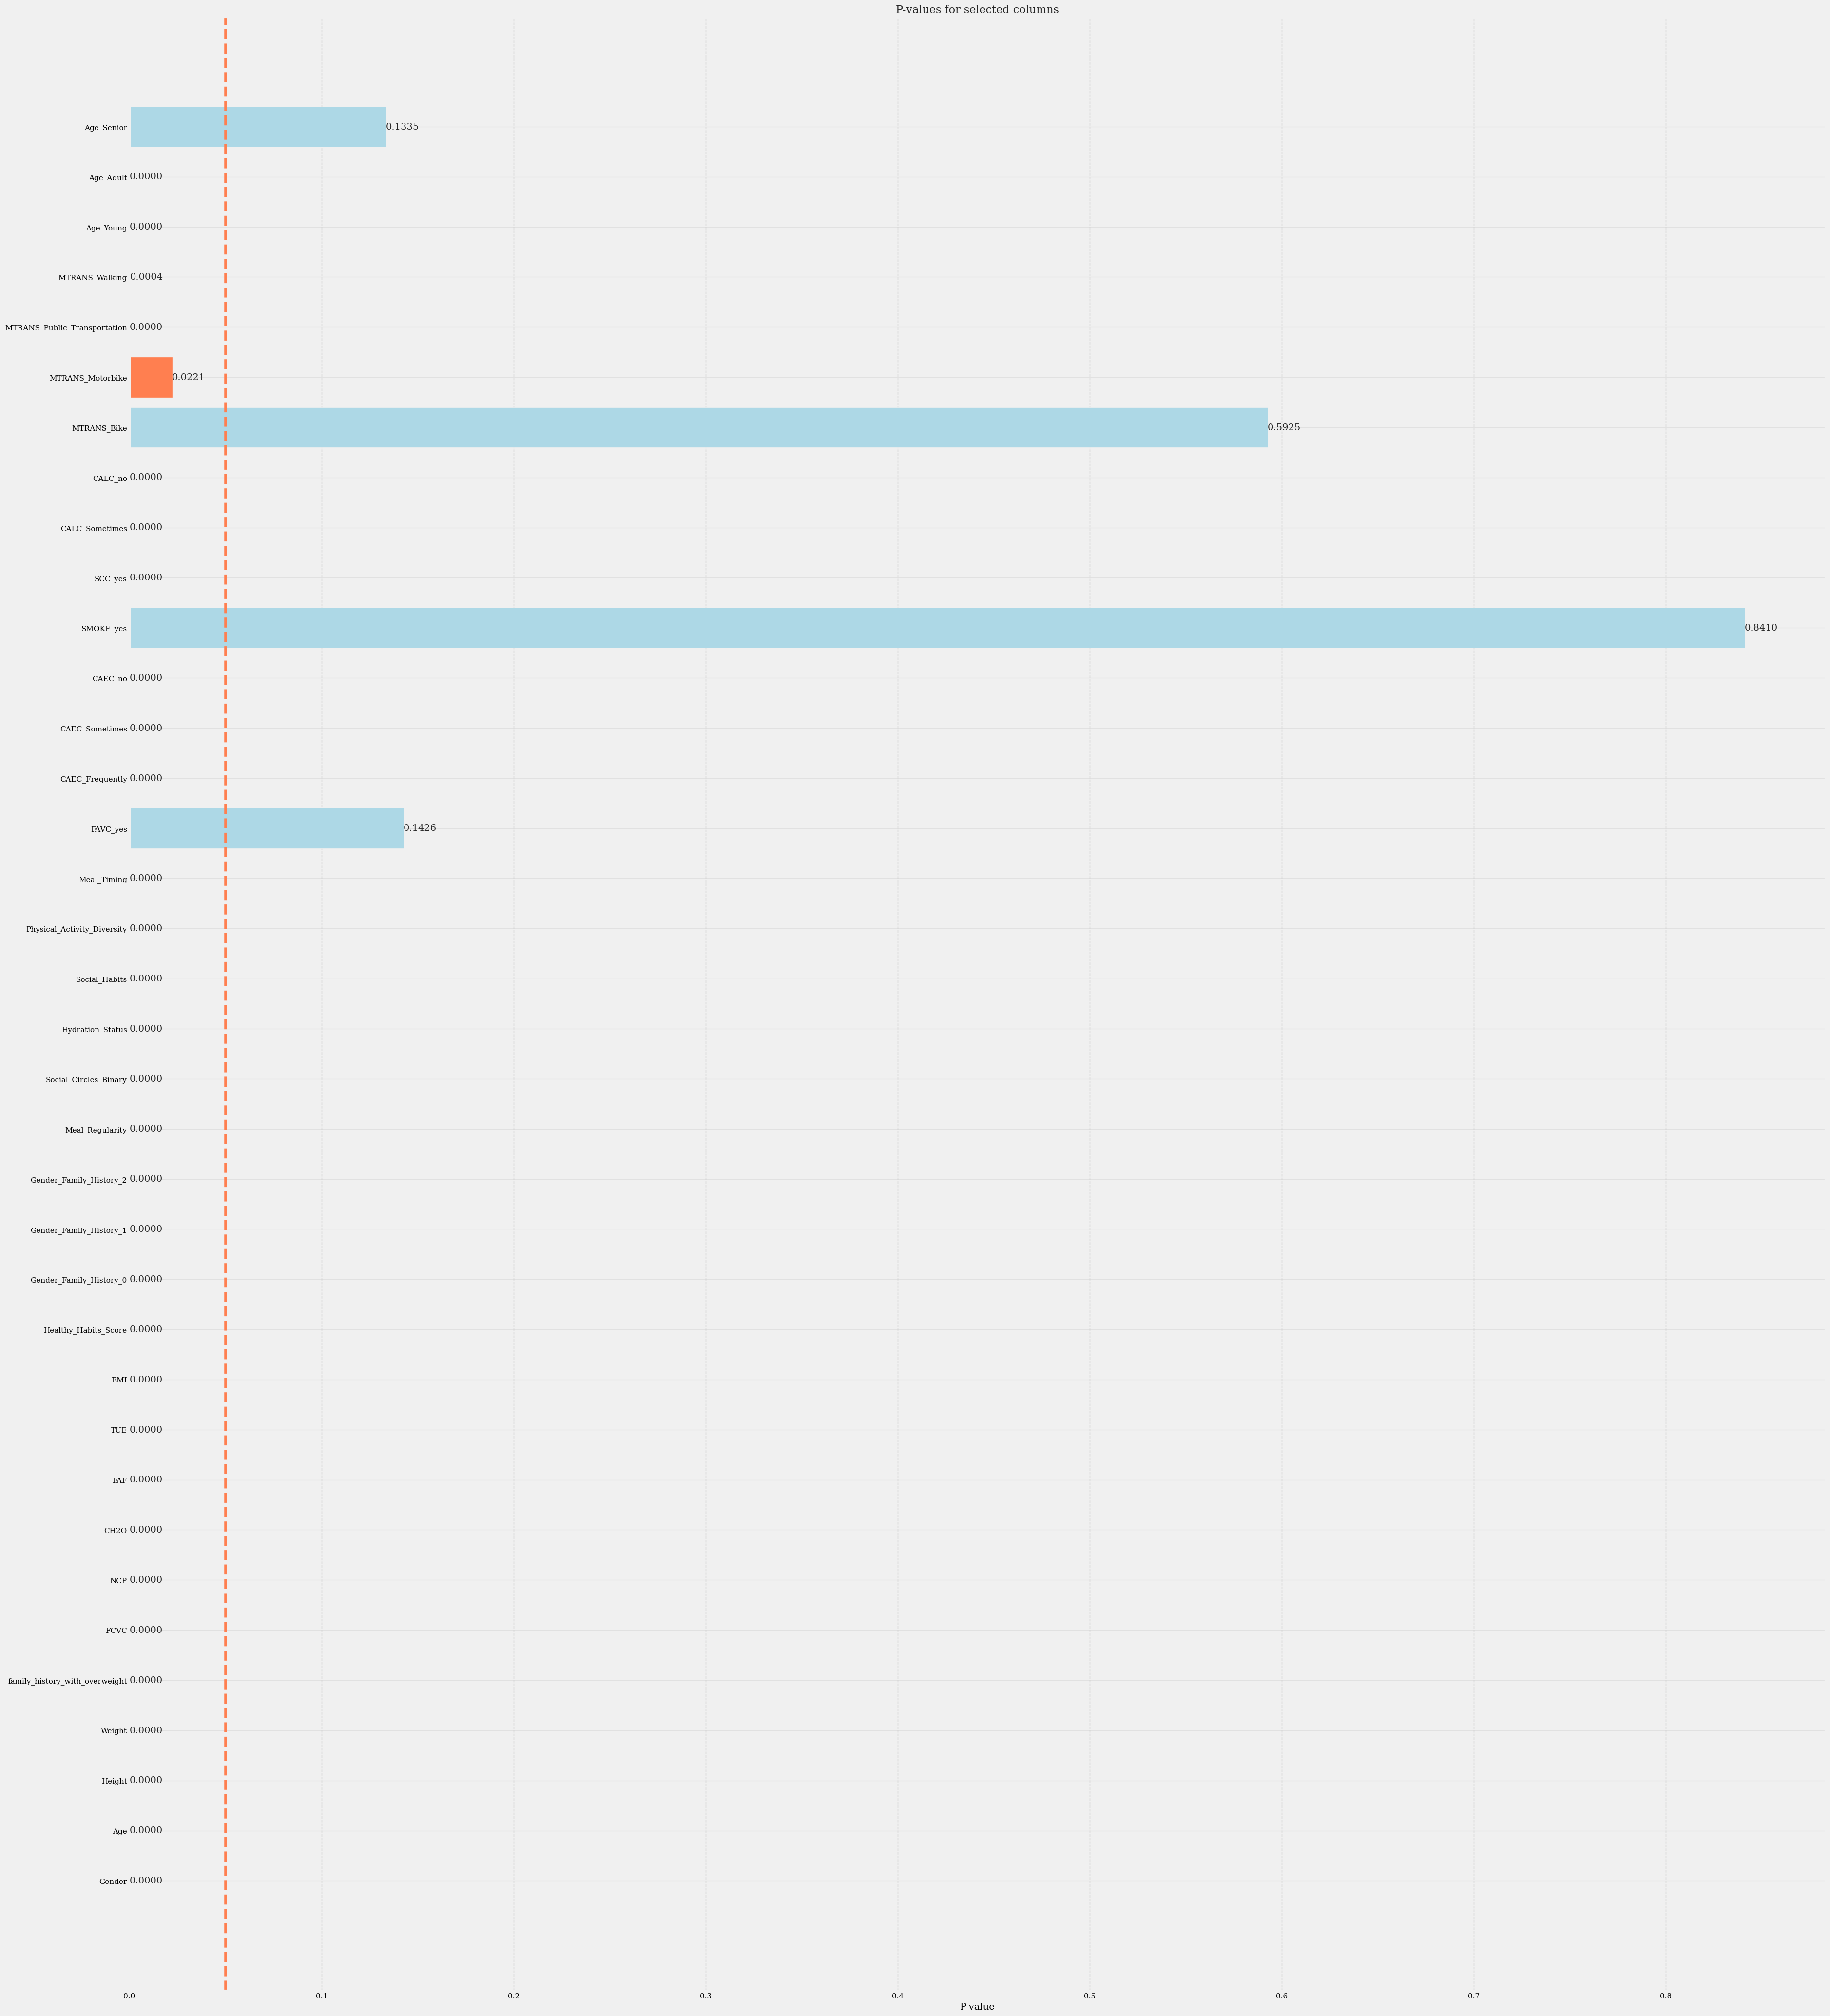

In [89]:
columns = []
p_values = []

#threshold alpha value is 
alpha = 0.05

for column in X.columns:
    x_selected = X[column]
    x_selected = sm.add_constant(x_selected)
    
    model = sm.OLS(Y,x_selected).fit()
    p_value = model.pvalues[column]
    columns.append(column)
    p_values.append(p_value)

#Visualization of p_values ....
plt.figure(figsize=(40,50))
bars = plt.barh(columns , p_values , color='lightblue')
plt.xlabel("P-value",fontsize = 14)
plt.title("P-values for selected columns",fontsize=16)
plt.grid(axis='x', linestyle='--', alpha = 0.6, color = 'darkgray')

#Adding aplha line also......
plt.axvline(x=alpha , color = 'coral', linestyle = '--', label = f'Alpha = {alpha}')

#Adding p_value on the bar 
for bar, p_value in zip(bars,p_values):
    plt.text(bar.get_width(),bar.get_y()+bar.get_height()/2, f'{p_value:.4f}', ha = 'left', va='center',fontsize = 14)
#Hightligiting those bars whose p_value is less than alpha (0.05)
significat_color = 'coral'
for bar, p_value in zip(bars,p_values):
    if p_value<alpha:
        bar.set_color(significat_color)


In [90]:
X.drop(columns=['Age_Senior','MTRANS_Bike','SMOKE_yes','FAVC_yes'],axis=1,inplace=True)
#x_val_scaled.drop(columns=['Age_Senior','MTRANS_Bike','SMOKE_yes','FAVC_yes'],axis=1,inplace=True)

test.drop(columns=['Age_Senior','MTRANS_Bike','SMOKE_yes','FAVC_yes'],axis=1,inplace=True)

In [91]:
train.drop(columns=['Age_Senior','MTRANS_Bike','SMOKE_yes','FAVC_yes'],axis=1,inplace=True)


In [92]:
class HypothesisTestingSelector(BaseEstimator, TransformerMixin):
    def __init__(self, significance_threshold=0.05):
        self.significance_threshold = significance_threshold
        self.selected_columns = None

    def fit(self, X, y):
        numeric_columns = X.select_dtypes(include=np.number).columns
        categorical_columns = X.select_dtypes(include='object').columns

        columns = []
        p_values = []

        # Convert y to a Series if it's a DataFrame
        y = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

        # Hypothesis testing for numeric columns (t-test)
        for column in numeric_columns:
            _, p_value = ttest_ind(X[column][y == 0], X[column][y == 1], nan_policy='omit')
            columns.append(column)
            p_values.append(p_value)

        # Hypothesis testing for categorical columns (chi-square test)
        for column in categorical_columns:
            contingency_table = pd.crosstab(X[column], y)
            _, p_value, _, _ = chi2_contingency(contingency_table)
            columns.append(column)
            p_values.append(p_value)

        # Select columns based on the significance threshold
        self.selected_columns = [col for col, p_value in zip(columns, p_values) if p_value < self.significance_threshold]

        return self

    def transform(self, X):
        return X[self.selected_columns].copy() if self.selected_columns else pd.DataFrame(index=X.index)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
      VARIANCE INFLUENCE FACTOR
</div>


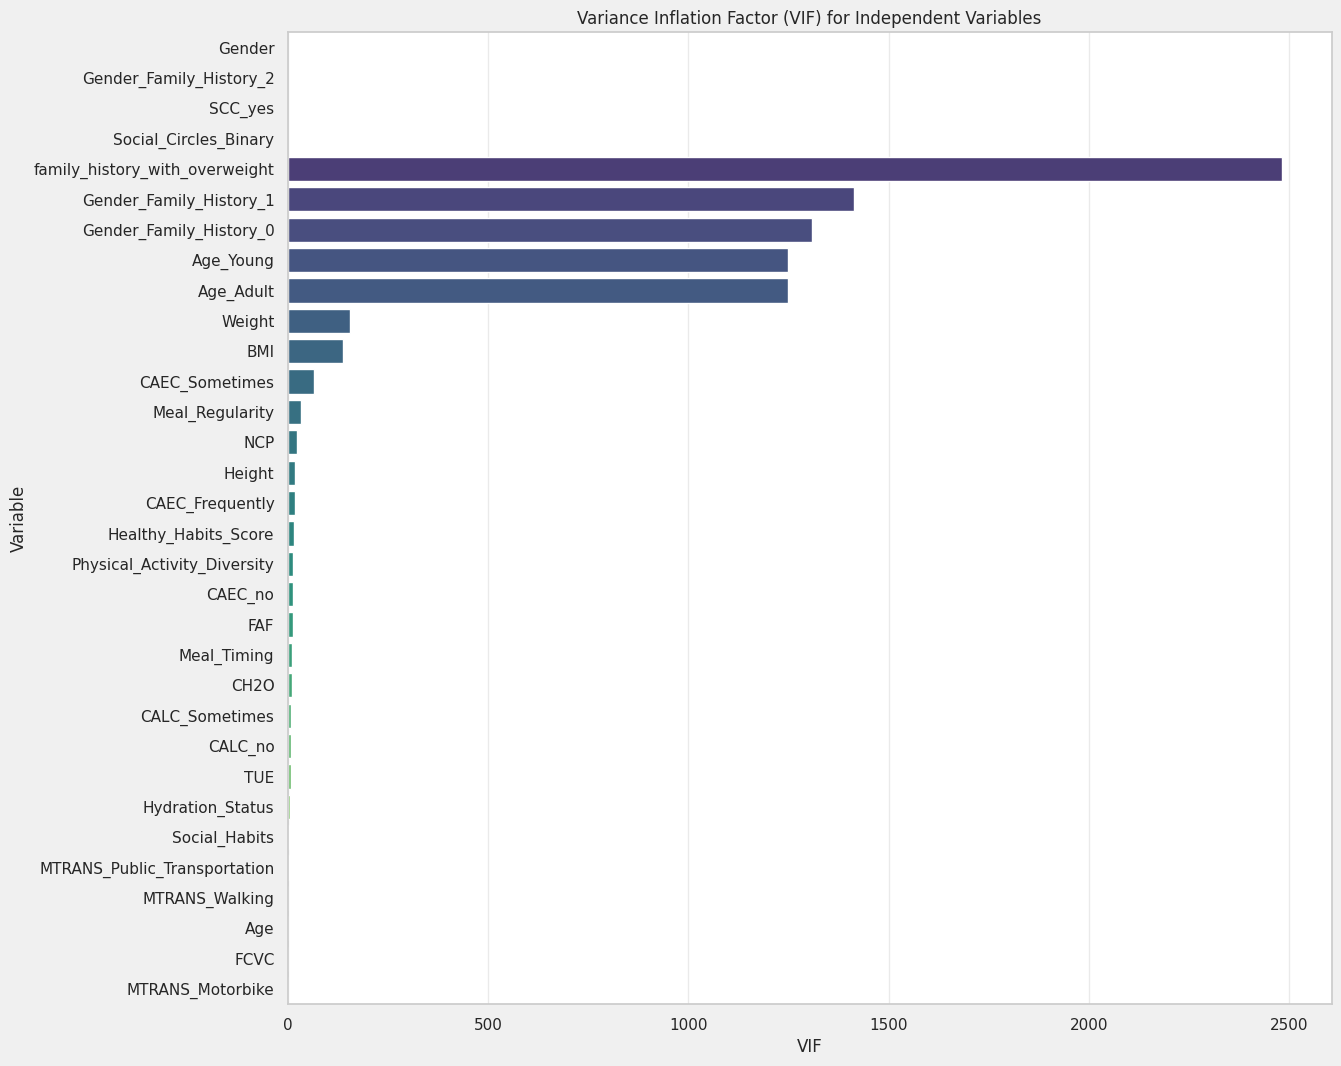

Variables with high VIF (> 5 ):
                          Variable          VIF
0                           Gender          inf
14         Gender_Family_History_2          inf
24                         SCC_yes          inf
16           Social_Circles_Binary          inf
4   family_history_with_overweight  2481.551110
13         Gender_Family_History_1  1412.426819
12         Gender_Family_History_0  1309.576126
30                       Age_Young  1249.522766
31                       Age_Adult  1249.123460
3                           Weight   155.794956
10                             BMI   137.925566
22                  CAEC_Sometimes    65.617281
15                 Meal_Regularity    34.237640
6                              NCP    24.023443
2                           Height    19.488102
21                 CAEC_Frequently    18.432374
11            Healthy_Habits_Score    15.559730
19     Physical_Activity_Diversity    14.518755
23                         CAEC_no    14.201672
8       

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your independent variables in a DataFrame 'x'
# You might need to add a constant for the intercept term if your model includes it
# x = sm.add_constant(x)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_height() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.show()

# Display high VIF variables
print("Variables with high VIF (>", vif_threshold, "):")
print(high_vif_variables)


In [94]:
"""high_vif_variables = [
    'Gender', 'Gender_Family_History_2', 'SCC_yes', 'Social_Circles_Binary',
    'family_history_with_overweight', 'Gender_Family_History_1', 'Gender_Family_History_0',
    'Age_Young', 'Age_Adult', 'Weight', 'BMI', 'CAEC_Sometimes', 'Meal_Regularity',
    'NCP', 'Height', 'CAEC_Frequently', 'Healthy_Habits_Score', 'Physical_Activity_Diversity',
    'CAEC_no', 'FAF', 'Meal_Timing', 'CH2O', 'CALC_Sometimes', 'CALC_no', 'TUE',
    'Hydration_Status'
]

selected_data = X[high_vif_variables]

correlation_matrix = selected_data.corr()
threshold = 0.8 
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

X = X.drop(to_drop, axis=1)
print("DataFrame after dropping highly correlated variables:")
X.head(5).style.background_gradient()"""

'high_vif_variables = [\n    \'Gender\', \'Gender_Family_History_2\', \'SCC_yes\', \'Social_Circles_Binary\',\n    \'family_history_with_overweight\', \'Gender_Family_History_1\', \'Gender_Family_History_0\',\n    \'Age_Young\', \'Age_Adult\', \'Weight\', \'BMI\', \'CAEC_Sometimes\', \'Meal_Regularity\',\n    \'NCP\', \'Height\', \'CAEC_Frequently\', \'Healthy_Habits_Score\', \'Physical_Activity_Diversity\',\n    \'CAEC_no\', \'FAF\', \'Meal_Timing\', \'CH2O\', \'CALC_Sometimes\', \'CALC_no\', \'TUE\',\n    \'Hydration_Status\'\n]\n\nselected_data = X[high_vif_variables]\n\ncorrelation_matrix = selected_data.corr()\nthreshold = 0.8 \nto_drop = set()\nfor i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n        if abs(correlation_matrix.iloc[i, j]) > threshold:\n            colname = correlation_matrix.columns[i]\n            to_drop.add(colname)\n\nX = X.drop(to_drop, axis=1)\nprint("DataFrame after dropping highly correlated variables:")\nX.head(5).style.backgroun

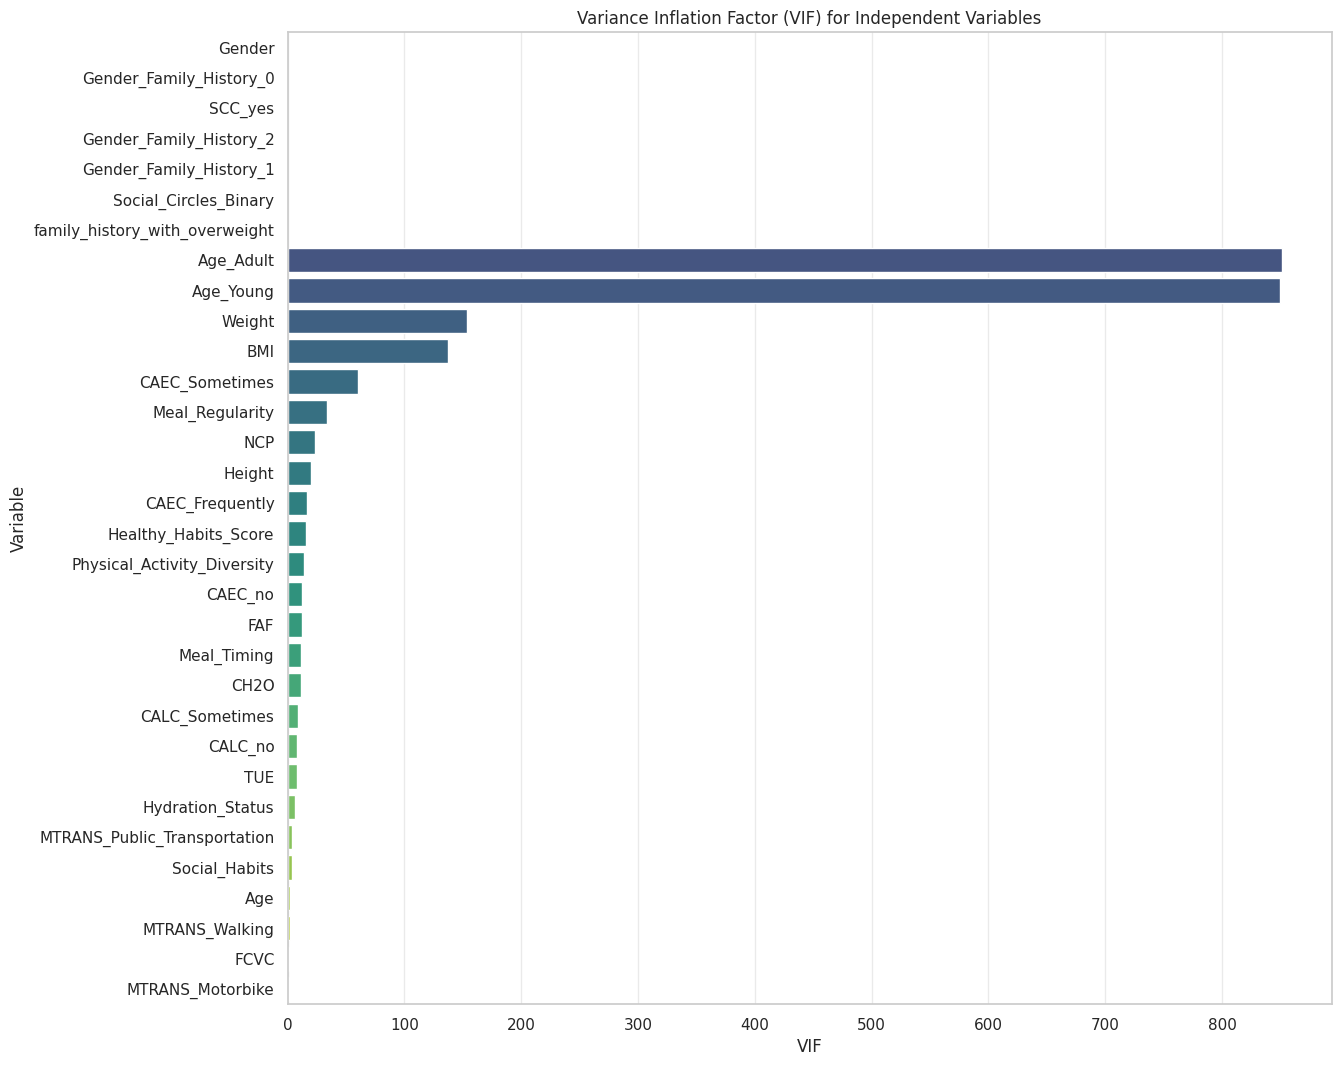

Variables with high VIF (> 5 ):
                          Variable          VIF
0                           Gender          inf
14         Gender_Family_History_2          inf
24                         SCC_yes          inf
16           Social_Circles_Binary          inf
4   family_history_with_overweight  2481.551110
13         Gender_Family_History_1  1412.426819
12         Gender_Family_History_0  1309.576126
30                       Age_Young  1249.522766
31                       Age_Adult  1249.123460
3                           Weight   155.794956
10                             BMI   137.925566
22                  CAEC_Sometimes    65.617281
15                 Meal_Regularity    34.237640
6                              NCP    24.023443
2                           Height    19.488102
21                 CAEC_Frequently    18.432374
11            Healthy_Habits_Score    15.559730
19     Physical_Activity_Diversity    14.518755
23                         CAEC_no    14.201672
8       

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your independent variables in a DataFrame 'x'
# You might need to add a constant for the intercept term if your model includes it
# x = sm.add_constant(x)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = test.columns
vif_data["VIF"] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables_2 = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_height() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.show()

# Display high VIF variables
print("Variables with high VIF (>", vif_threshold, "):")
print(high_vif_variables)


In [96]:
"""high_vif_variables = [
    'Gender', 'Gender_Family_History_2', 'SCC_yes', 'Social_Circles_Binary',
    'family_history_with_overweight', 'Gender_Family_History_1', 'Gender_Family_History_0',
    'Age_Young', 'Age_Adult', 'Weight', 'BMI', 'CAEC_Sometimes', 'Meal_Regularity',
    'NCP', 'Height', 'CAEC_Frequently', 'Healthy_Habits_Score', 'Physical_Activity_Diversity',
    'CAEC_no', 'FAF', 'Meal_Timing', 'CH2O', 'CALC_Sometimes', 'CALC_no', 'TUE',
    'Hydration_Status'
]

selected_data = test[high_vif_variables]

correlation_matrix = selected_data.corr()
threshold = 0.8 
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

test = test.drop(to_drop, axis=1)
print("DataFrame after dropping highly correlated variables:")
test.head(5).style.background_gradient()"""

'high_vif_variables = [\n    \'Gender\', \'Gender_Family_History_2\', \'SCC_yes\', \'Social_Circles_Binary\',\n    \'family_history_with_overweight\', \'Gender_Family_History_1\', \'Gender_Family_History_0\',\n    \'Age_Young\', \'Age_Adult\', \'Weight\', \'BMI\', \'CAEC_Sometimes\', \'Meal_Regularity\',\n    \'NCP\', \'Height\', \'CAEC_Frequently\', \'Healthy_Habits_Score\', \'Physical_Activity_Diversity\',\n    \'CAEC_no\', \'FAF\', \'Meal_Timing\', \'CH2O\', \'CALC_Sometimes\', \'CALC_no\', \'TUE\',\n    \'Hydration_Status\'\n]\n\nselected_data = test[high_vif_variables]\n\ncorrelation_matrix = selected_data.corr()\nthreshold = 0.8 \nto_drop = set()\nfor i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n        if abs(correlation_matrix.iloc[i, j]) > threshold:\n            colname = correlation_matrix.columns[i]\n            to_drop.add(colname)\n\ntest = test.drop(to_drop, axis=1)\nprint("DataFrame after dropping highly correlated variables:")\ntest.head(5).sty

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
      PIPELINE TO PREPROCESS THE FINAL TRAIN AND TEST DATA  
</div>


In [97]:
#categorical feature encoding
encoder  = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
    ])

encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [98]:
# final preprocessing pipeline 
preprocessor =Pipeline([
    #('creator', creator),
    ("encoder", encoder)
])

preprocessor

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])]))])

In [99]:
final_train=final_train.replace({'Insufficient_Weight': 0,
                           'Normal_Weight': 1,
                           'Obesity_Type_I': 2,
                           'Obesity_Type_II': 3,
                           'Obesity_Type_III': 4,
                           'Overweight_Level_I': 5,
                           'Overweight_Level_II': 6})

In [100]:
y_another = final_train['NObeyesdad']

final_train = final_train.drop(['NObeyesdad'], axis=1)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
      PRINCIPAL COMPONENT ANALYSIS 
</div>


In [101]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Assuming 'X' is your DataFrame with features
X_array = X.values

pca = PCA()
pca_result = pca.fit_transform(X_array)

# Set a threshold for explained variance (e.g., 95%)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.80

# Find the number of components needed to exceed the threshold
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Create a new DataFrame with principal components as columns
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
pca_df = pd.DataFrame(data=pca_result[:, :num_components], columns=pca_columns)

# Display the new DataFrame with principal components
print("DataFrame with Principal Components:")
print(pca_df)

# Visualize in 3D if there are at least 3 components
if num_components >= 3:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=colors, cmap='viridis', alpha=0.5)
    ax.set_title('PCA Result (3D) with Different Colors')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    colorbar.set_label('Target Category')

    plt.show()
else:
    print("Number of components is less than 3, unable to visualize in 3D.")


DataFrame with Principal Components:
                 PC1
0      -19822.769286
1      -68197.509643
2     -131151.358924
3      146139.567085
4      -46426.907106
...              ...
20753   63452.418901
20754 -131425.632879
20755   16479.988285
20756  -13421.486109
20757   55583.154313

[20758 rows x 1 columns]
Number of components is less than 3, unable to visualize in 3D.


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    SPLIT THE DATA INTO (x_train_scaled,x_val_scaled) AND (y_train,y_val) -- On Scaled Data
</div>


In [102]:
from sklearn.model_selection import train_test_split

In [103]:

x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    SPLIT THE DATA INTO (x_train_scaled,x_val_scaled) AND (y_train,y_val) -- Non Scaled Data
</div>


In [104]:
x_train, x_val, y_train, y_val = train_test_split(train, Y, test_size=0.2, random_state=42)

In [105]:
Xg_train, Xg_test, yg_train, yg_test = train_test_split(final_train, y_another, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y_another)


print(Xg_train.shape, Xg_test.shape)

(18276, 16) (4569, 16)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       DEFAULT MODEL TRAINING AND EVALUATING FUNCTION
</div>


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information about train_and_evaluate_model function :</b> 
    
1. Pass different different model for testing.
    
2. Predict the value and probability as well

3. Calulate the accuracy score, confusion matrix, classification report, cv score, roc score 
</div>

In [106]:
from sklearn.utils.validation import check_is_fitted
from sklearn.base import clone
from joblib import Parallel, delayed
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import lightgbm as lgb

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    if isinstance(model, VotingClassifier):
        # Specify cat_features for CatBoost models in the VotingClassifier
        cat_features = X_train.select_dtypes(include=['category']).columns.tolist()

        # Fit the CatBoost models individually
        catboost_models = []
        for base_model in model.estimators:
            # Skip cloning for non-sklearn estimators
            if isinstance(base_model, tuple):
                # Extract the actual model from the tuple
                base_model_name, base_model_instance = base_model
                cat_model = base_model_instance

                # Check if the model is a CatBoost model
                if isinstance(cat_model, CatBoostClassifier):
                    # Ensure 'AgeCat' is in the cat_features list
                    cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
                    #if 'AgeCat' not in cat_features:
                        #cat_features.append('AgeCat')

                    # Modify the cat_model to include 'AgeCat' in the cat_features list
                    cat_model.set_params(cat_features=cat_features)

                    cat_model.fit(X_train, y_train, verbose=0)
                else:
                    # Handle other types of models (excluding XGBClassifier for now)
                    cat_model.fit(X_train, y_train)

            else:
                # The base model is not a tuple, which means it wasn't modified
                cat_model = base_model

            catboost_models.append(cat_model)

        # Update the fitted models in the VotingClassifier
        model.estimators_ = catboost_models

    else:
        # For other models, use the existing logic
        if isinstance(model, CatBoostClassifier):
            # Ensure 'AgeCat' is in the cat_features list
            cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
            #if 'AgeCat' not in cat_features:
                #cat_features.append('AgeCat')

            model.set_params(cat_features=cat_features)
            model.fit(X_train, y_train, verbose=0)
        elif isinstance(model, AdaBoostClassifier):
            model.fit(X_train, y_train)
        elif isinstance(model, lgb.LGBMClassifier):
            model.set_params(objective='binary')
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train)

    # Make predictions and predict probabilities
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)

    # Plot feature importance based on the model type
    if isinstance(model, lgb.LGBMClassifier):
        lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(10, 6))
    elif hasattr(model, 'get_feature_importance'):  # Check if the model has get_feature_importance method
        feature_importance = model.get_feature_importance()
        features = X_train.columns
        feature_importance_dict = dict(zip(features, feature_importance))

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importance_dict)), list(feature_importance_dict.values()), align='center')
        plt.yticks(range(len(feature_importance_dict)), list(feature_importance_dict.keys()))
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('CatBoost Feature Importance')
        plt.show()

    print("=========================================================================================================")

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy * 100:.3f}")

    print("=========================================================================================================")

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("=========================================================================================================")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    print("=========================================================================================================")

    # ROC curve and AUC
    if len(np.unique(y_train)) > 2:
        y_val_bin = label_binarize(y_val, classes=model.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        for i in range(len(model.classes_)):
            plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")

        print("=========================================================================================================")

        # Precision-Recall curve and AUC
        precision = dict()
        recall = dict()
        pr_auc = dict()
        for i in range(len(model.classes_)):
            precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_prob[:, i])
            pr_auc[i] = auc(recall[i], precision[i])

        # Plot Precision-Recall curve
        plt.subplot(1, 2, 2)
        for i in range(len(model.classes_)):
            plt.plot(recall[i], precision[i], lw=2, label=f'Class {model.classes_[i]} (AUC = {pr_auc[i]:.2f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")

    # Cross-validation scores
    if isinstance(model, CatBoostClassifier):
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', fit_params={'cat_features': cat_features})
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("=========================================================================================================")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

    plt.tight_layout()
    plt.show()

In [107]:
from sklearn.utils.validation import check_is_fitted
from sklearn.base import clone
from joblib import Parallel, delayed
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

def train_and_evaluate_model_2(model, X_train, y_train, X_val, y_val):
    # Label encode the target variable
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)

    if isinstance(model, VotingClassifier):
        # Specify cat_features for CatBoost models in the VotingClassifier
        cat_features = X_train.select_dtypes(include=['category']).columns.tolist()

        # Fit the CatBoost models individually
        catboost_models = []
        for base_model in model.estimators:
            # Skip cloning for non-sklearn estimators
            if isinstance(base_model, tuple):
                # Extract the actual model from the tuple
                base_model_name, base_model_instance = base_model
                cat_model = base_model_instance

                # Check if the model is a CatBoost model
                if isinstance(cat_model, CatBoostClassifier):
                    # Ensure 'AgeCat' is in the cat_features list
                    cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
                    cat_model.set_params(cat_features=cat_features)

                    cat_model.fit(X_train, y_train_encoded, verbose=0)
                else:
                    # Handle other types of models (excluding XGBClassifier for now)
                    cat_model.fit(X_train, y_train_encoded)

            else:
                # The base model is not a tuple, which means it wasn't modified
                cat_model = base_model

            catboost_models.append(cat_model)

        # Update the fitted models in the VotingClassifier
        model.estimators_ = catboost_models

    else:
        # For other models, use the existing logic
        if isinstance(model, CatBoostClassifier):
            # Ensure 'AgeCat' is in the cat_features list
            cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
            model.set_params(cat_features=cat_features)
            model.fit(X_train, y_train_encoded, verbose=0)
        elif isinstance(model, AdaBoostClassifier):
            model.fit(X_train, y_train_encoded)
        elif isinstance(model, lgb.LGBMClassifier):
            model.set_params(objective='binary')
            model.fit(X_train, y_train_encoded)
        else:
            model.fit(X_train, y_train_encoded)

    # Make predictions and predict probabilities
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)

    # Inverse transform the label encoding
    y_pred = label_encoder.inverse_transform(y_pred)

    # Plot feature importance based on the model type
    if isinstance(model, lgb.LGBMClassifier):
        lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(10, 6))
    elif hasattr(model, 'get_feature_importance'):  # Check if the model has get_feature_importance method
        feature_importance = model.get_feature_importance()
        features = X_train.columns
        feature_importance_dict = dict(zip(features, feature_importance))

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importance_dict)), list(feature_importance_dict.values()), align='center')
        plt.yticks(range(len(feature_importance_dict)), list(feature_importance_dict.keys()))
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('CatBoost Feature Importance')
        plt.show()

    print("=========================================================================================================")

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy * 100:.3f}")

    print("=========================================================================================================")

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("=========================================================================================================")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    print("=========================================================================================================")

    # ROC curve and AUC
    if len(np.unique(y_train)) > 2:
        y_val_bin = label_binarize(y_val, classes=label_encoder.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(label_encoder.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        for i in range(len(label_encoder.classes_)):
            plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")

        print("=========================================================================================================")

        # Precision-Recall curve and AUC
        precision = dict()
        recall = dict()
        pr_auc = dict()
        for i in range(len(label_encoder.classes_)):
            precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_prob[:, i])
            pr_auc[i] = auc(recall[i], precision[i])

        # Plot Precision-Recall curve
        plt.subplot(1, 2, 2)
        for i in range(len(label_encoder.classes_)):
            plt.plot(recall[i], precision[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {pr_auc[i]:.2f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")

    # Cross-validation scores
    if isinstance(model, CatBoostClassifier):
        cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy', fit_params={'cat_features': cat_features})
    else:
        cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
    print("=========================================================================================================")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f}")

    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: skyblue;">
<b>🔍 Information about all pipeline used below :</b> 
    
1. Pass different different model for training.
    
2. Use SimpleImputer, StandardScaler, Onehotencoding,Hypothesis testing, PCA,VIF

</div>

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       SVM CLASSIFIER PIPELINE
</div>


In [108]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = object)),
    ],
    remainder = 'passthrough'
)

pipeline_svm = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor), 
    ('classifier',SVC(kernel = 'linear',probability=True))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for SVM is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       GAUSSIAN-NB CLASSIFIER PIPELINE
</div>


In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = object)),
    ],
    remainder = 'passthrough'
)

pipeline_gaussian_nb = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor),
    ('classifier',GaussianNB())
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for GAUSSIAN-NB is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       DECISION TREE CLASSIFIER PIPELINE
</div>


In [110]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = object)),
    ],
    remainder = 'passthrough'
)

pipeline_tree = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(criterion='gini'))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for DECISION TREE is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       KNN CLASSIFIER PIPELINE
</div>


In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = object)),
    ],
    remainder = 'passthrough'
)

pipeline_KNN = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor), 
    ('classifier',KNeighborsClassifier(n_neighbors=6))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for KNN is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       XGBOOST CLASSIFIER PIPELINE
</div>


In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), make_column_selector(dtype_include=np.number)),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), make_column_selector(dtype_include=object)),
    ],
    remainder='passthrough'
)

pipeline_xgb = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        subsample=0.7,
        reg_lambda=0,
        reg_alpha=0.4,
        n_estimators=200,
        min_child_weight=1,
        max_depth=5,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=0.9
    ))
])


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for XGBOOST is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       LGBM CLASSIFIER PIPELINE
</div>


In [113]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), make_column_selector(dtype_include=np.number)),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), make_column_selector(dtype_include='object')),
    ],
    remainder='passthrough'
)

pipeline_lgbm = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(objective='multiclass', random_state=42))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for LGBM is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       CATBOOST CLASSIFIER PIPELINE
</div>


In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = 'object')),
    ],
    remainder = 'passthrough'
)

pipeline_CatBoost = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor), 
    ('classifier',CatBoostClassifier(
        eval_metric='MultiClass',
        learning_rate=0.022,
        iterations=1000,
        depth=6,
        l2_leaf_reg=3,
        border_count=128,
        random_seed=42))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for CATBOOST is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       AdaBOOST CLASSIFIER PIPELINE
</div>


In [115]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = 'object')),
    ],
    remainder = 'passthrough'
)

pipeline_AdaBoost = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor), 
    ('classifier',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for ADABOOST is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       HISTBOOST CLASSIFIER PIPELINE
</div>


In [116]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = 'object')),
    ],
    remainder = 'passthrough'
)

pipeline_Histboost = Pipeline([
    ('selector',HypothesisTestingSelector()),
    ('preprocessor',preprocessor),  
    ('classifier',HistGradientBoostingClassifier())
])

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for HISTBOOST is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       VOTING CLASSIFIER PIPELINE
</div>


In [117]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline([
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),make_column_selector(dtype_include=np.number)),
        ('cat',Pipeline([
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder(handle_unknown='ignore'))
        ]),make_column_selector(dtype_include = 'object')),
    ],
    remainder = 'passthrough'
)

clf1 = XGBClassifier(
    objective='multi:softmax',
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    enable_categorical=True
)

clf2 = CatBoostClassifier(
    eval_metric='MultiClass',
    learning_rate=0.022,
    iterations=1000,
    depth=6,
    l2_leaf_reg=3,
    border_count=128,
    random_seed=42
)

clf3 = LGBMClassifier(
    objective='multiclass',
    boosting_type='gbdt',
    metric='multi_logloss',  
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    n_estimators=1000,
    random_state=42
)

classifiers = [('Xgboost', clf1), ('Catboost', clf2), ('LgbmBoost', clf3)]

voting_classifiers = [(name, clone(clf)) for name, clf in classifiers]

voting_classifier = VotingClassifier(estimators=voting_classifiers, voting='soft')

pipeline_voting = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', voting_classifier)
])
"""pipeline_voting = Pipeline([
    ('selector', HypothesisTestingSelector()),
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=[
        ('Xgboost', clf1),
        ('Catboost', clf2),
        ('LgbmBoost', clf3)
    ], voting='soft'))
])"""


"pipeline_voting = Pipeline([\n    ('selector', HypothesisTestingSelector()),\n    ('preprocessor', preprocessor),\n    ('classifier', VotingClassifier(estimators=[\n        ('Xgboost', clf1),\n        ('Catboost', clf2),\n        ('LgbmBoost', clf3)\n    ], voting='soft'))\n])"

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Pipeline:</b> Pipeline for VOTING CLASSIFIER is Successfully Created
</div>


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       STRATIFIED_K_FOLD CATBOOST MODEL
</div>


In [118]:
USE_DATA_LEAK='Y' 
RAND_VAL=42
num_folds=5 
n_est=3500 

In [119]:
from scipy.interpolate import interp1d

RAND_VAL = 42  


def train_and_evaluate_catboost(X, y, test, num_folds=5, n_est=1000, cat_features=None):
    if cat_features is None:
        cat_features = X.select_dtypes(include=['category']).columns.tolist()

    folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
    test_preds = np.empty((num_folds, len(test)))
    auc_vals = []
    fpr_list, tpr_list = [], []
    plt.figure(figsize=(10, 6))

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[valid_idx], y.iloc[valid_idx]

        train_pool = Pool(X_train, y_train, cat_features=cat_features)
        val_pool = Pool(X_val, y_val, cat_features=cat_features)

        catboost_params = {
            'eval_metric': 'AUC',
            'learning_rate': 0.022,
            'iterations': n_est,
            'depth': 6, 
            'l2_leaf_reg': 3,  
            'border_count': 128,  
            'early_stopping_rounds': 50,  
            'random_seed': RAND_VAL
        }

        Straitfied_Catboost = CatBoostClassifier(**catboost_params)
        Straitfied_Catboost.fit(train_pool, eval_set=val_pool, verbose=300)

        # Evaluate on validation set
        y_pred_val = Straitfied_Catboost.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, y_pred_val)
        print(f"AUC for fold {n_fold}: {auc_val}")
        auc_vals.append(auc_val)

        # Plot ROC curve for each fold
        fpr, tpr, _ = roc_curve(y_val, y_pred_val)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        plt.plot(fpr, tpr, label=f'Fold {n_fold}')

        # Make predictions on the test set
        y_pred_test = Straitfied_Catboost.predict_proba(test)[:, 1]
        test_preds[n_fold, :] = y_pred_test
        print("----------------")

    # Plot average ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([interp1d(fpr, tpr)(mean_fpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
    plt.plot(mean_fpr, mean_tpr, label='Mean ROC', color='orange', linestyle='--')

    # Customize plot
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Fold and Mean ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot AUC distribution
    plt.figure(figsize=(8, 6))
    sns.boxplot(auc_vals, width=0.3)
    plt.xlabel('AUC Values')
    plt.title('AUC Distribution Across Folds')
    plt.show()

    return test_preds.mean(axis=0)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       TRINING BY ALL PIPELINE AND WITH RANDOMISED SEARCH CV
</div>


In [120]:
import optuna

In [121]:
""" 
def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'num_class': 7,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.4),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.4),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.4),
    }

    xgb_model = XGBClassifier(**params, random_state=42)

    xgb_model.fit(x_train_scaled, y_train)
    y_pred = xgb_model.predict(x_val_scaled)
    
    accuracy = accuracy_score(y_val,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Parameters:")
print(best_params)"""

' \ndef objective(trial):\n    params = {\n        \'objective\': \'multi:softmax\',\n        \'num_class\': 7,\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 1500),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 0.3),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 3, 9),\n        \'subsample\': trial.suggest_float(\'subsample\', 0.7, 1.0),\n        \'gamma\': trial.suggest_float(\'gamma\', 0, 0.4),\n        \'reg_alpha\': trial.suggest_float(\'reg_alpha\', 0, 0.4),\n        \'reg_lambda\': trial.suggest_float(\'reg_lambda\', 0, 0.4),\n    }\n\n    xgb_model = XGBClassifier(**params, random_state=42)\n\n    xgb_model.fit(x_train_scaled, y_train)\n    y_pred = xgb_model.predict(x_val_scaled)\n    \n    accuracy = accuracy_score(y_val,y_pred)\n    return accuracy\n\nstudy = optuna.create_study(direction=\'maximize\')\nstudy.optimize(objective, n_trials=100)\n\nbest_params = study.best_params\nprint("Best Parameters:")\nprint(best_p

In [122]:
#best_model_xg = XGBClassifier(objective='multi:softmax', num_class=7, **best_params)
#train_and_evaluate_model(best_model_xg, x_train_scaled, y_train, x_val_scaled, y_val)

In [123]:
#from xgboost import plot_importance
#plot_importance(best_model_xg)
#plt.show()

Accuracy: 65.414
Confusion Matrix:
[[489  22   2   0   8   3   0]
 [138 360  24   2  50  23  29]
 [  2   3 219 267  11   7  34]
 [  0   0   2 648   0   0   7]
 [  0   0   2   1 800   1   0]
 [  2  92 137  55   9 118  71]
 [  0  28 132 247   9  16  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       524
           1       0.71      0.58      0.64       626
           2       0.42      0.40      0.41       543
           3       0.53      0.99      0.69       657
           4       0.90      1.00      0.95       804
           5       0.70      0.24      0.36       484
           6       0.37      0.16      0.22       514

    accuracy                           0.65      4152
   macro avg       0.63      0.61      0.59      4152
weighted avg       0.65      0.65      0.62      4152

Cross-Validation Scores: [0.65743528 0.65100873 0.64890093 0.61126167 0.65823547]
Mean CV Accuracy: 0.65 (+/- 0.02)


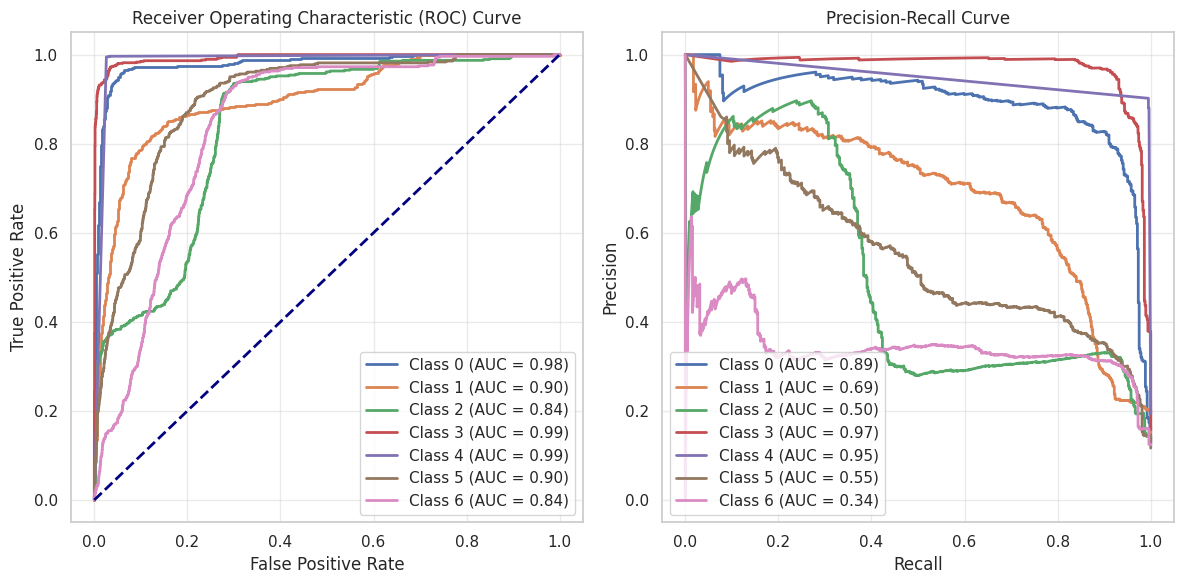

In [124]:
train_and_evaluate_model(pipeline_gaussian_nb,x_train_scaled,y_train,x_val_scaled,y_val)

In [125]:
#train_and_evaluate_model(pipeline_xgb,x_train_scaled,y_train,x_val_scaled,y_val)

Accuracy: 79.672
Confusion Matrix:
[[454  62   0   0   0   6   2]
 [ 75 476   5   1   0  55  14]
 [  4   9 423  22   3  34  48]
 [  0   1  20 625   0   4   7]
 [  0   0   0   1 801   1   1]
 [ 17 110  28   0   0 244  85]
 [  3  58  68  16   0  84 285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       524
           1       0.66      0.76      0.71       626
           2       0.78      0.78      0.78       543
           3       0.94      0.95      0.95       657
           4       1.00      1.00      1.00       804
           5       0.57      0.50      0.54       484
           6       0.64      0.55      0.60       514

    accuracy                           0.80      4152
   macro avg       0.77      0.77      0.77      4152
weighted avg       0.79      0.80      0.79      4152

Cross-Validation Scores: [0.79349789 0.78982234 0.78620897 0.77838001 0.80096357]
Mean CV Accuracy: 0.79 (+/- 0.01)


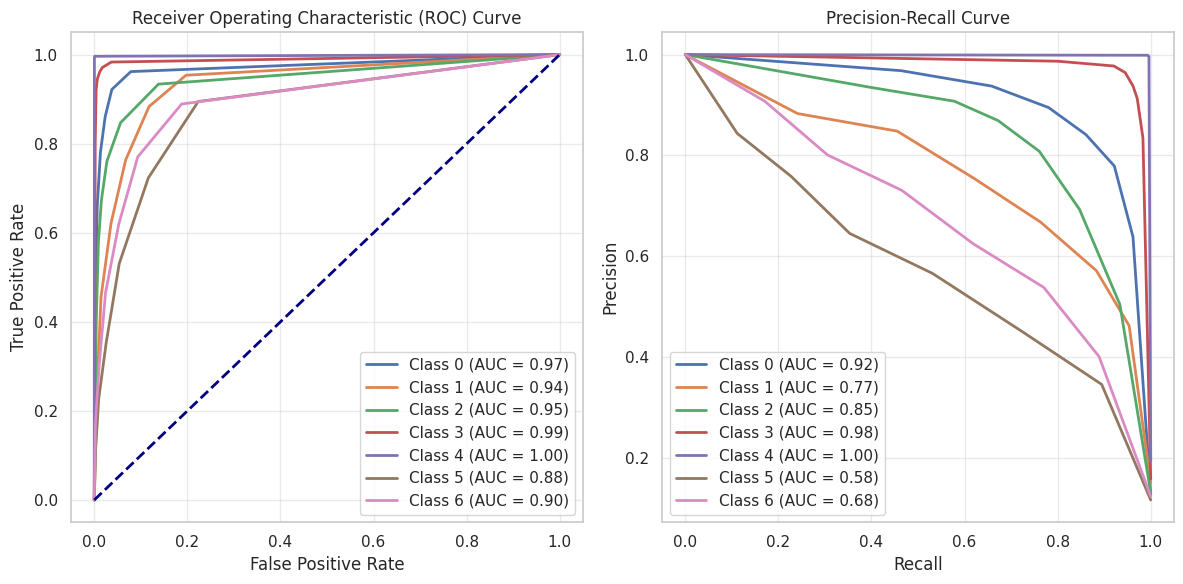

In [126]:
train_and_evaluate_model(pipeline_KNN,x_train_scaled,y_train,x_val_scaled,y_val)

In [127]:
"""def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
        'base_estimator__max_depth': trial.suggest_int('base_estimator__max_depth', 1, 10),
        'base_estimator__min_samples_split': trial.suggest_int('base_estimator__min_samples_split', 2, 20),
        'base_estimator__min_samples_leaf': trial.suggest_int('base_estimator__min_samples_leaf', 1, 10),
    }

    base_estimator = DecisionTreeClassifier(max_depth=params['base_estimator__max_depth'],
                                            min_samples_split=params['base_estimator__min_samples_split'],
                                            min_samples_leaf=params['base_estimator__min_samples_leaf'])
    del params['base_estimator__max_depth']
    del params['base_estimator__min_samples_split']
    del params['base_estimator__min_samples_leaf']

    adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, **params, random_state=42)

    adaboost_model.fit(x_train_scaled, y_train)
    y_pred = adaboost_model.predict(x_val_scaled)
    
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

best_params_adaboost = study.best_params
print("Best Parameters for AdaBoost:")
print(best_params_adaboost)"""

'def objective(trial):\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 1500),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 1.0),\n        \'algorithm\': trial.suggest_categorical(\'algorithm\', [\'SAMME\', \'SAMME.R\']),\n        \'base_estimator__max_depth\': trial.suggest_int(\'base_estimator__max_depth\', 1, 10),\n        \'base_estimator__min_samples_split\': trial.suggest_int(\'base_estimator__min_samples_split\', 2, 20),\n        \'base_estimator__min_samples_leaf\': trial.suggest_int(\'base_estimator__min_samples_leaf\', 1, 10),\n    }\n\n    base_estimator = DecisionTreeClassifier(max_depth=params[\'base_estimator__max_depth\'],\n                                            min_samples_split=params[\'base_estimator__min_samples_split\'],\n                                            min_samples_leaf=params[\'base_estimator__min_samples_leaf\'])\n    del params[\'base_estimator__max_depth\']\n    del params[\'base_est

In [128]:
#base_estimator = DecisionTreeClassifier(max_depth=best_params['base_estimator__max_depth'])
#del best_params['base_estimator__max_depth']

#best_model_adaboost = AdaBoostClassifier(base_estimator=base_estimator, **best_params_adaboost, random_state=42)
#train_and_evaluate_model(best_model_adaboost, x_train_scaled, y_train, x_val_scaled, y_val)

In [129]:
"""def objective(trial):
    params = {
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'l2_regularization': trial.suggest_float('l2_regularization', 0, 0.5),
        'max_bins': trial.suggest_int('max_bins', 10, 255),
        'random_state': 42,
    }

    histboost_model = HistGradientBoostingClassifier(**params)

    histboost_model.fit(x_train_scaled, y_train)
    y_pred = histboost_model.predict(x_val_scaled)
    
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params_histboost = study.best_params
print("Best Parameters for HistGradientBoostingClassifier:")
print(best_params_histboost)"""

'def objective(trial):\n    params = {\n        \'max_iter\': trial.suggest_int(\'max_iter\', 100, 1000),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 0.5),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 3, 12),\n        \'min_samples_leaf\': trial.suggest_int(\'min_samples_leaf\', 1, 10),\n        \'l2_regularization\': trial.suggest_float(\'l2_regularization\', 0, 0.5),\n        \'max_bins\': trial.suggest_int(\'max_bins\', 10, 255),\n        \'random_state\': 42,\n    }\n\n    histboost_model = HistGradientBoostingClassifier(**params)\n\n    histboost_model.fit(x_train_scaled, y_train)\n    y_pred = histboost_model.predict(x_val_scaled)\n    \n    accuracy = accuracy_score(y_val, y_pred)\n    return accuracy\n\nstudy = optuna.create_study(direction=\'maximize\')\nstudy.optimize(objective, n_trials=100)\n\nbest_params_histboost = study.best_params\nprint("Best Parameters for HistGradientBoostingClassifier:")\nprint(best_params_histboost)'

In [130]:
hist_params = {
    'max_iter': 737,
    'learning_rate': 0.11435825707668429,
    'max_depth': 4,
    'min_samples_leaf': 6,
    'l2_regularization': 0.08958656702493381,
    'max_bins': 204
}


Accuracy: 90.366
Confusion Matrix:
[[488  33   0   0   0   2   1]
 [ 26 562   0   0   0  35   3]
 [  2   1 474  11   1  16  38]
 [  0   0  13 638   3   0   3]
 [  0   0   0   1 802   1   0]
 [  1  41   9   0   0 377  56]
 [  0  11  29   4   0  59 411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       524
           1       0.87      0.90      0.88       626
           2       0.90      0.87      0.89       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.78      0.77       484
           6       0.80      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Cross-Validation Scores: [0.89193257 0.90213791 0.88979223 0.90033123 0.91207468]
Mean CV Accuracy: 0.90 (+/- 0.01)


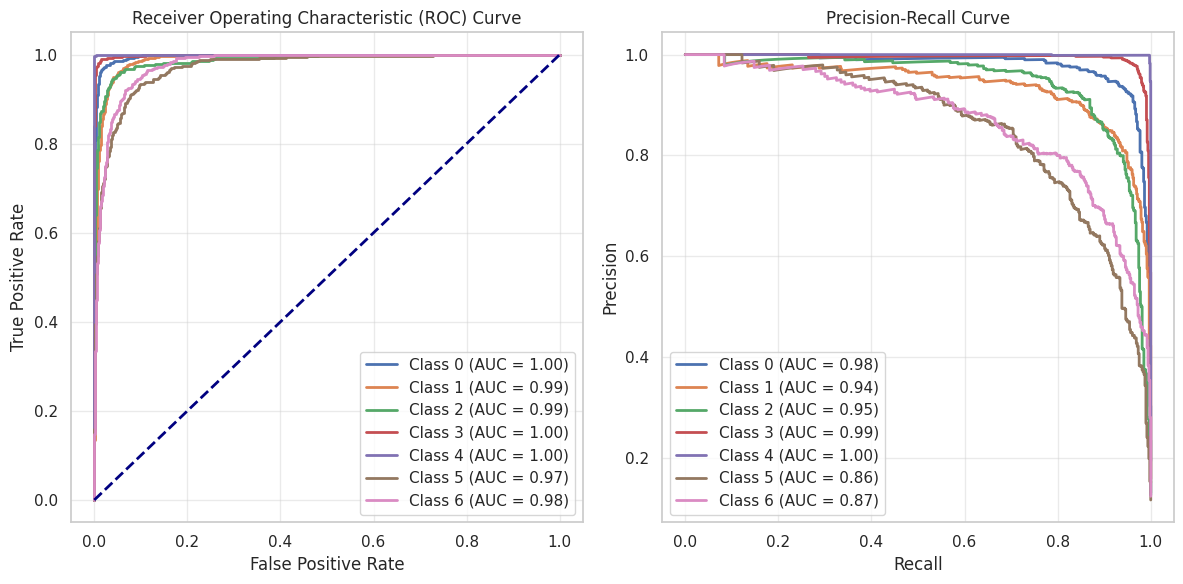

In [131]:
best_model_histboost = HistGradientBoostingClassifier(**hist_params,random_state=42)
train_and_evaluate_model(best_model_histboost,x_train_scaled,y_train,x_val_scaled,y_val)

Accuracy: 83.863
Confusion Matrix:
[[468  51   1   0   2   1   1]
 [ 47 490   1   0   0  76  12]
 [  1   3 436  22   4  19  58]
 [  0   0  32 614   3   0   8]
 [  0   0   3   1 799   0   1]
 [  4  52  22   4   0 320  82]
 [  0  11  64   7   0  77 355]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       524
           1       0.81      0.78      0.79       626
           2       0.78      0.80      0.79       543
           3       0.95      0.93      0.94       657
           4       0.99      0.99      0.99       804
           5       0.65      0.66      0.66       484
           6       0.69      0.69      0.69       514

    accuracy                           0.84      4152
   macro avg       0.82      0.82      0.82      4152
weighted avg       0.84      0.84      0.84      4152

Cross-Validation Scores: [0.83052378 0.8401084  0.83258055 0.82866606 0.85155074]
Mean CV Accuracy: 0.84 (+/- 0.01)


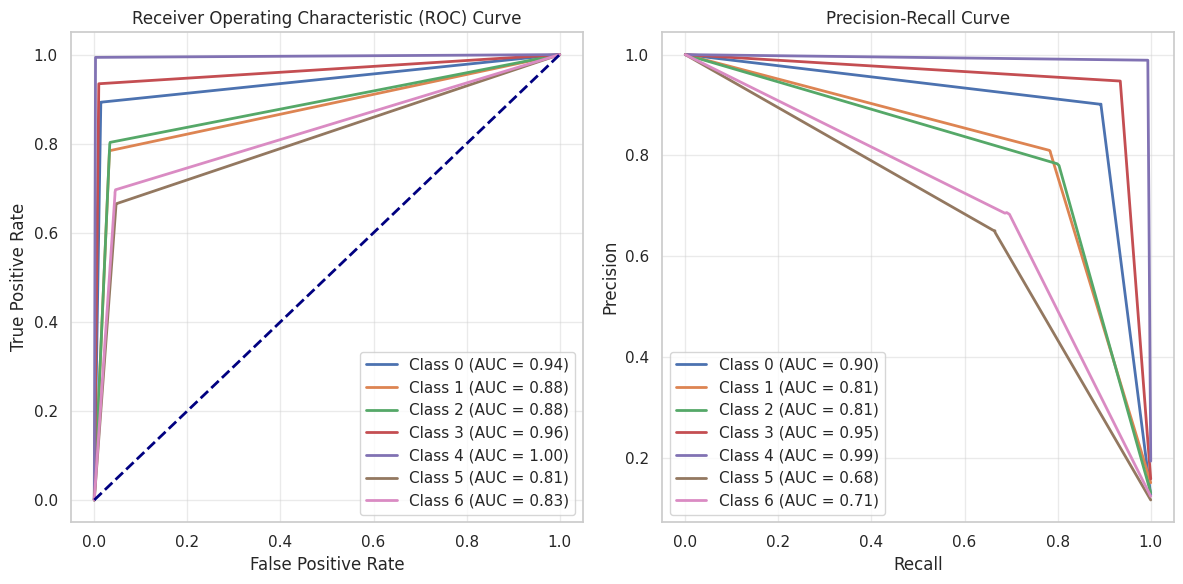

In [132]:
train_and_evaluate_model(pipeline_tree,x_train_scaled,y_train,x_val_scaled,y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 24
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
Accuracy: 89.644
Confusion Matrix:
[[483  38   0   0   0   2   1]
 [ 28 549   1   0   0  45   3]
 [  2   1 469  11   1  17  42]
 [  0   0  15 637   3   0   2]
 [  0   0   0   1 802   1   0]
 [  1  41  10   0   0 380  52]
 [  0  11  40   6   0  55 402]]
Classification R

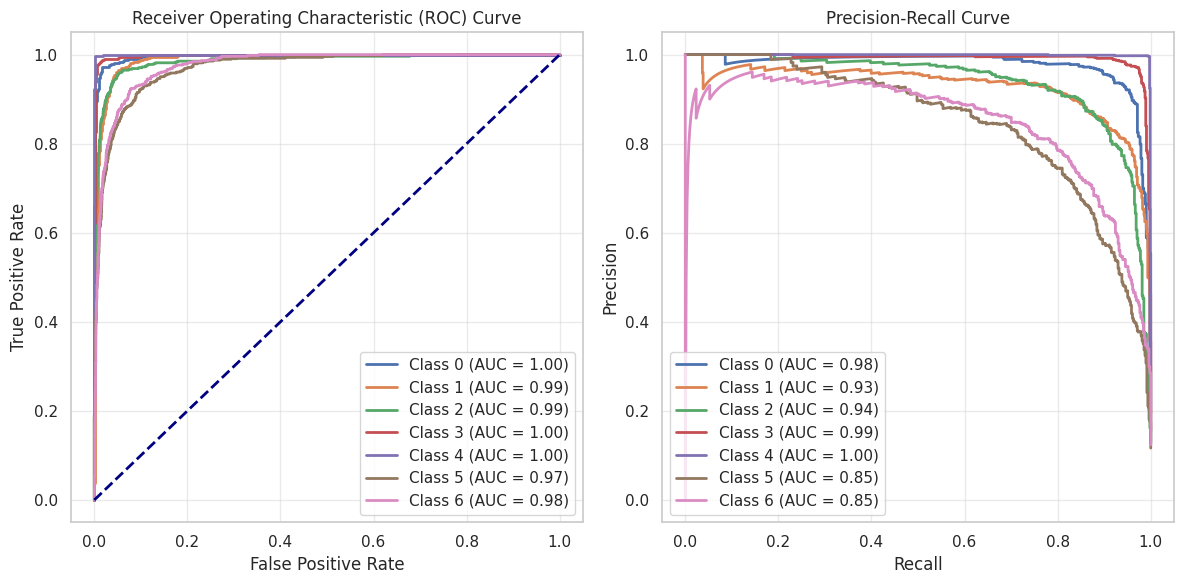

In [133]:
train_and_evaluate_model(pipeline_lgbm, x_train_scaled, y_train, x_val_scaled, y_val)

In [134]:
"""def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 5, 355),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS'])
    }
    
    # Define class weights based on your dataset
    class_weights = [1.0] * 7  # Initialize with equal weights
    # Update class weights based on your dataset distribution
    class_weights[0] = 2790 / len(final_train)
    class_weights[1] = 3364 / len(final_train)
    class_weights[2] = 3261 / len(final_train)
    class_weights[3] = 3545 / len(final_train)
    class_weights[4] = 4370 / len(final_train)
    class_weights[5] = 2703 / len(final_train)
    class_weights[6] = 2812 / len(final_train)

    catboost_model = CatBoostClassifier(**params, class_weights=class_weights, random_state=42)

    # Define the preprocessing pipeline
    preprocessor = Pipeline([
        # Include your encoder here
        # ('creator', creator),
        ("encoder", encoder)
    ])

    # Perform stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    accuracy_scores = []
    for train_index, val_index in skf.split(final_train, y_another):
        try:
            x_train_fold, x_val_fold = final_train.iloc[train_index], final_train.iloc[val_index]
            y_train_fold, y_val_fold = y_another.iloc[train_index], y_another.iloc[val_index]
            
            # Preprocess the data
            x_train_fold_processed = preprocessor.fit_transform(x_train_fold)
            x_val_fold_processed = preprocessor.transform(x_val_fold)
            
            catboost_model.fit(x_train_fold_processed, y_train_fold, eval_set=(x_val_fold_processed, y_val_fold))
            y_pred_fold = catboost_model.predict(x_val_fold_processed)
            accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
        except KeyError:
            # Skip this trial if KeyError occurs (invalid index)
            return None
    
    # Calculate the mean accuracy over all folds
    accuracy = sum(accuracy_scores) / len(accuracy_scores)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params_catboost = study.best_params
print("Best Parameters for CatBoost:")
print(best_params_catboost)
"""

'def objective(trial):\n    params = {\n        \'iterations\': trial.suggest_int(\'iterations\', 100, 1000),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 0.3),\n        \'depth\': trial.suggest_int(\'depth\', 4, 10),\n        \'l2_leaf_reg\': trial.suggest_float(\'l2_leaf_reg\', 1, 10),\n        \'border_count\': trial.suggest_int(\'border_count\', 5, 355),\n        \'subsample\': trial.suggest_float(\'subsample\', 0.5, 1.0),\n        \'colsample_bylevel\': trial.suggest_float(\'colsample_bylevel\', 0.5, 1.0),\n        \'bootstrap_type\': trial.suggest_categorical(\'bootstrap_type\', [\'Bernoulli\', \'MVS\'])\n    }\n    \n    # Define class weights based on your dataset\n    class_weights = [1.0] * 7  # Initialize with equal weights\n    # Update class weights based on your dataset distribution\n    class_weights[0] = 2790 / len(final_train)\n    class_weights[1] = 3364 / len(final_train)\n    class_weights[2] = 3261 / len(final_train)\n    class_weights[3

In [135]:
catboost_param = {
    'iterations': 974,
    'learning_rate': 0.19688704586900493,
    'depth': 4,
    'l2_leaf_reg': 8.798836088455536,
    'border_count': 274
}


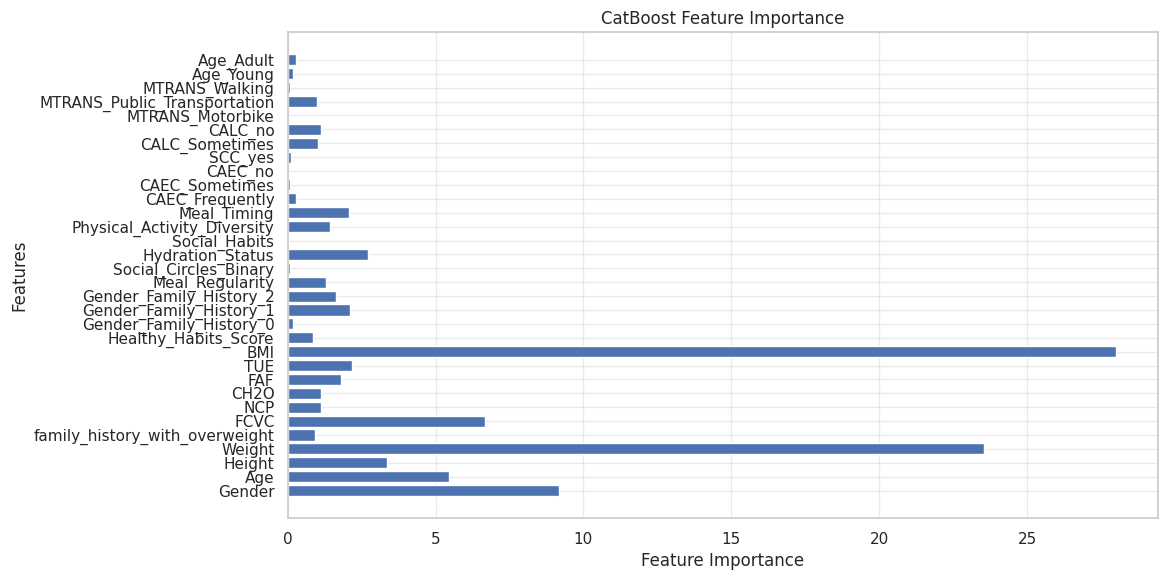

Accuracy: 90.727
Confusion Matrix:
[[492  29   0   0   0   1   2]
 [ 27 559   1   0   0  32   7]
 [  2   1 479  10   1  14  36]
 [  0   0  12 641   1   0   3]
 [  0   0   0   1 802   1   0]
 [  1  37   9   0   0 374  63]
 [  0   8  31   3   0  52 420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.88      0.89      0.89       626
           2       0.90      0.88      0.89       543
           3       0.98      0.98      0.98       657
           4       1.00      1.00      1.00       804
           5       0.79      0.77      0.78       484
           6       0.79      0.82      0.80       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

0:	learn: 1.3778425	total: 14.8ms	remaining: 14.4s
1:	learn: 1.1311818	total: 27.2ms	remaining: 13.2s
2:	learn: 0.9759341	total

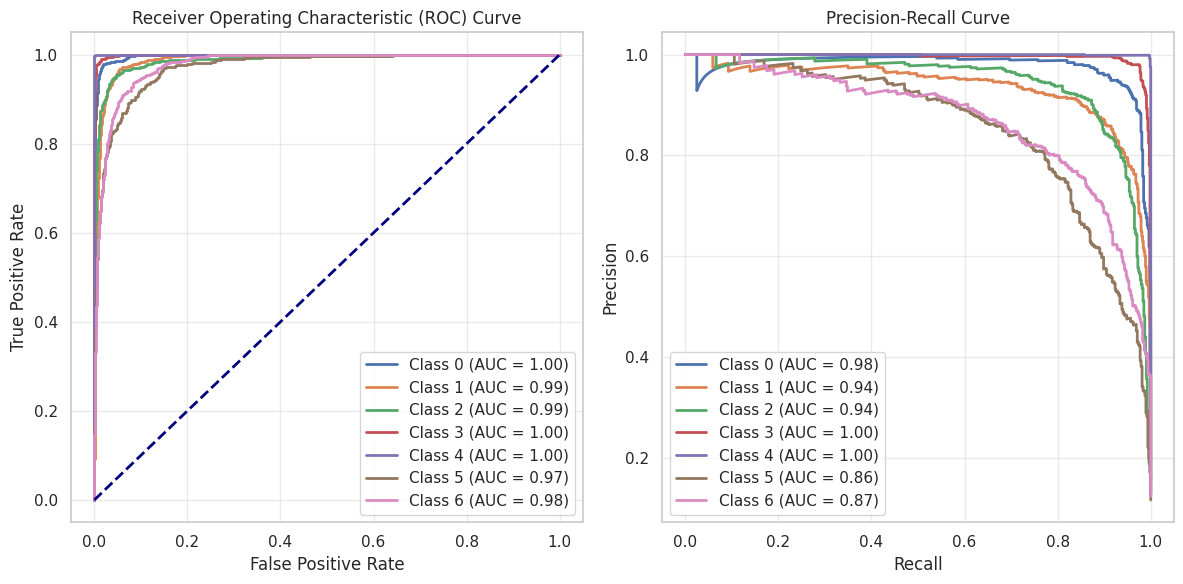

In [136]:
best_model_catboost = CatBoostClassifier(**catboost_param,random_state=42)
train_and_evaluate_model(best_model_catboost, x_train_scaled, y_train, x_val_scaled, y_val)

In [137]:
"""xgb_model = best_model_xg
catboost_model = best_model_catboost
lgbm_model = pipeline_lgbm

voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('catboost', catboost_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

voting_model.fit(x_train_scaled,y_train)"""

"xgb_model = best_model_xg\ncatboost_model = best_model_catboost\nlgbm_model = pipeline_lgbm\n\nvoting_model = VotingClassifier(\n    estimators=[\n        ('xgb', xgb_model),\n        ('catboost', catboost_model),\n        ('lgbm', lgbm_model)\n    ],\n    voting='soft'\n)\n\nvoting_model.fit(x_train_scaled,y_train)"

In [138]:
xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier()
lgbm_model = LGBMClassifier()

In [139]:
#xgb_model.fit(np.array(x_train_scaled),y_train)

In [140]:
#catboost_model.fit(np.array(x_train_scaled),y_train)

In [141]:
#lgbm_model.fit(np.array(x_train_scaled),y_train)

In [142]:
voting_model = VotingClassifier(
    estimators=[
        ('catboost', best_model_catboost),
        ('hist', best_model_histboost)
    ],
    voting='hard'  
)
voting_model.fit(np.array(x_train_scaled),y_train)


0:	learn: 1.3769776	total: 19.1ms	remaining: 18.6s
1:	learn: 1.1358354	total: 33ms	remaining: 16s
2:	learn: 0.9802040	total: 48.4ms	remaining: 15.7s
3:	learn: 0.8619005	total: 63.4ms	remaining: 15.4s
4:	learn: 0.7728212	total: 78.9ms	remaining: 15.3s
5:	learn: 0.7059462	total: 92.9ms	remaining: 15s
6:	learn: 0.6541916	total: 108ms	remaining: 14.9s
7:	learn: 0.6102259	total: 122ms	remaining: 14.7s
8:	learn: 0.5795215	total: 135ms	remaining: 14.5s
9:	learn: 0.5516122	total: 150ms	remaining: 14.5s
10:	learn: 0.5303043	total: 167ms	remaining: 14.6s
11:	learn: 0.5114157	total: 179ms	remaining: 14.3s
12:	learn: 0.4955023	total: 193ms	remaining: 14.2s
13:	learn: 0.4835773	total: 206ms	remaining: 14.1s
14:	learn: 0.4721329	total: 220ms	remaining: 14s
15:	learn: 0.4588475	total: 232ms	remaining: 13.9s
16:	learn: 0.4477421	total: 245ms	remaining: 13.8s
17:	learn: 0.4391576	total: 257ms	remaining: 13.6s
18:	learn: 0.4297734	total: 268ms	remaining: 13.5s
19:	learn: 0.4225518	total: 279ms	remaining

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7ac3abe36740>),
                             ('hist',
                              HistGradientBoostingClassifier(l2_regularization=0.08958656702493381,
                                                             learning_rate=0.11435825707668429,
                                                             max_bins=204,
                                                             max_depth=4,
                                                             max_iter=737,
                                                             min_samples_leaf=6,
                                                             random_state=42))])

In [143]:
lgbm_params_for_xg = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.026288471489806956,
    'n_estimators': 476,
    'lambda_l1': 0.06453656361518342,
    'lambda_l2': 0.3055301874218116,
    'max_depth': 9,
    'colsample_bytree': 0.4204715418169824,
    'subsample': 0.8720200608473527,
    'min_child_samples': 15}

In [144]:
%%time

lgbm_tunned = LGBMClassifier(**lgbm_params_for_xg)

# Cross-validation scores
cv = StratifiedKFold(n_splits=5)
pipe_lgbm = Pipeline([
    
    ('preprocessor', preprocessor),
    ("lgbm_tunned", lgbm_tunned)
])
cv_scores = cross_val_score(pipe_lgbm, Xg_train, yg_train, cv=cv, scoring='accuracy')  # 5-fold cross-validation
print("Mean CV Score:", np.mean(cv_scores))

#Test score
pipe_lgbm = pipe_lgbm.fit(Xg_train, yg_train)
preds_test = pipe_lgbm.predict(Xg_test)
print("Test Score:", accuracy_score(yg_test, preds_test))


Mean CV Score: 0.9128912613338043
Test Score: 0.9172685489166119
CPU times: user 56.8 s, sys: 0 ns, total: 56.8 s
Wall time: 56.8 s


In [145]:
pipe_lgbm_xg = pipe_lgbm.fit(final_train, y_another)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       PREDICTION BY ALL PIPELINE
</div>


In [146]:
#Xgboost_pred = best_model_xg.predict(test)
#Xgboost_pred = label_encoder.inverse_transform(Xgboost_pred)
#print(Xgboost_pred)


In [147]:
Catboost_pred = best_model_catboost.predict(test)
Catboost_pred2 = label_encoder.inverse_transform(Catboost_pred)
print(Catboost_pred2)


['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [148]:
Histboost_pred = best_model_histboost.predict(test)
Histboost_pred2 = label_encoder.inverse_transform(Histboost_pred)
print(Histboost_pred2)


['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [149]:
lgbm_pred = pipeline_lgbm.predict(test)
lgbm_pred2 = label_encoder.inverse_transform(lgbm_pred)
print(lgbm_pred2)


['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [150]:
lgbm_pred3 = pd.read_csv("/kaggle/input/lgbm-submission/submission.csv")
lgbm_pred3.head(5)

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [151]:
#adaboost_pred = best_model_adaboost.predict(test)
#adaboost_pred = label_encoder.inverse_transform(adaboost_pred)
#print(adaboost_pred)


In [152]:
for est in voting_model.estimators_:
    predictions = est.predict(test)
    print(predictions.shape)


(13840, 1)
(13840,)


In [153]:
voting_predictions = np.asarray([est.predict(test).flatten() for est in voting_model.estimators_]).T
voting_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=voting_predictions)

voting_pred2 = label_encoder.inverse_transform(voting_pred)
print(voting_pred2)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [154]:
#voting_pred =  voting_model.predict(Another_test)
#voting_pred = label_encoder.inverse_transform(voting_pred)
#print(voting_pred)

voting_pred3 = pd.read_csv('/kaggle/input/voting/voting_submission(1).csv')

In [155]:
preds_final = pipe_lgbm_xg.predict(Another_test)

In [156]:
output = pd.DataFrame({'id': Another_test['id'],
                       'NObeyesdad': preds_final})

output= output.replace({0: 'Insufficient_Weight',
                        1: 'Normal_Weight',
                        2: 'Obesity_Type_I',
                        3: 'Obesity_Type_II',
                        4: 'Obesity_Type_III',
                        5: 'Overweight_Level_I',
                        6: 'Overweight_Level_II'})


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
       SUBMISSION BY ALL PIPELINE
</div>


In [157]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [158]:
#sample_submission['NObeyesdad'] = Xgboost_pred
#sample_submission.head()

In [159]:
#sample_submission.to_csv("Xgboost_submission.csv", index=False)

In [160]:
sample_submission['NObeyesdad'] = Catboost_pred2
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [161]:
sample_submission.to_csv("Catboost_submission.csv", index=False)

In [162]:
sample_submission['NObeyesdad'] = Histboost_pred2
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [163]:
sample_submission.to_csv("Histboost_submission.csv", index=False)

In [164]:
sample_submission['NObeyesdad'] = lgbm_pred2
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [165]:
sample_submission.to_csv("lgbm_submission.csv", index=False)

In [166]:
sample_submission['NObeyesdad'] = lgbm_pred3['NObeyesdad']
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [167]:
sample_submission.to_csv("lgbm_submission_2.csv", index=False)

In [168]:
sample_submission['NObeyesdad'] = voting_pred2
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [169]:
sample_submission.to_csv("voting_submission.csv", index=False)

In [170]:
sample_submission = voting_pred3
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [171]:
sample_submission.to_csv("voting_submission2.csv", index=False)

In [172]:
#sample_submission['NObeyesdad'] = adaboost_pred
#sample_submission.head()

In [173]:
#sample_submission.to_csv("adaboost_submission.csv", index=False)

In [174]:
output.to_csv('submission.csv', index=False)

output.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [175]:
class_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6
}

voting_pred2_labels = np.array([class_mapping[class_name] for class_name in voting_pred3['NObeyesdad']])
voting_pred2_labels

array([3, 5, 4, ..., 0, 1, 3])

In [176]:
average_prediction = np.round((preds_final + voting_pred + voting_pred2_labels) / 3).astype(int)
average_prediction

array([3, 5, 4, ..., 0, 1, 3])

In [177]:
reverse_mapping = {v: k for k, v in class_mapping.items()}

voting_pred2_class_names = [reverse_mapping[label] for label in average_prediction]

voting_pred2_class_names = np.array(voting_pred2_class_names)

print(voting_pred2_class_names)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [178]:
sample_submission['NObeyesdad'] = voting_pred2_class_names
sample_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [179]:
sample_submission.to_csv("Average_submission.csv", index=False)